Setting up the environment

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download taejoongyoon/mitbit-arrhythmia-database

 96% 277M/288M [00:05<00:00, 69.7MB/s]
100% 288M/288M [00:05<00:00, 50.7MB/s]


In [ ]:
! unzip mitbit-arrhythmia-database

Archive:  mitbit-arrhythmia-database.zip
  inflating: mitbih_database/100.csv  
  inflating: mitbih_database/100annotations.txt  
  inflating: mitbih_database/101.csv  
  inflating: mitbih_database/101annotations.txt  
  inflating: mitbih_database/102.csv  
  inflating: mitbih_database/102annotations.txt  
  inflating: mitbih_database/103.csv  
  inflating: mitbih_database/103annotations.txt  
  inflating: mitbih_database/104.csv  
  inflating: mitbih_database/104annotations.txt  
  inflating: mitbih_database/105.csv  
  inflating: mitbih_database/105annotations.txt  
  inflating: mitbih_database/106.csv  
  inflating: mitbih_database/106annotations.txt  
  inflating: mitbih_database/107.csv  
  inflating: mitbih_database/107annotations.txt  
  inflating: mitbih_database/108.csv  
  inflating: mitbih_database/108annotations.txt  
  inflating: mitbih_database/109.csv  
  inflating: mitbih_database/109annotations.txt  
  inflating: mitbih_database/111.csv  
  inflating: mitbih_database/1

Loading...

In [ ]:
path = '/content/mitbih_database/'

In [ ]:
import os
filenames = next(os.walk(path))[2]

records = list()
annotations = list()
filenames.sort()
print(filenames)

['100.csv', '100annotations.txt', '101.csv', '101annotations.txt', '102.csv', '102annotations.txt', '103.csv', '103annotations.txt', '104.csv', '104annotations.txt', '105.csv', '105annotations.txt', '106.csv', '106annotations.txt', '107.csv', '107annotations.txt', '108.csv', '108annotations.txt', '109.csv', '109annotations.txt', '111.csv', '111annotations.txt', '112.csv', '112annotations.txt', '113.csv', '113annotations.txt', '114.csv', '114annotations.txt', '115.csv', '115annotations.txt', '116.csv', '116annotations.txt', '117.csv', '117annotations.txt', '118.csv', '118annotations.txt', '119.csv', '119annotations.txt', '121.csv', '121annotations.txt', '122.csv', '122annotations.txt', '123.csv', '123annotations.txt', '124.csv', '124annotations.txt', '200.csv', '200annotations.txt', '201.csv', '201annotations.txt', '202.csv', '202annotations.txt', '203.csv', '203annotations.txt', '205.csv', '205annotations.txt', '207.csv', '207annotations.txt', '208.csv', '208annotations.txt', '209.csv'

In [ ]:
for f in filenames:
  filename, file_extension = os.path.splitext(f)
  if(file_extension == '.csv'):
    records.append(path + filename + file_extension)
  else:
    annotations.append(path + filename + file_extension)

print(records)
print(annotations)


['/content/mitbih_database/100.csv', '/content/mitbih_database/101.csv', '/content/mitbih_database/102.csv', '/content/mitbih_database/103.csv', '/content/mitbih_database/104.csv', '/content/mitbih_database/105.csv', '/content/mitbih_database/106.csv', '/content/mitbih_database/107.csv', '/content/mitbih_database/108.csv', '/content/mitbih_database/109.csv', '/content/mitbih_database/111.csv', '/content/mitbih_database/112.csv', '/content/mitbih_database/113.csv', '/content/mitbih_database/114.csv', '/content/mitbih_database/115.csv', '/content/mitbih_database/116.csv', '/content/mitbih_database/117.csv', '/content/mitbih_database/118.csv', '/content/mitbih_database/119.csv', '/content/mitbih_database/121.csv', '/content/mitbih_database/122.csv', '/content/mitbih_database/123.csv', '/content/mitbih_database/124.csv', '/content/mitbih_database/200.csv', '/content/mitbih_database/201.csv', '/content/mitbih_database/202.csv', '/content/mitbih_database/203.csv', '/content/mitbih_database/2

Importing the libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import pywt
import csv
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax, Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import regularizers

%matplotlib inline

Matplotlib Settings

In [ ]:
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 

Denoising Function

In [ ]:
def denoise(data): 
    w = pywt.Wavelet('sym4')
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    threshold = 0.04 

    coeffs = pywt.wavedec(data, 'sym4', level=maxlev)
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
        
    datarec = pywt.waverec(coeffs, 'sym4')
    
    return datarec

Signal Extraction

/content/mitbih_database/100.csv


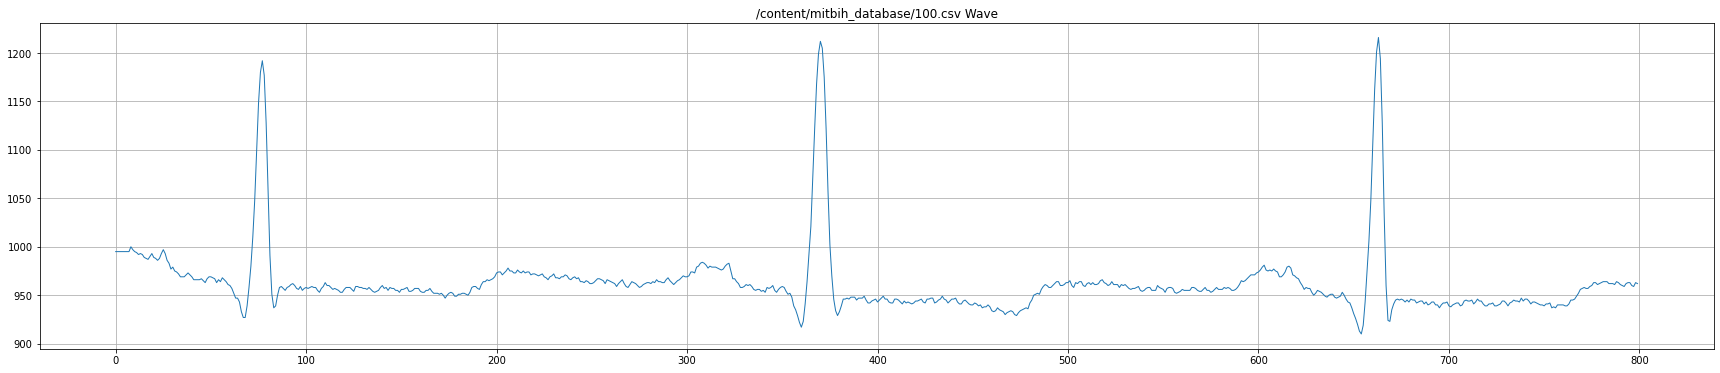

/content/mitbih_database/101.csv


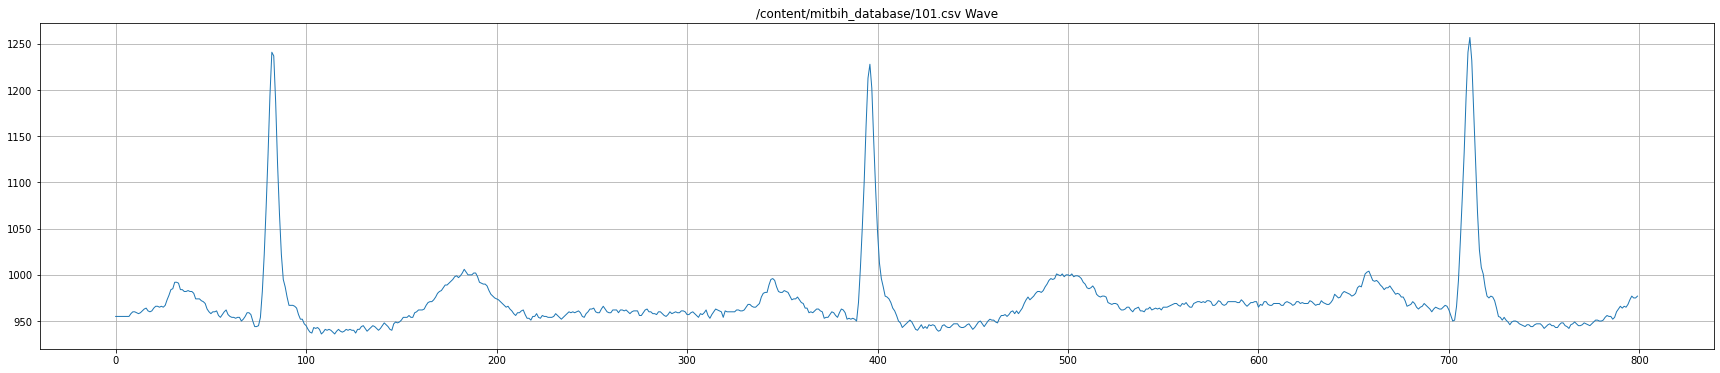

/content/mitbih_database/102.csv


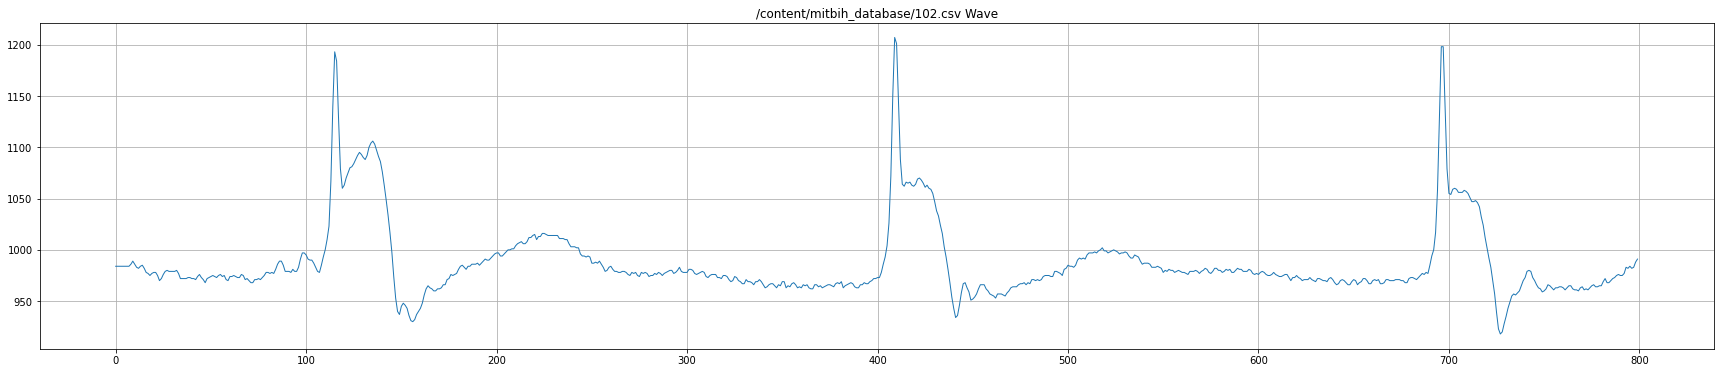

/content/mitbih_database/103.csv


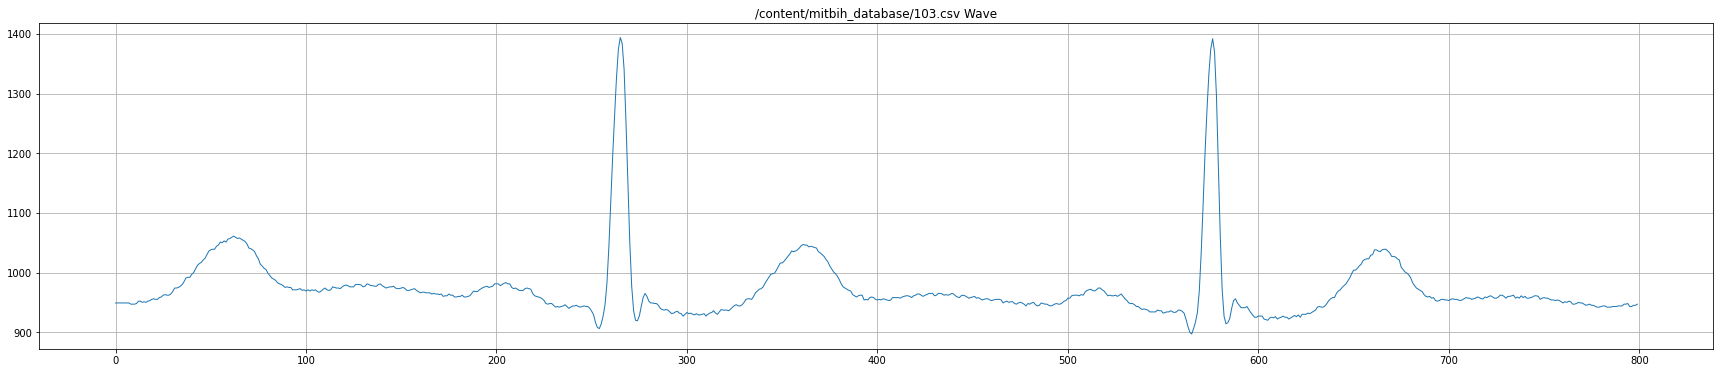

/content/mitbih_database/104.csv


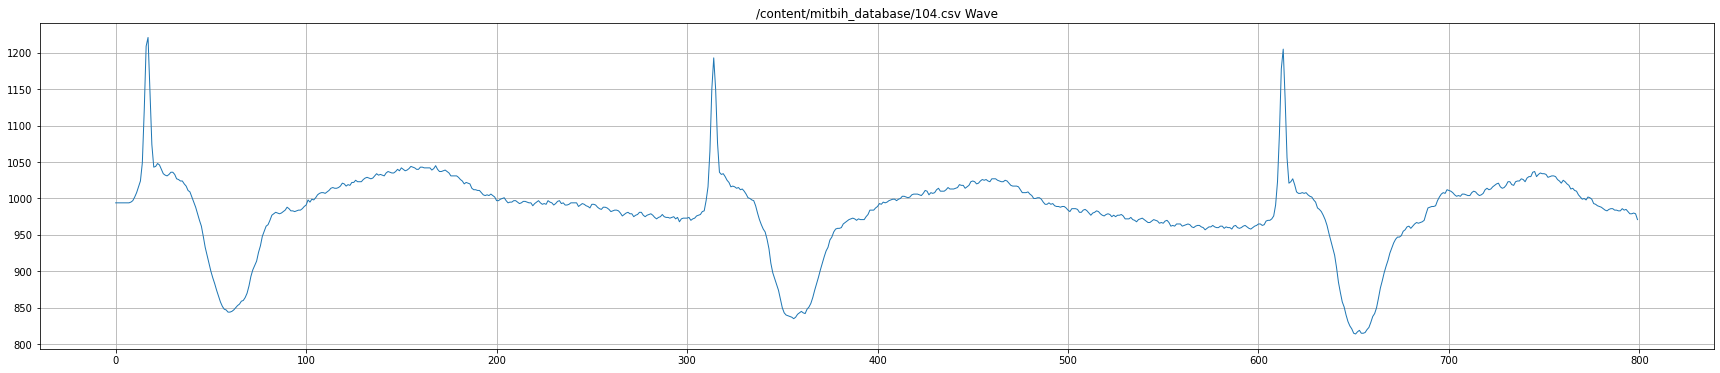

/content/mitbih_database/105.csv


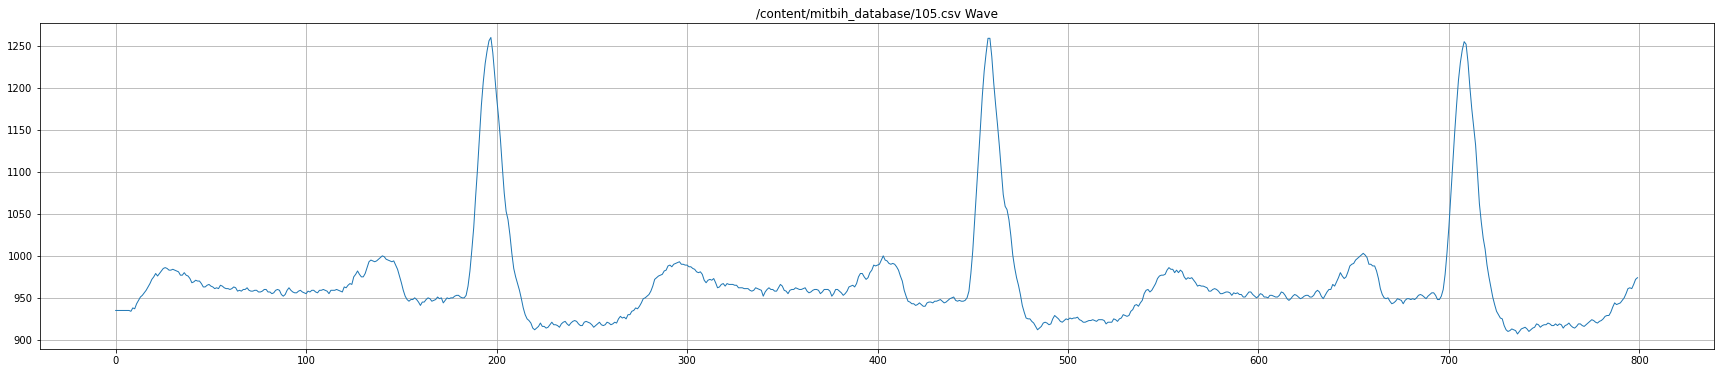

/content/mitbih_database/106.csv


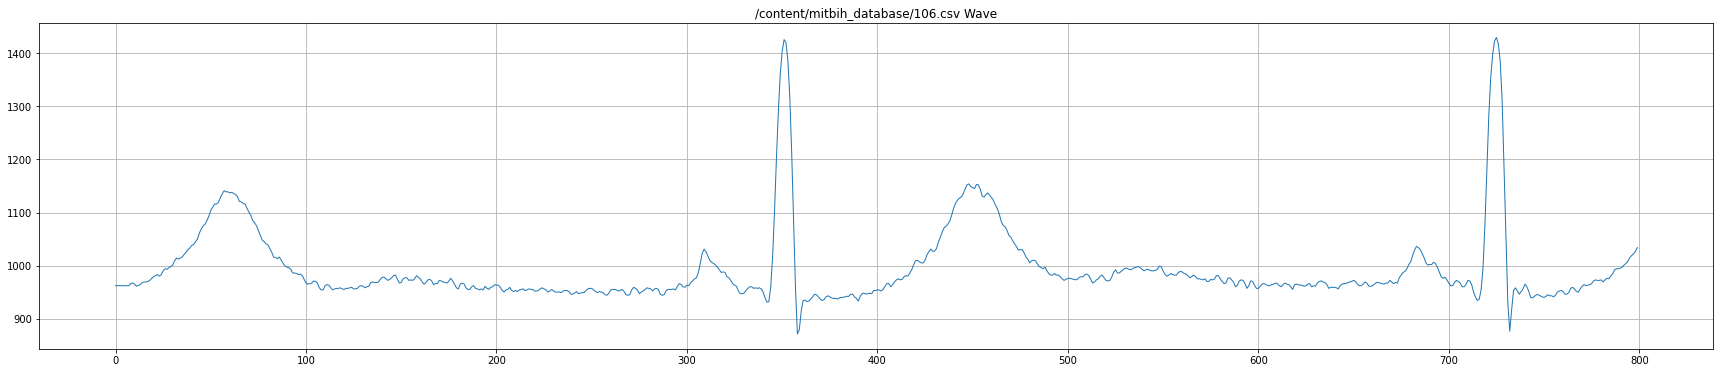

/content/mitbih_database/107.csv


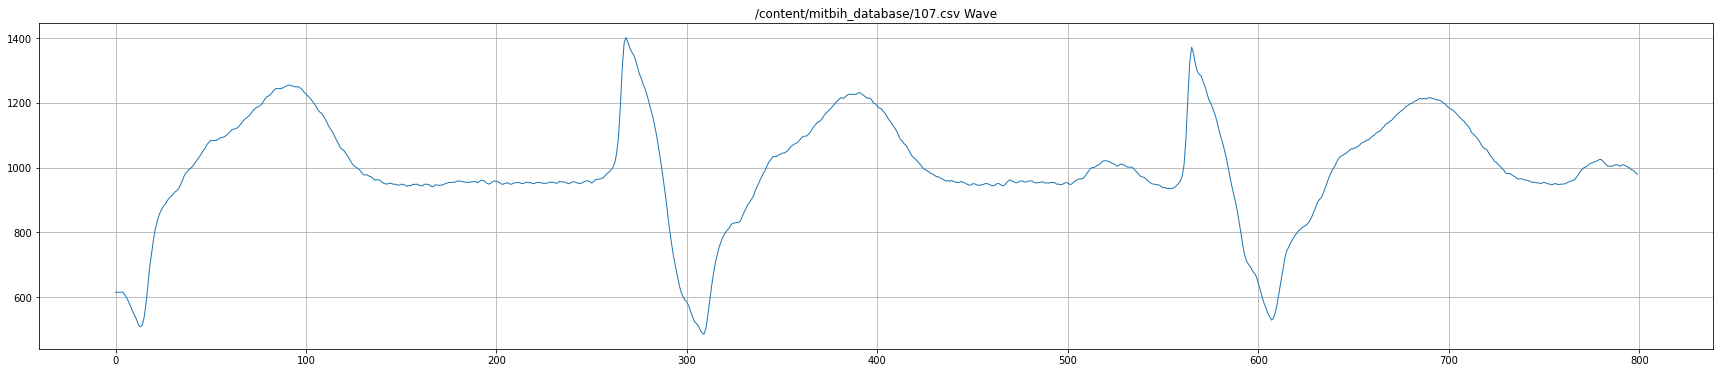

/content/mitbih_database/108.csv


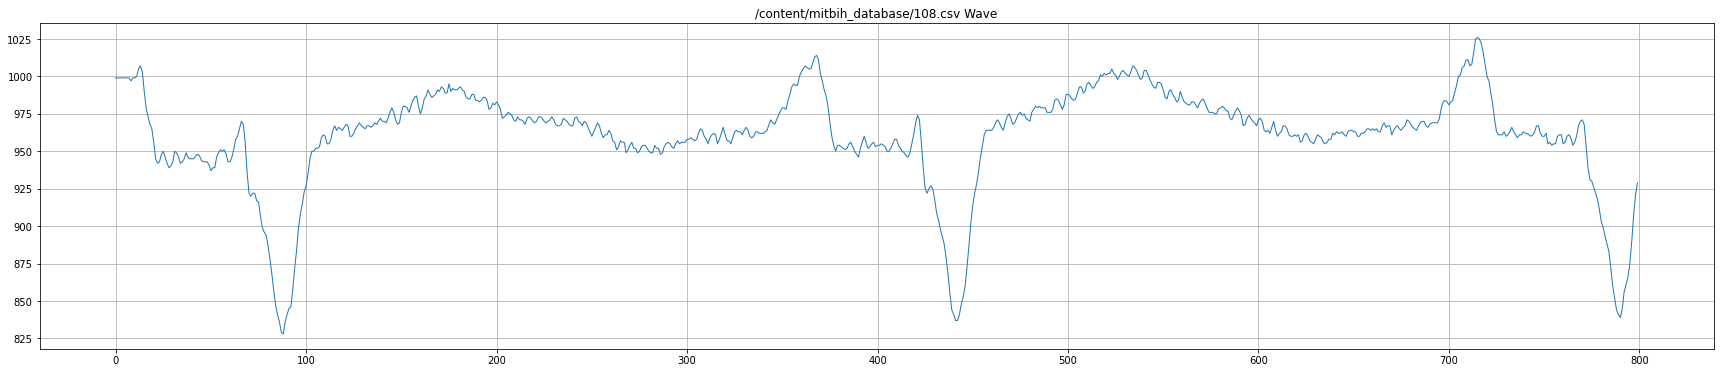

/content/mitbih_database/109.csv


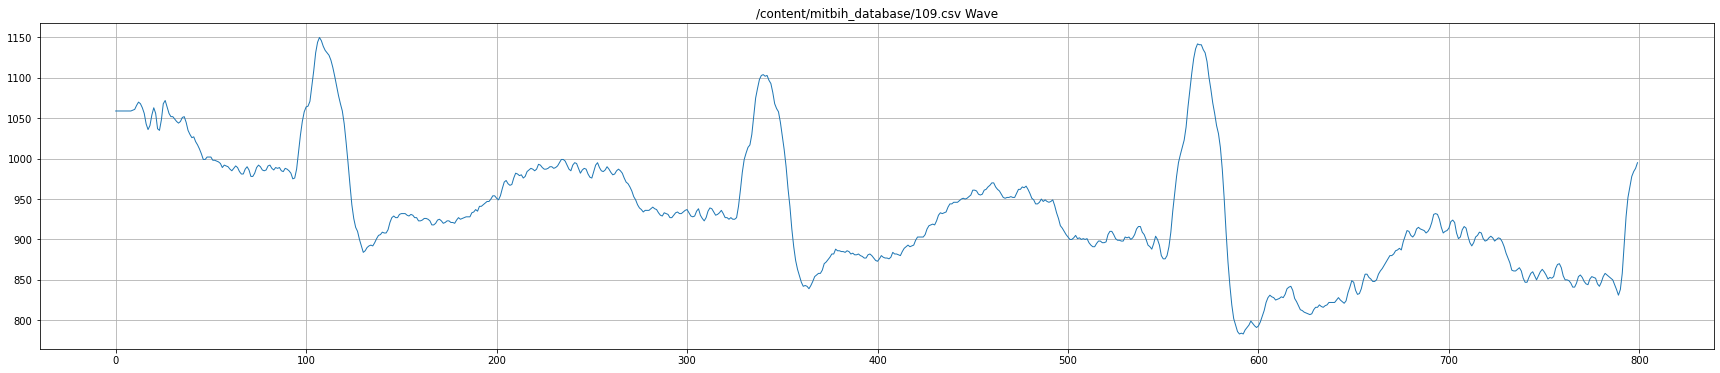

/content/mitbih_database/111.csv


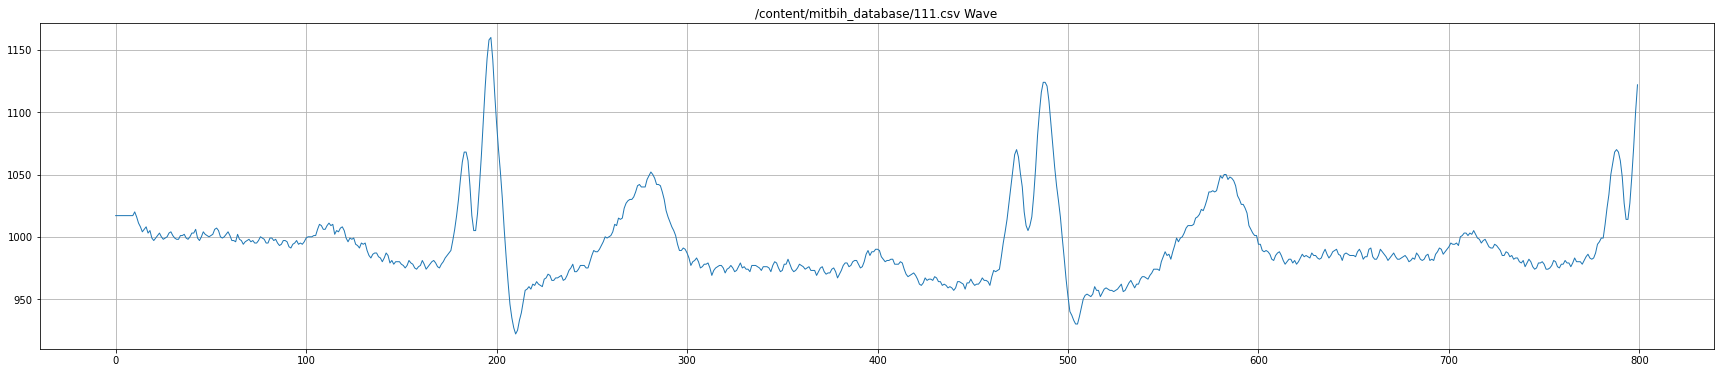

/content/mitbih_database/112.csv


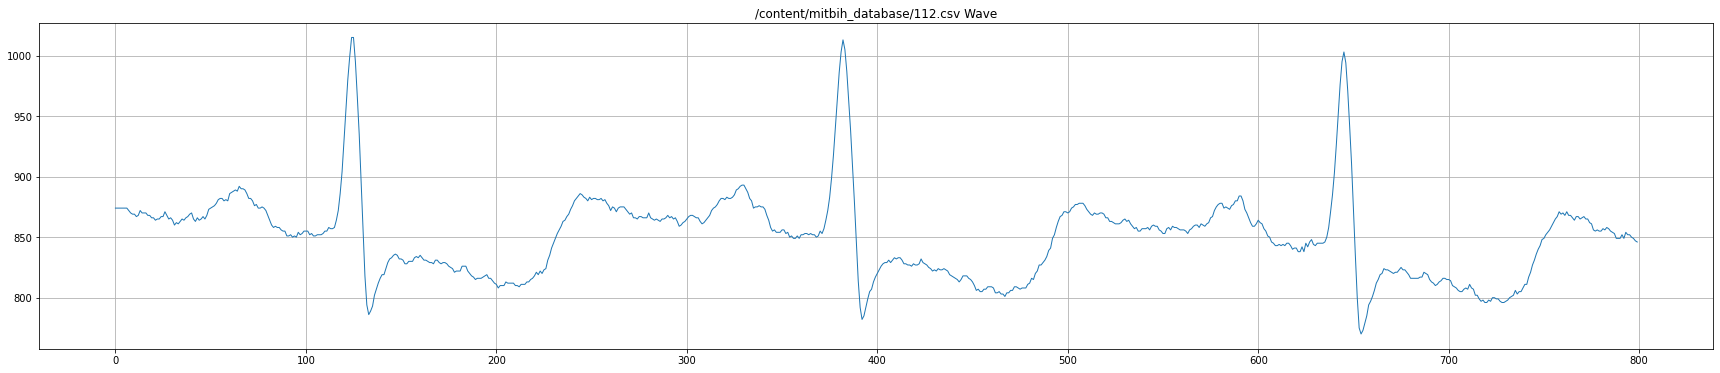

/content/mitbih_database/113.csv


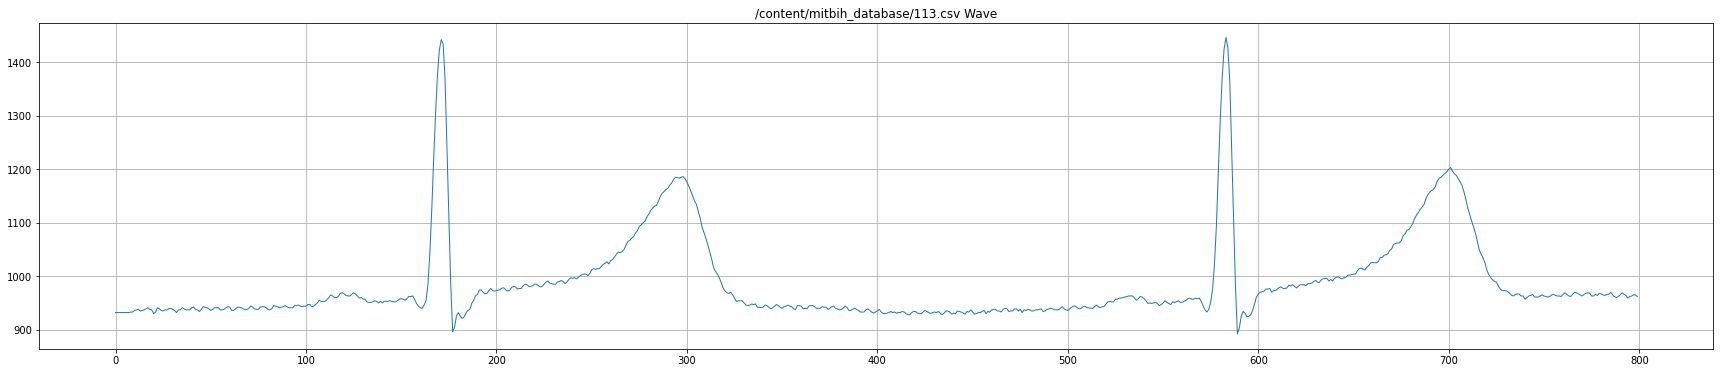

/content/mitbih_database/114.csv


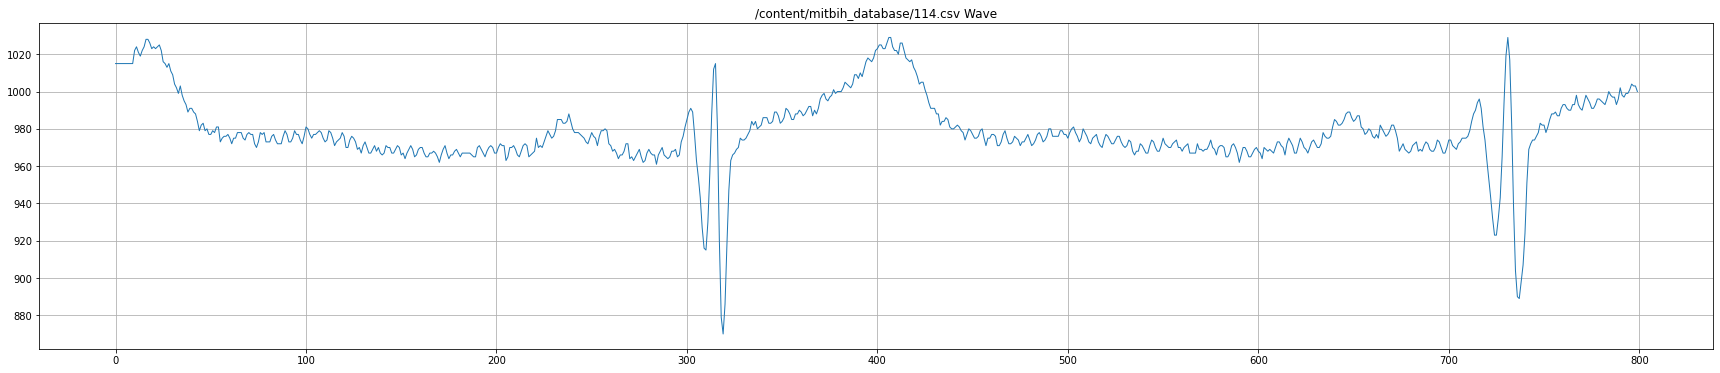

/content/mitbih_database/115.csv


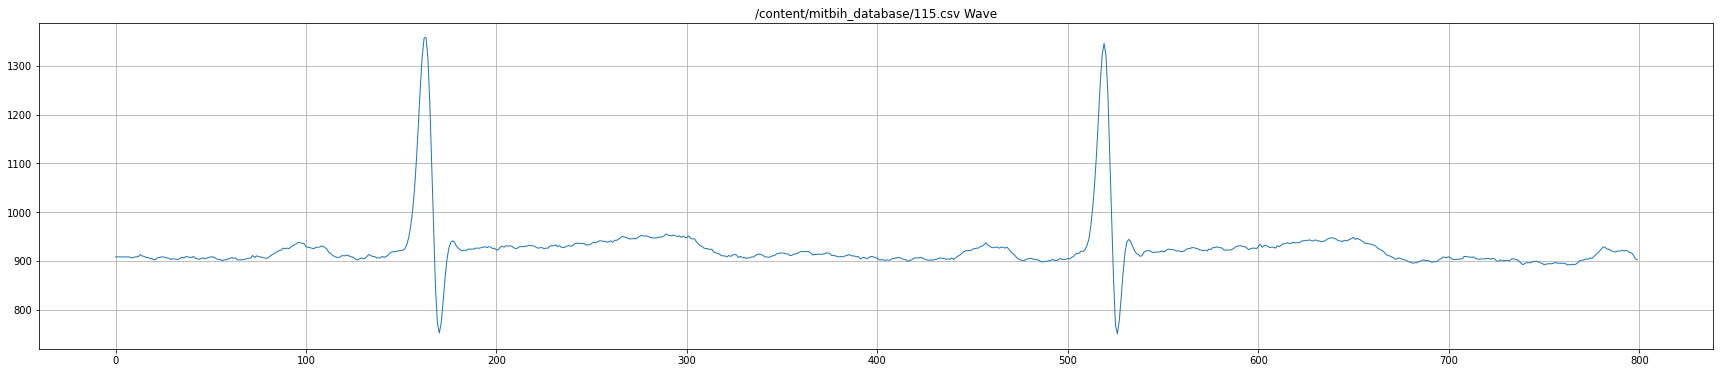

/content/mitbih_database/116.csv


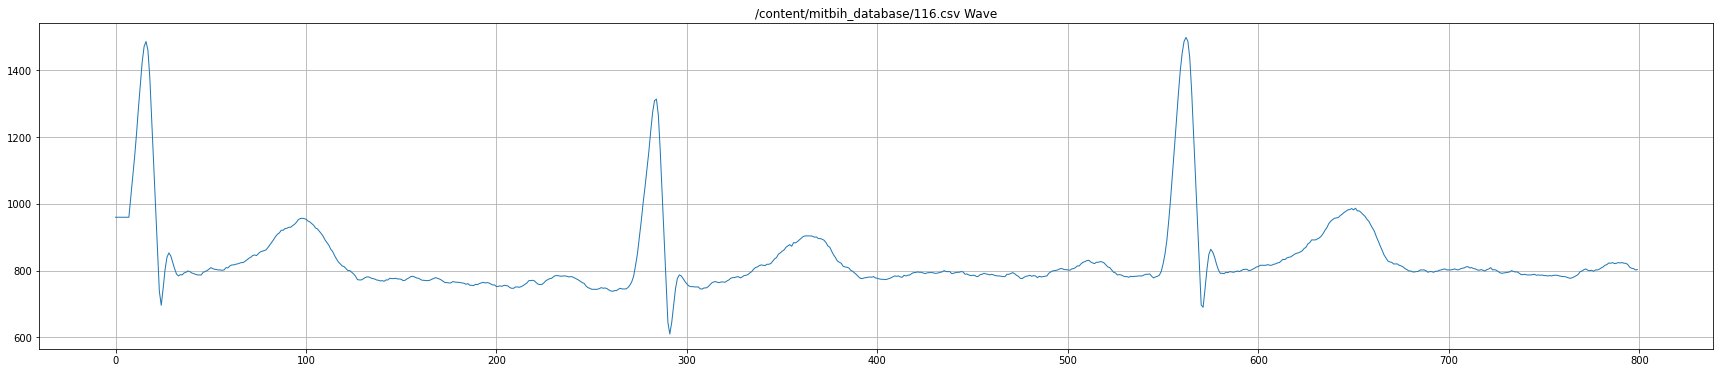

/content/mitbih_database/117.csv


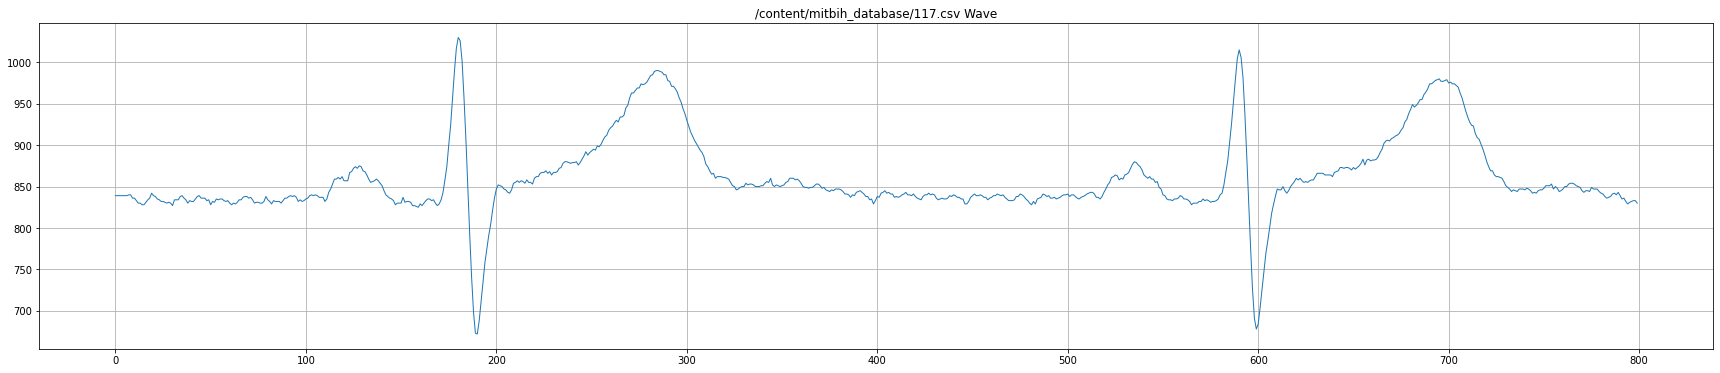

/content/mitbih_database/118.csv


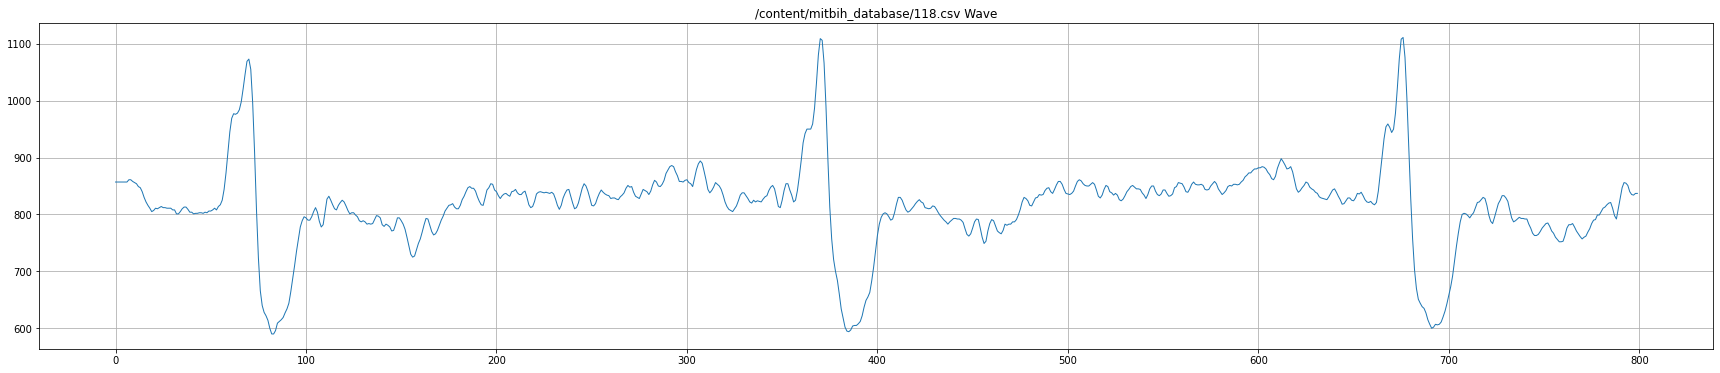

/content/mitbih_database/119.csv


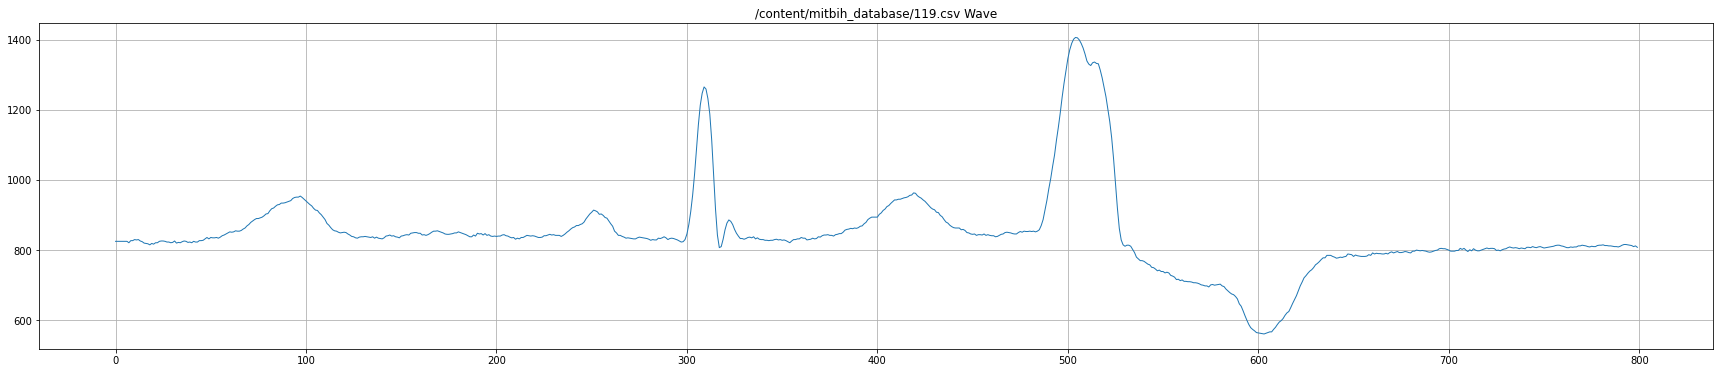

/content/mitbih_database/121.csv


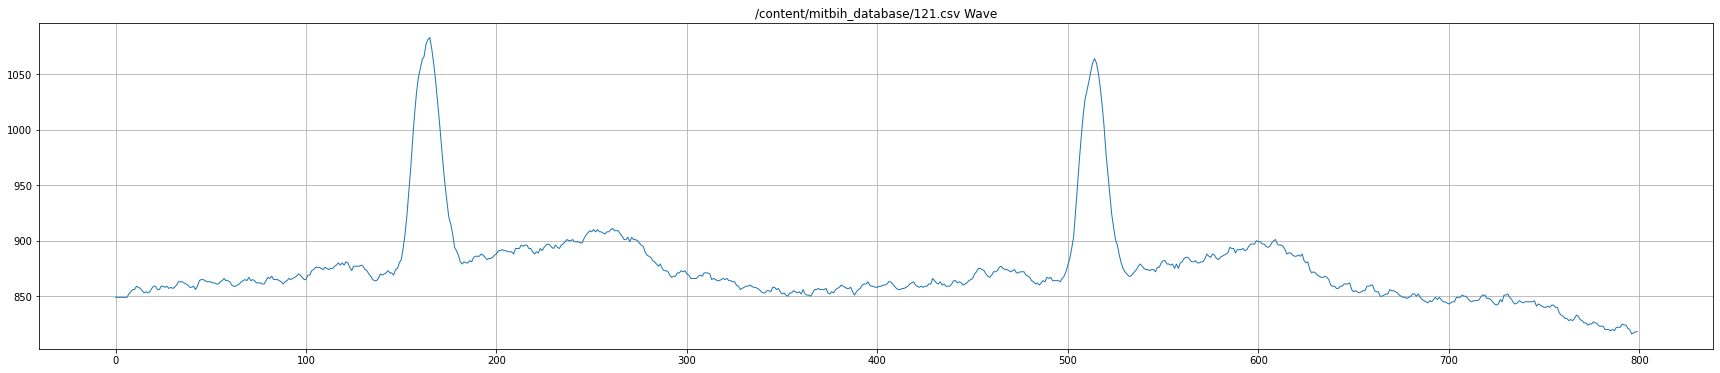

/content/mitbih_database/122.csv


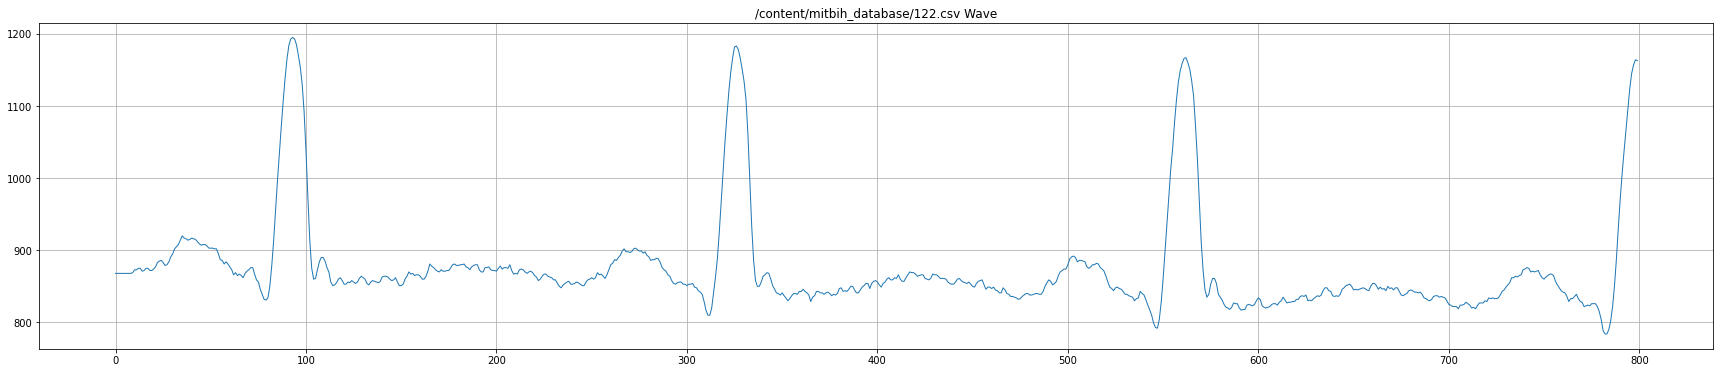

/content/mitbih_database/123.csv


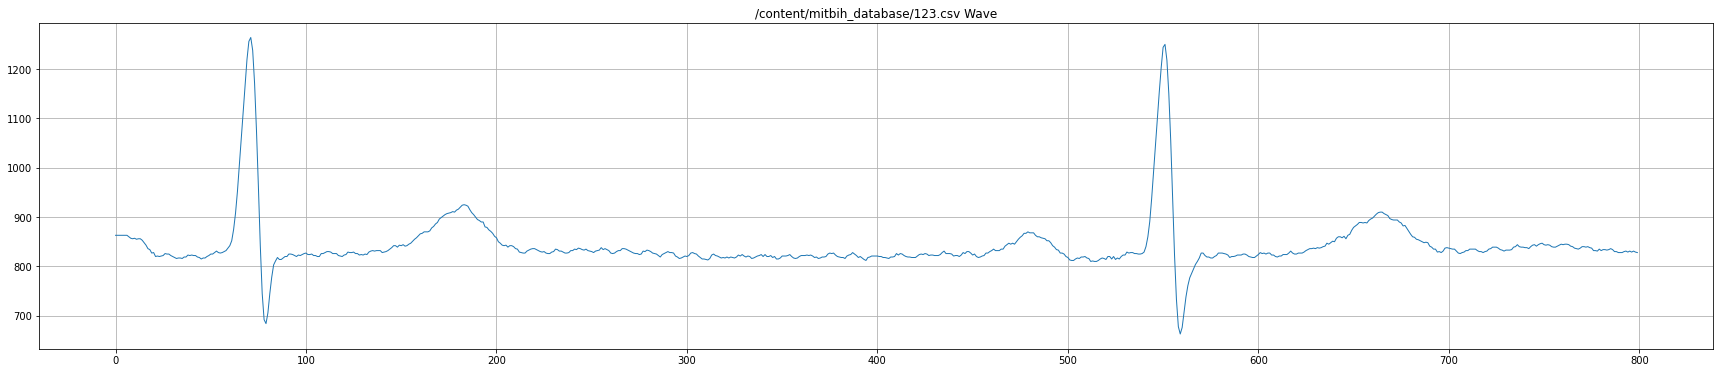

/content/mitbih_database/124.csv


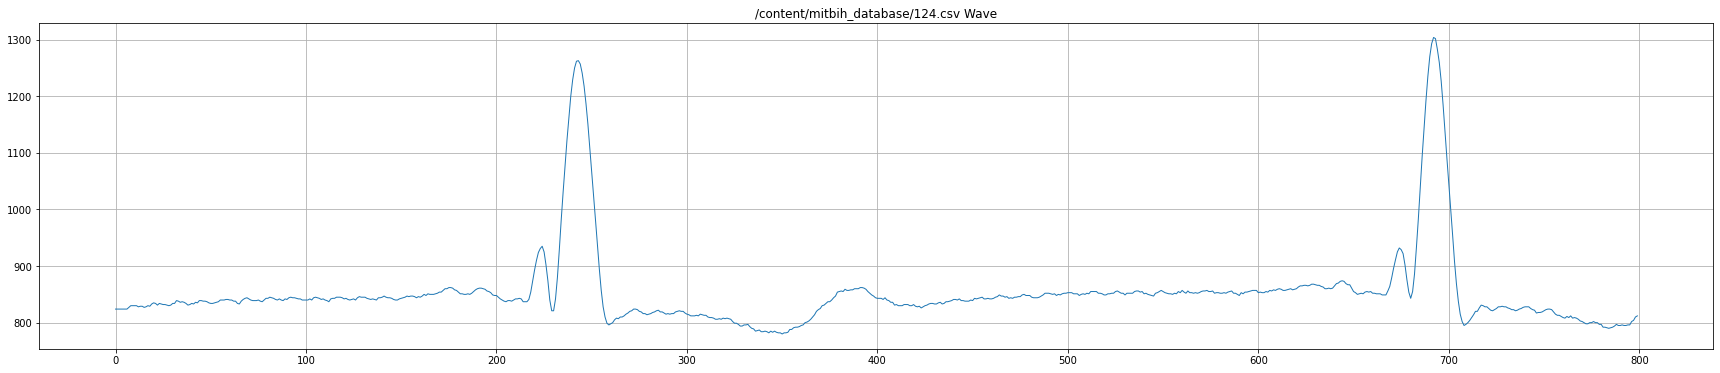

/content/mitbih_database/200.csv


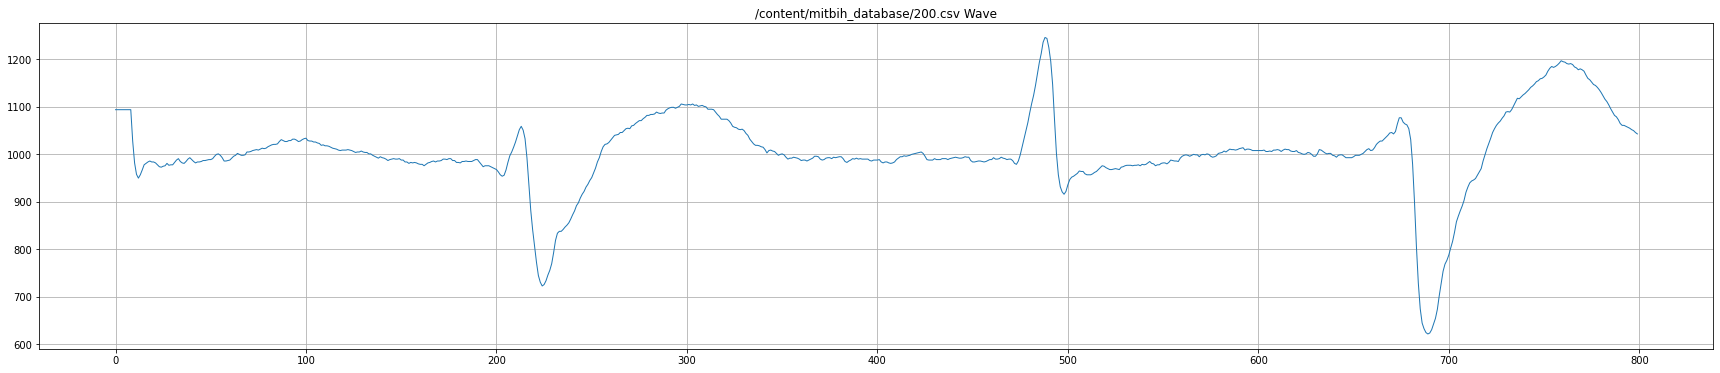

/content/mitbih_database/201.csv


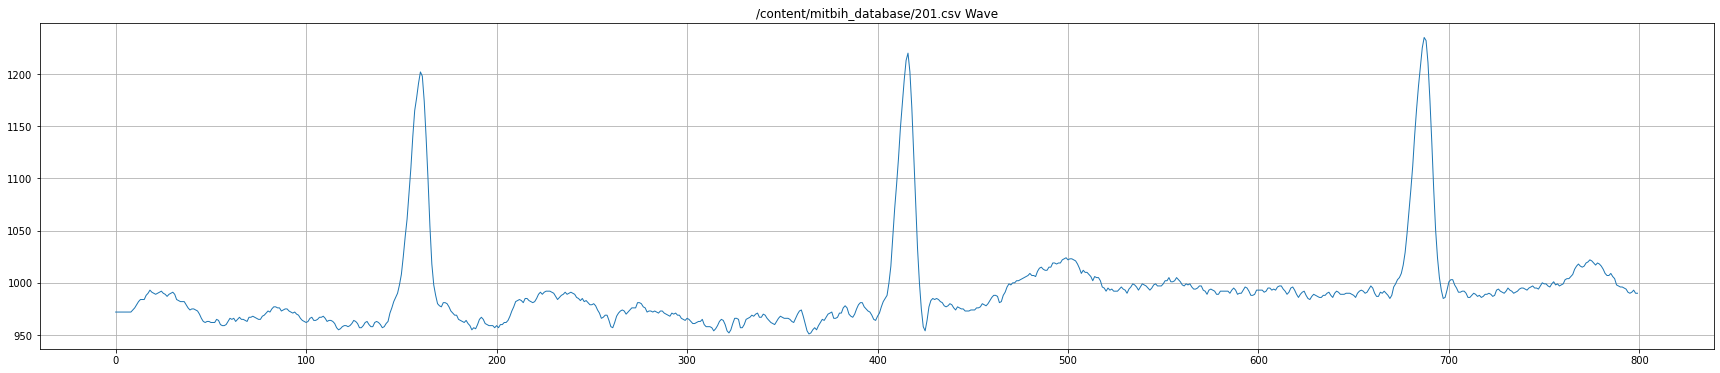

/content/mitbih_database/202.csv


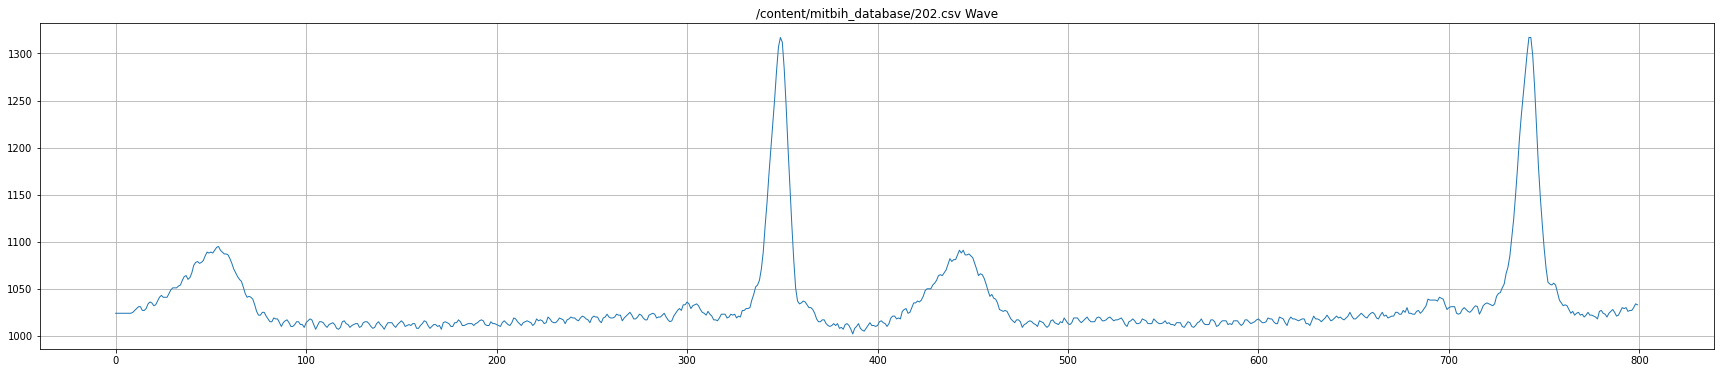

/content/mitbih_database/203.csv


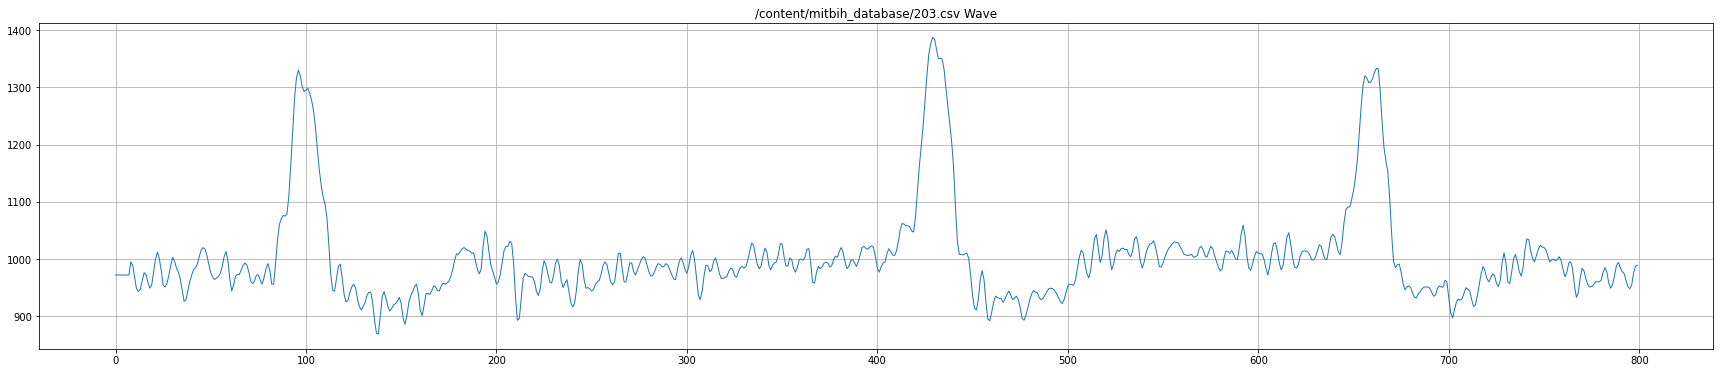

/content/mitbih_database/205.csv


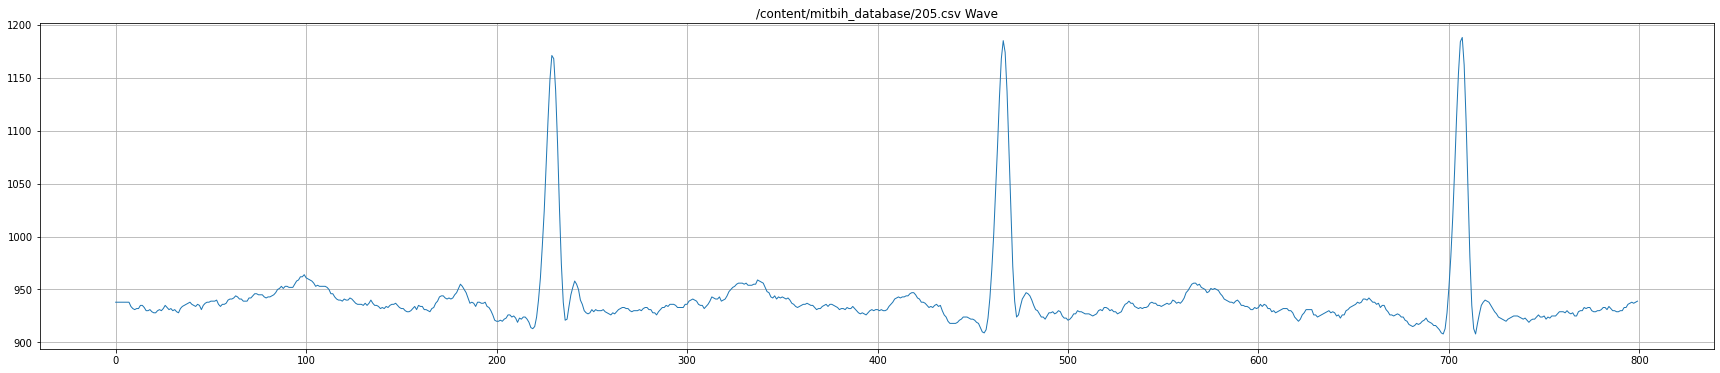

/content/mitbih_database/207.csv


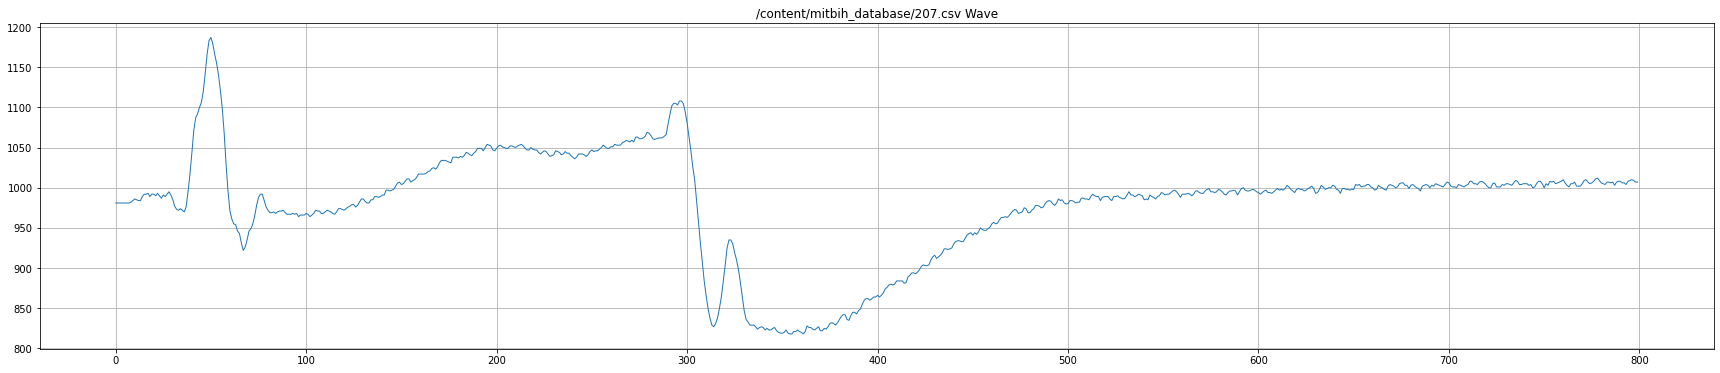

/content/mitbih_database/208.csv


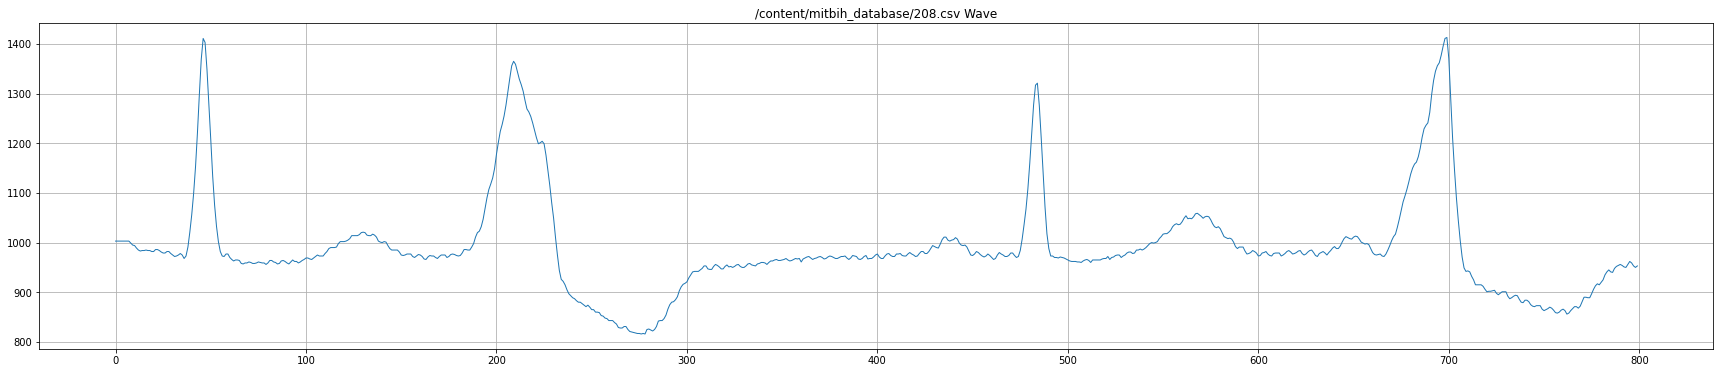

/content/mitbih_database/209.csv


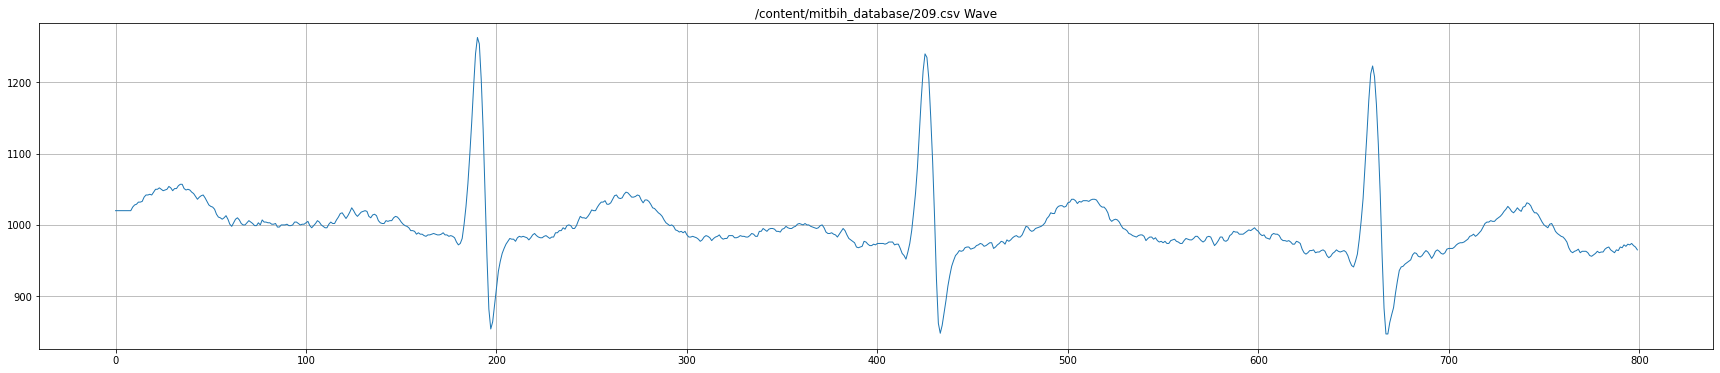

/content/mitbih_database/210.csv


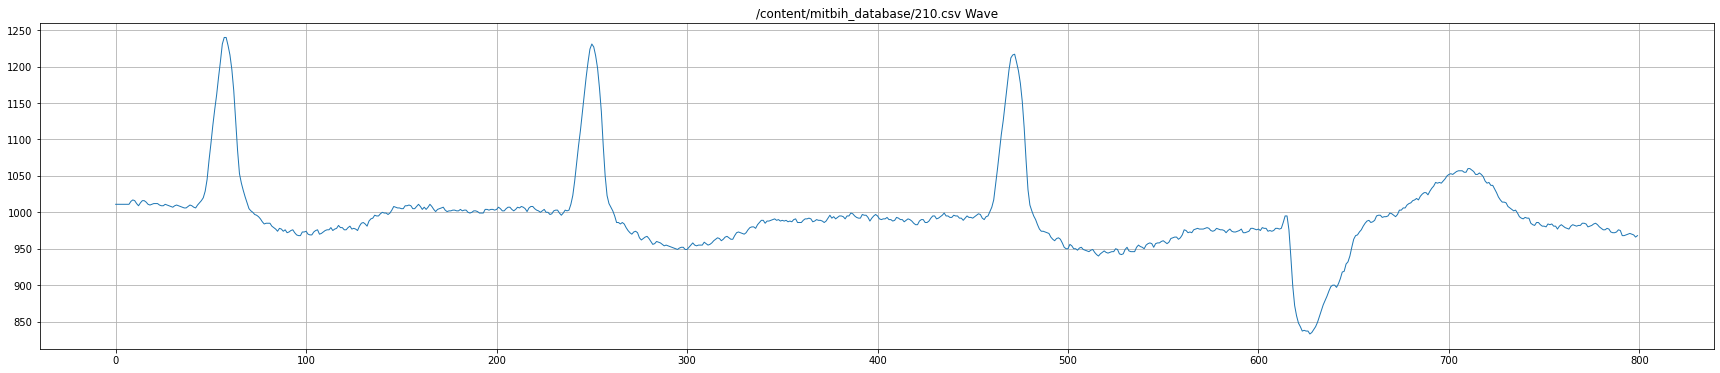

/content/mitbih_database/212.csv


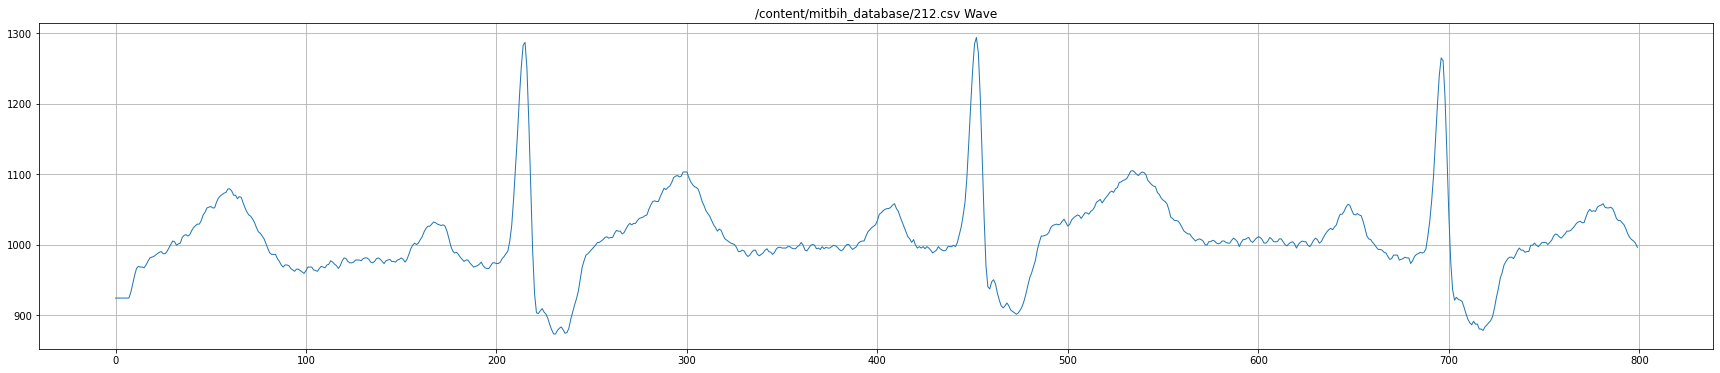

/content/mitbih_database/213.csv


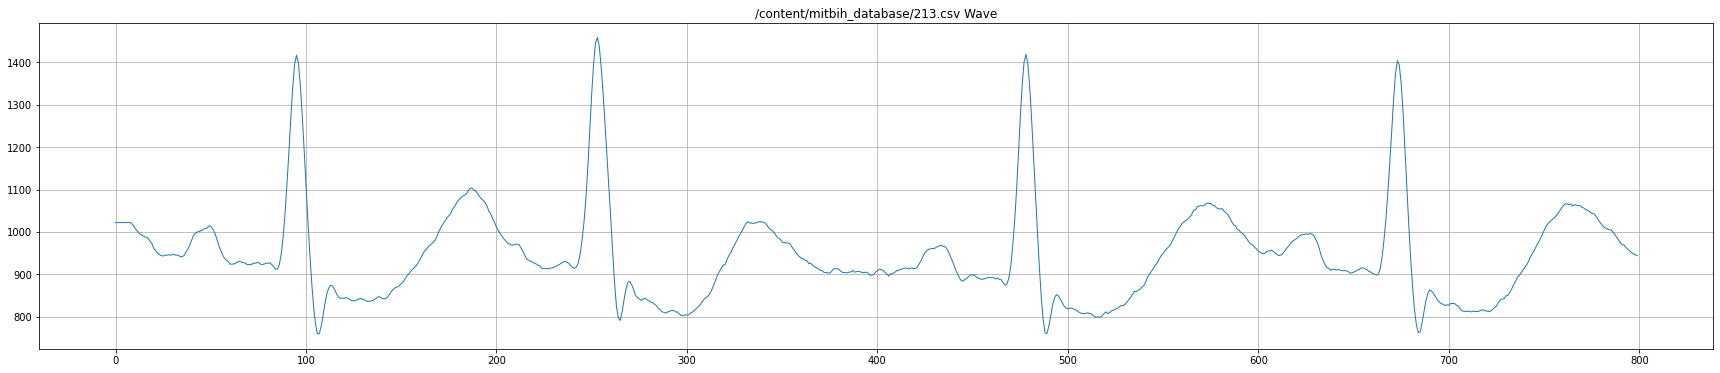

/content/mitbih_database/214.csv


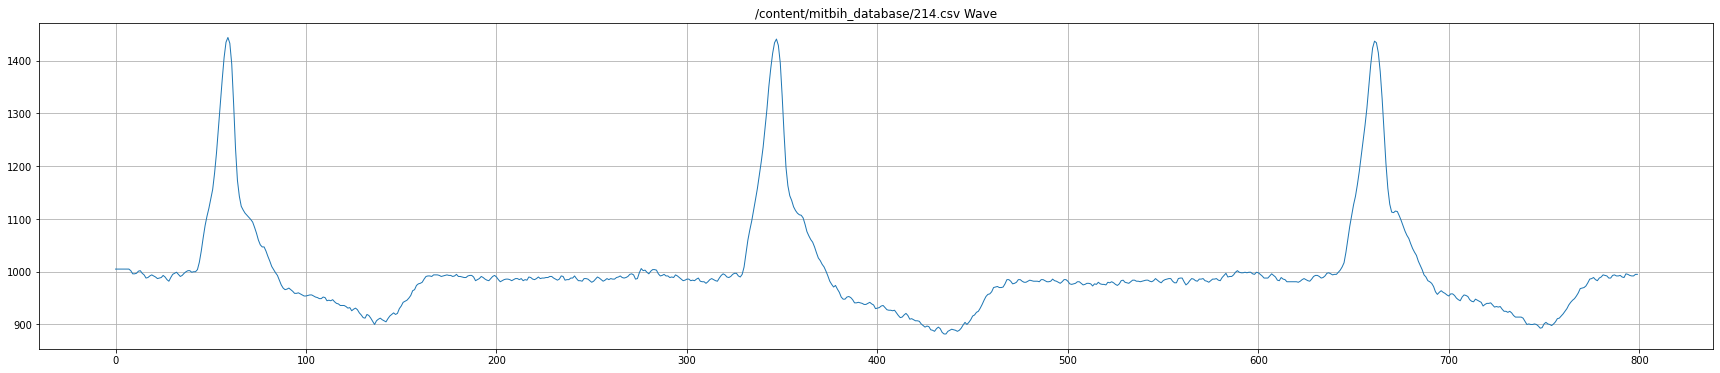

/content/mitbih_database/215.csv


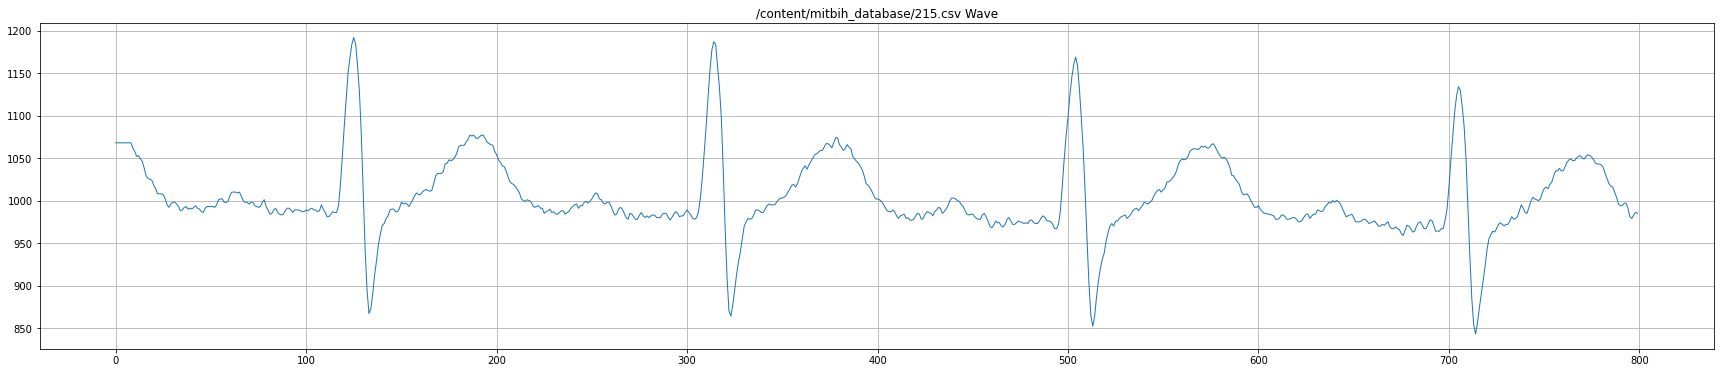

/content/mitbih_database/217.csv


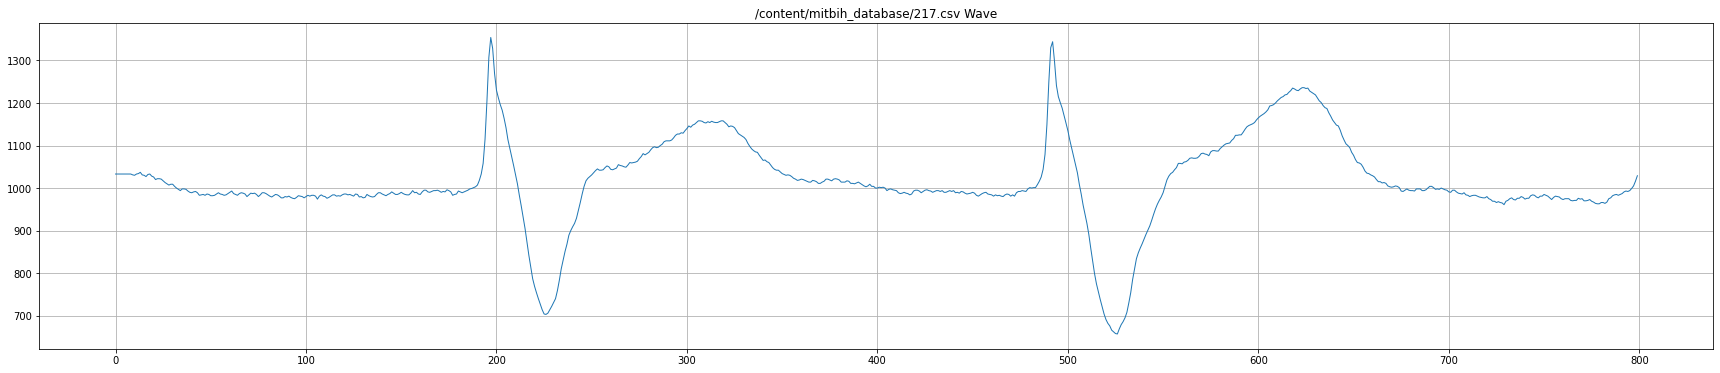

/content/mitbih_database/219.csv


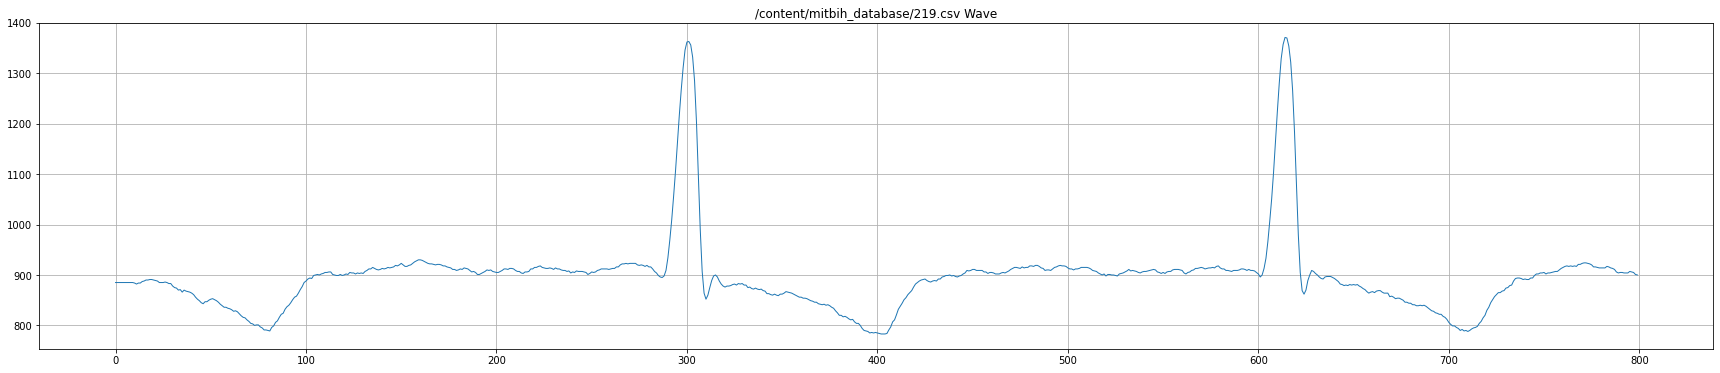

/content/mitbih_database/220.csv


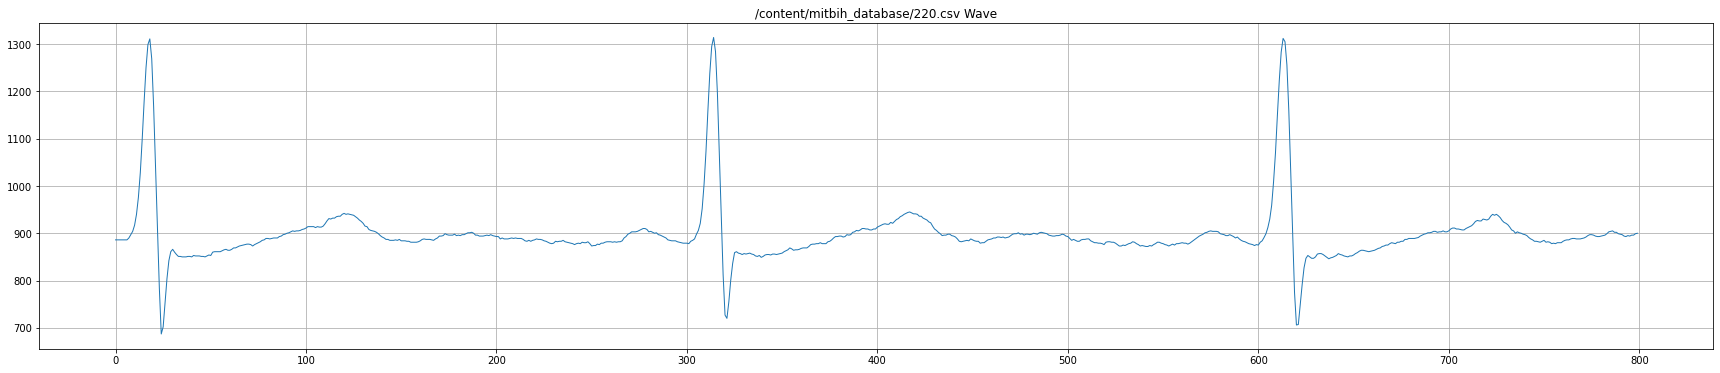

/content/mitbih_database/221.csv


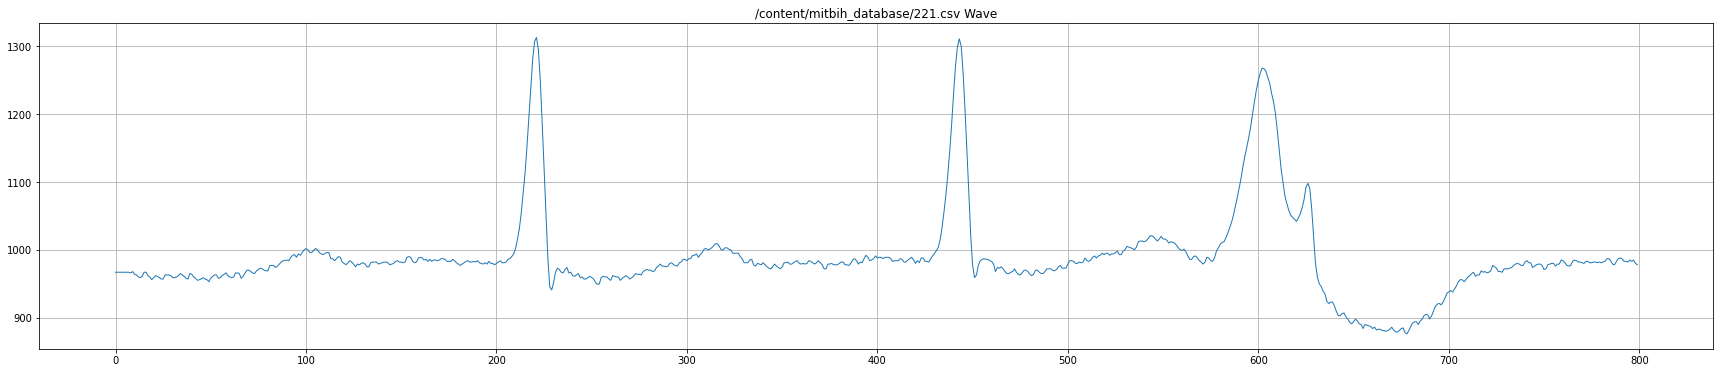

/content/mitbih_database/222.csv


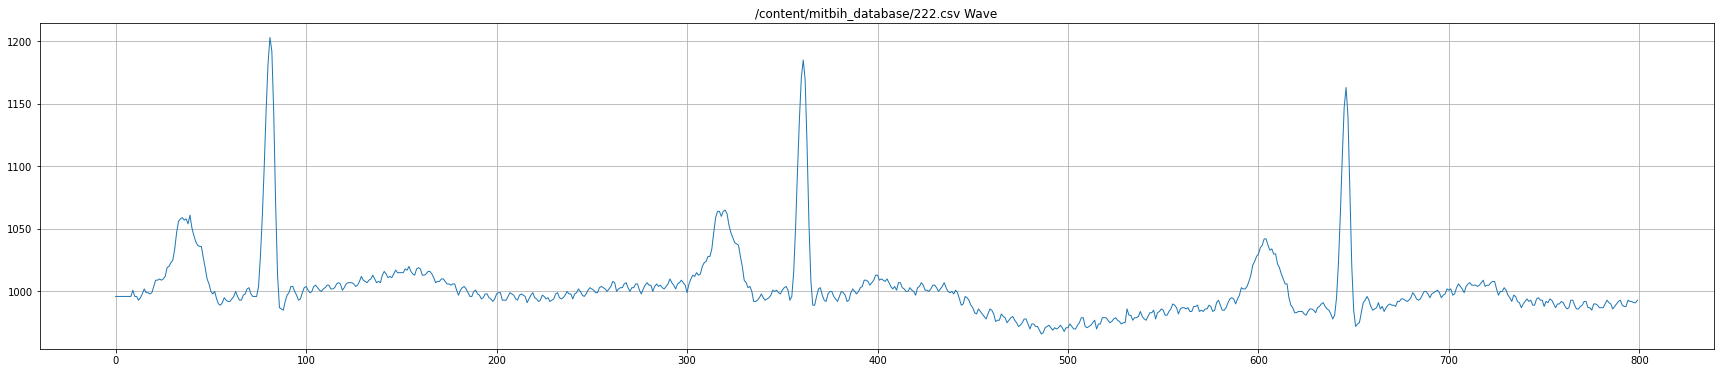

/content/mitbih_database/223.csv


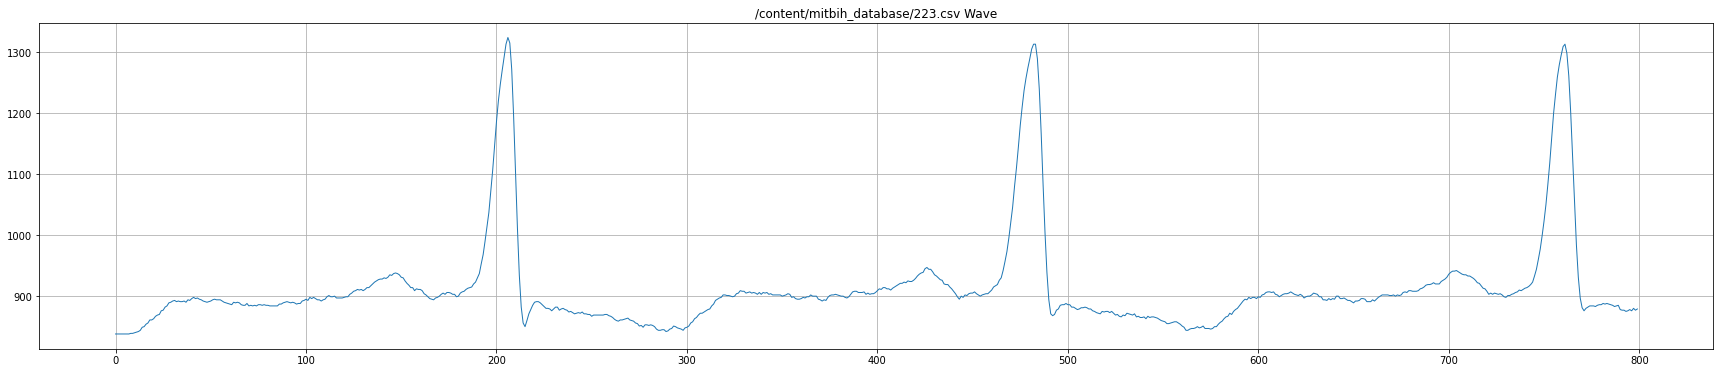

/content/mitbih_database/228.csv


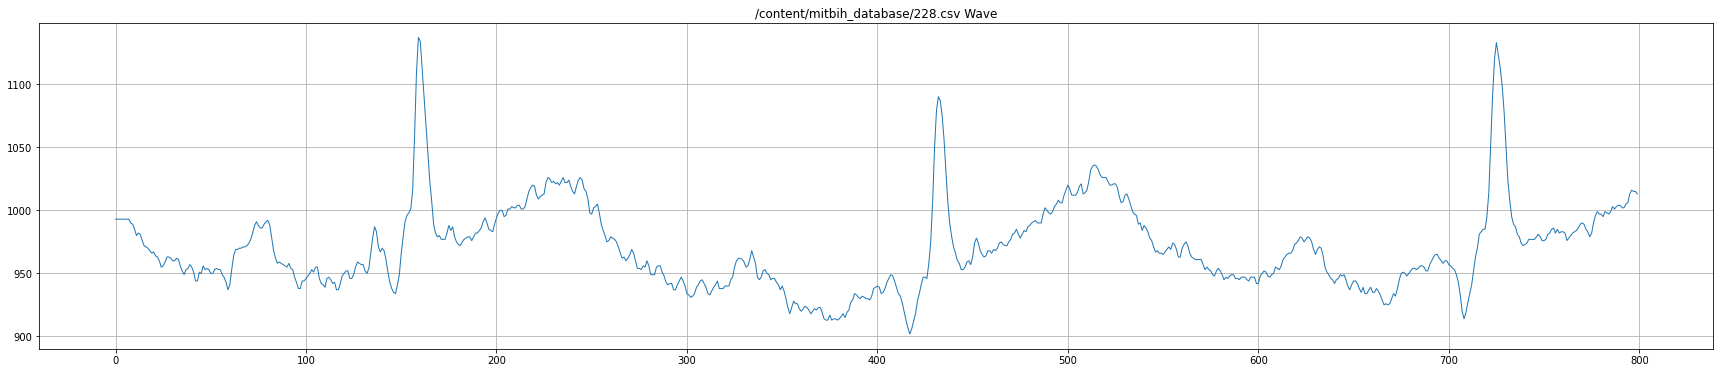

/content/mitbih_database/230.csv


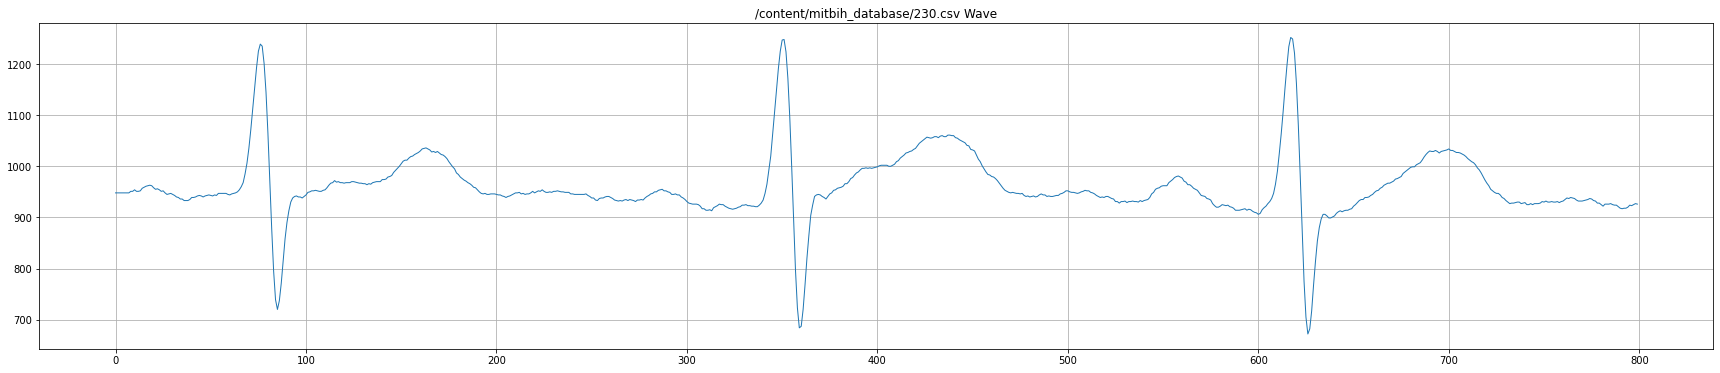

/content/mitbih_database/231.csv


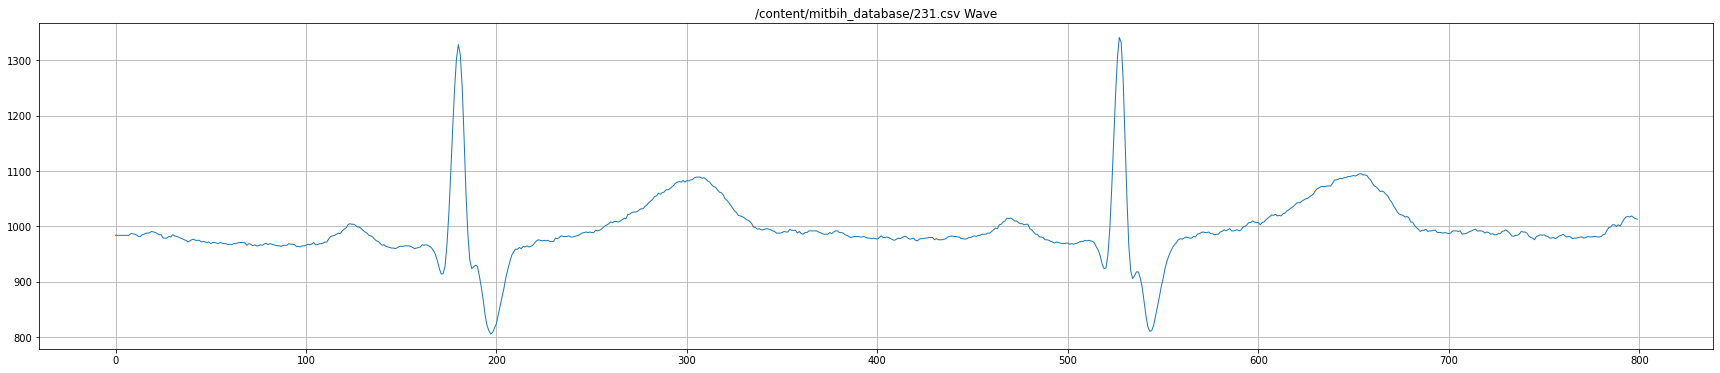

/content/mitbih_database/232.csv


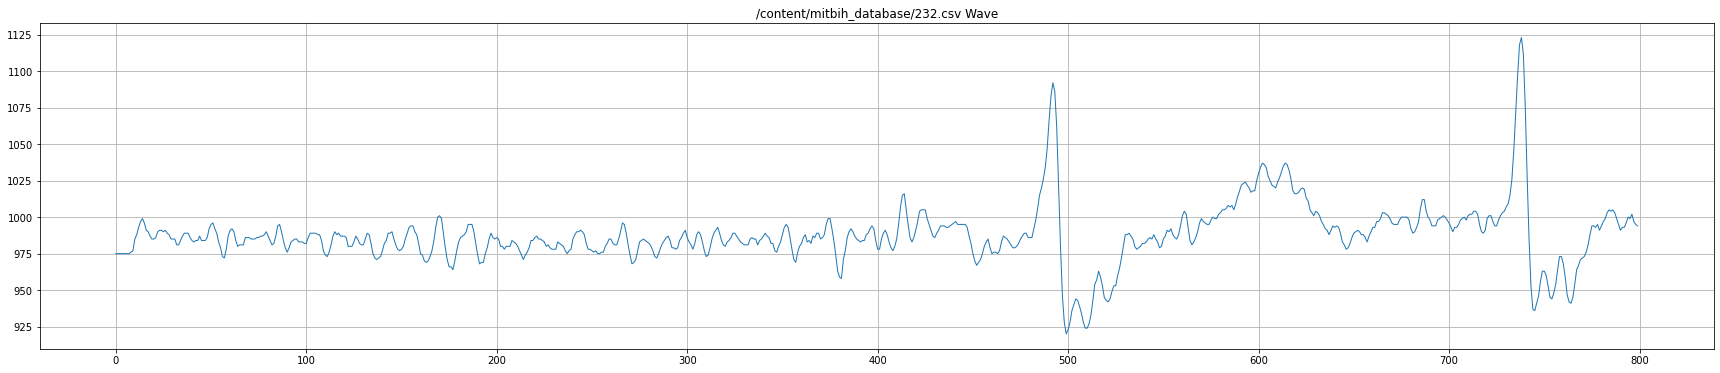

/content/mitbih_database/233.csv


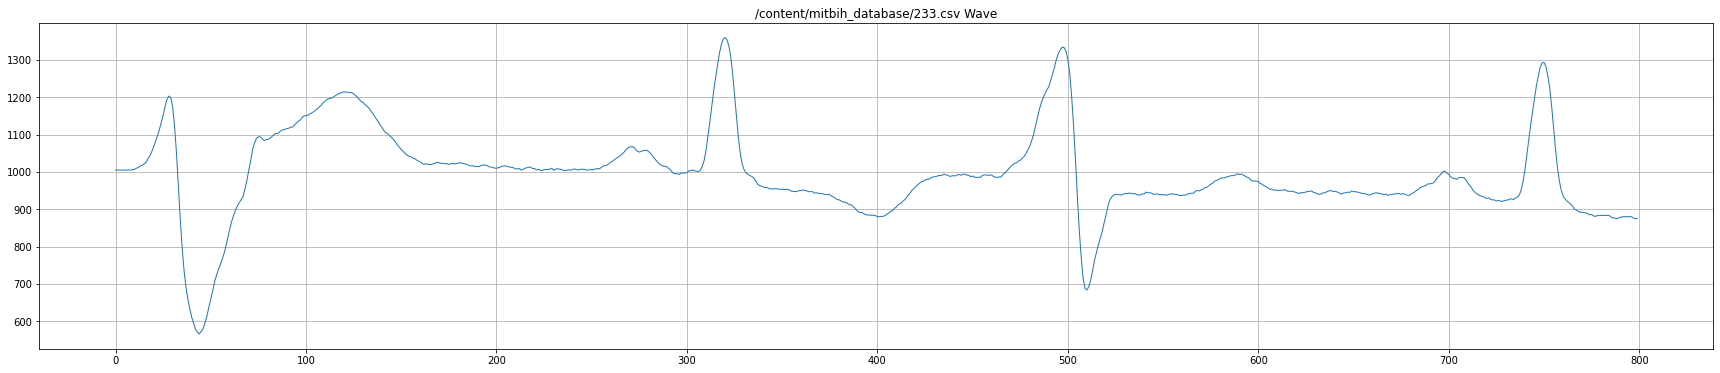

/content/mitbih_database/234.csv


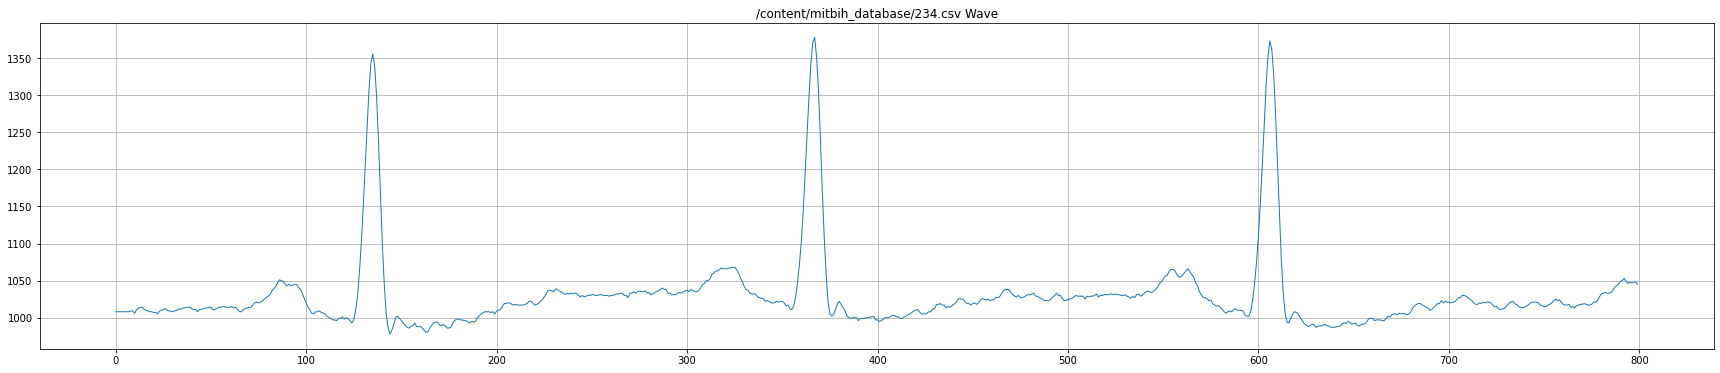

In [ ]:
for r in range(0,len(records)):
  signals = []
  print(records[r])
  with open(records[r], 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') 
    row_index = -1
    for row in spamreader:
      if(row_index >= 0):
        signals.insert(row_index, int(row[1]))
      row_index += 1
        

  plt.title(records[r] + " Wave")
  plt.plot(signals[0:800])
  plt.show()
            

Signal Preprocessing

48
/content/mitbih_database/100.csv


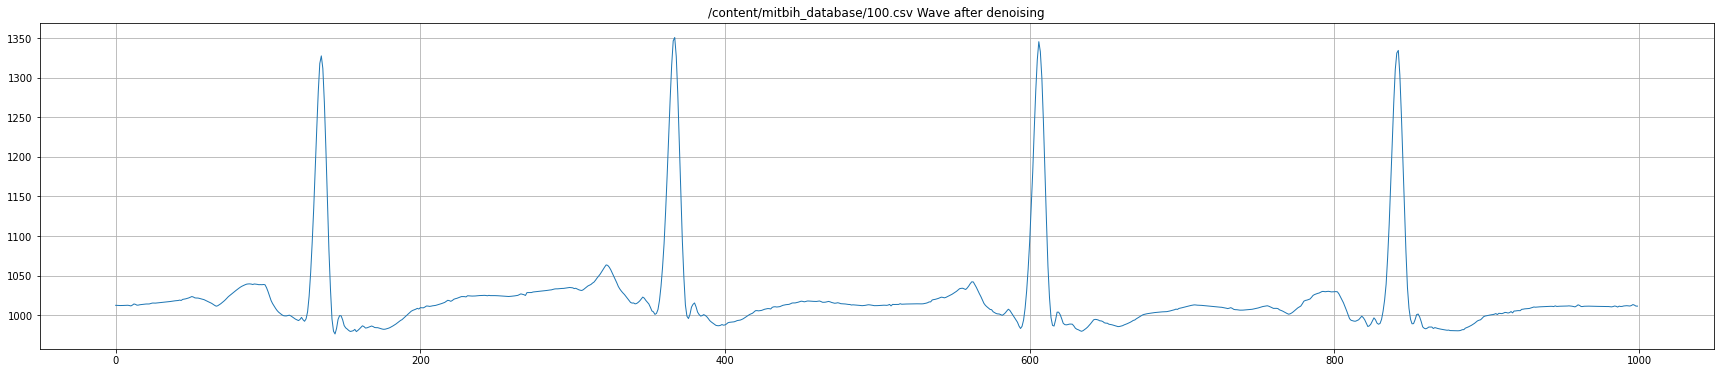

/content/mitbih_database/101.csv


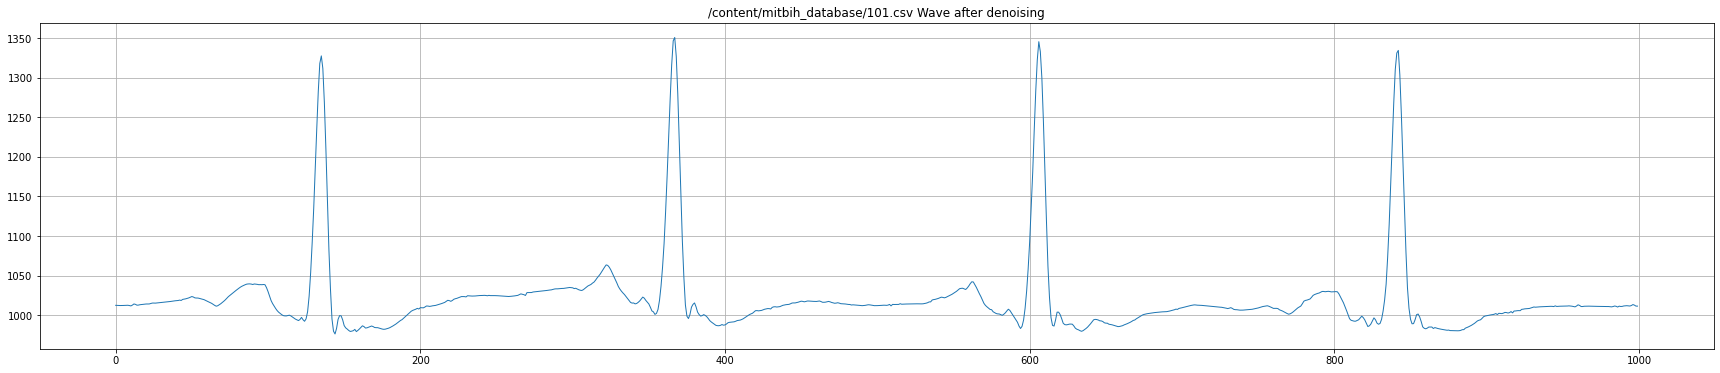

/content/mitbih_database/102.csv


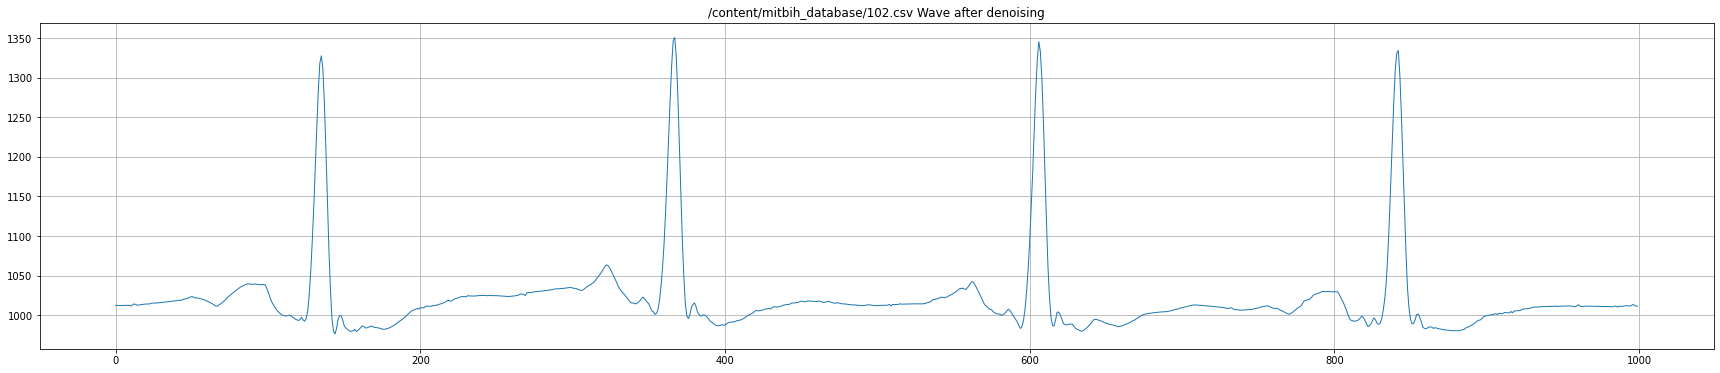

/content/mitbih_database/103.csv


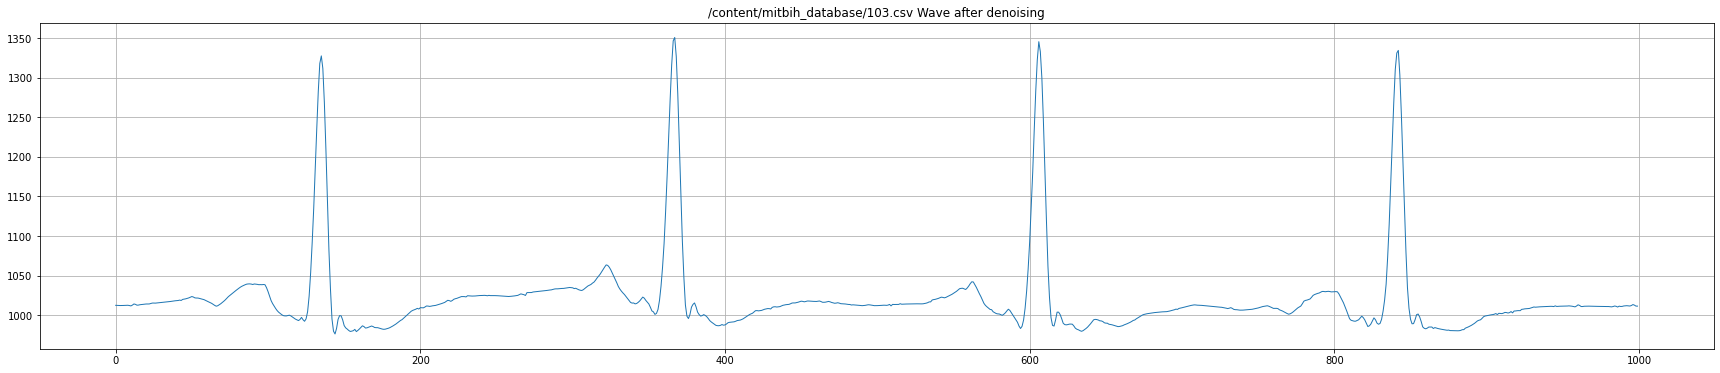

/content/mitbih_database/104.csv


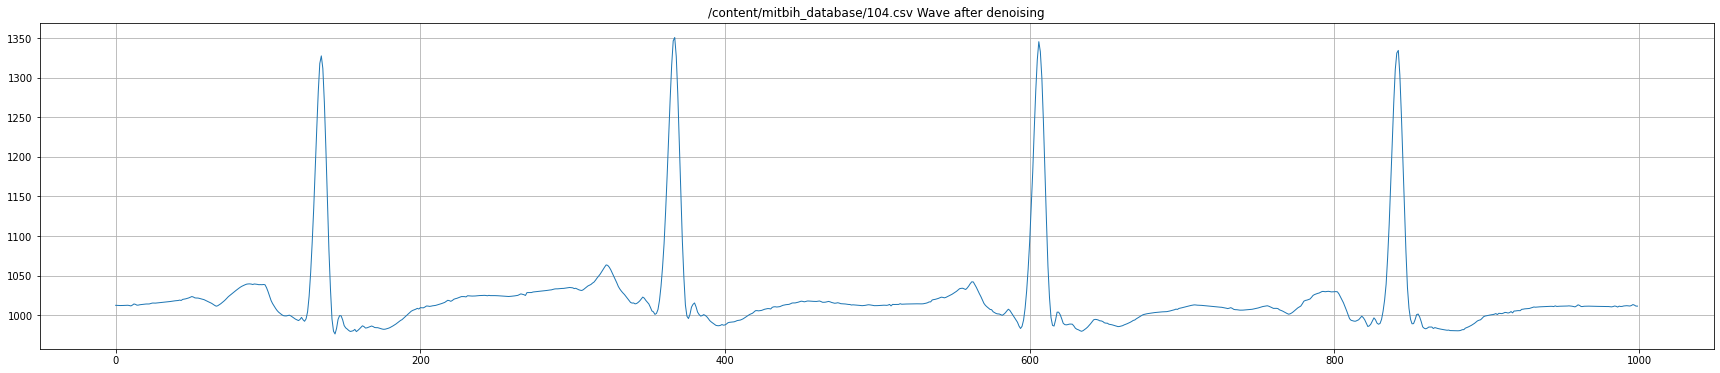

/content/mitbih_database/105.csv


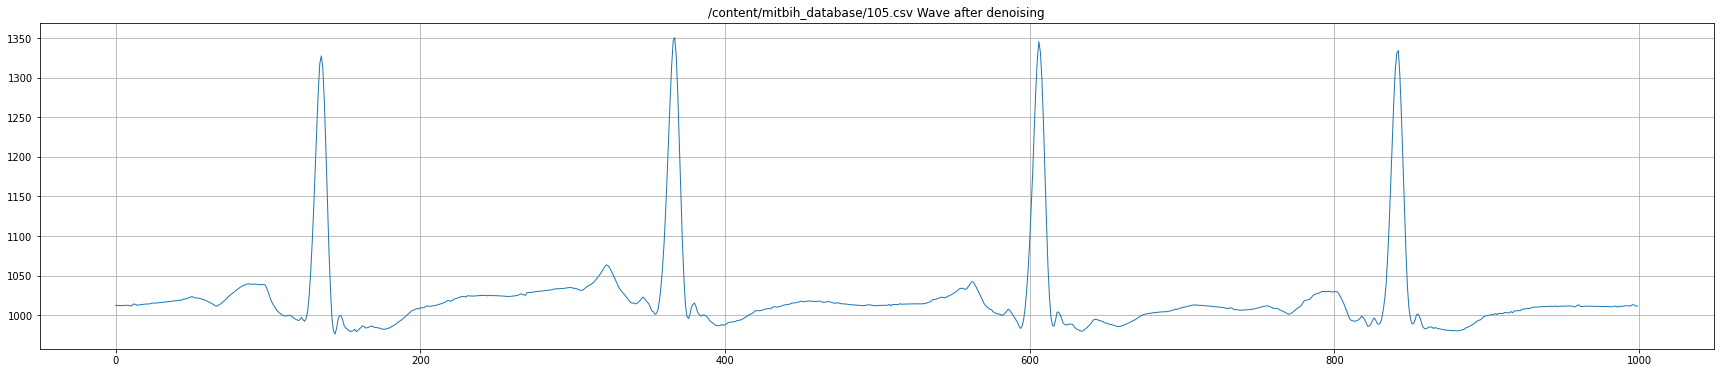

/content/mitbih_database/106.csv


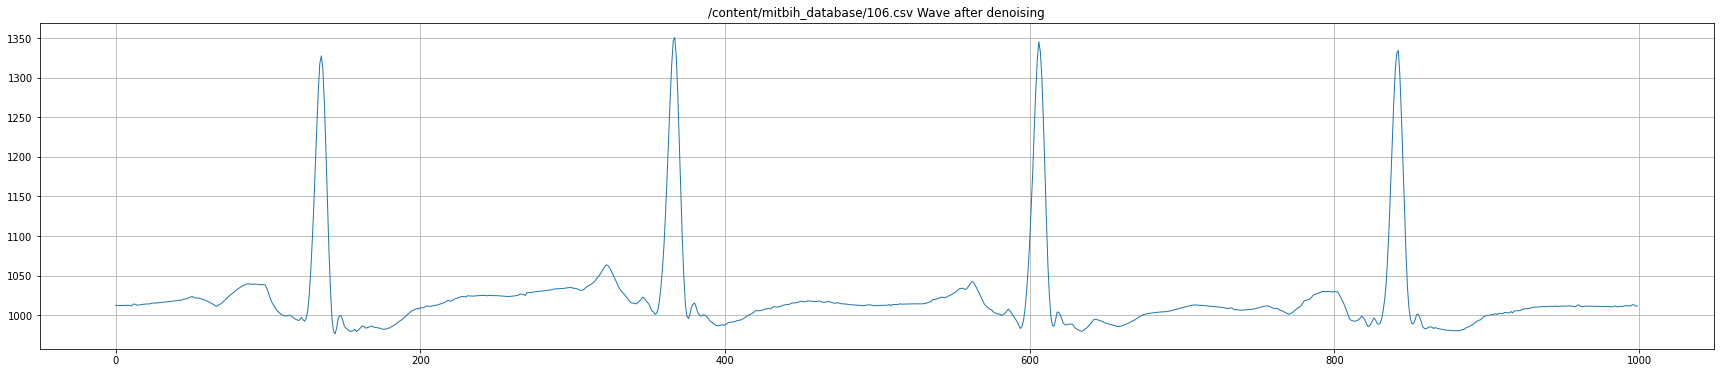

/content/mitbih_database/107.csv


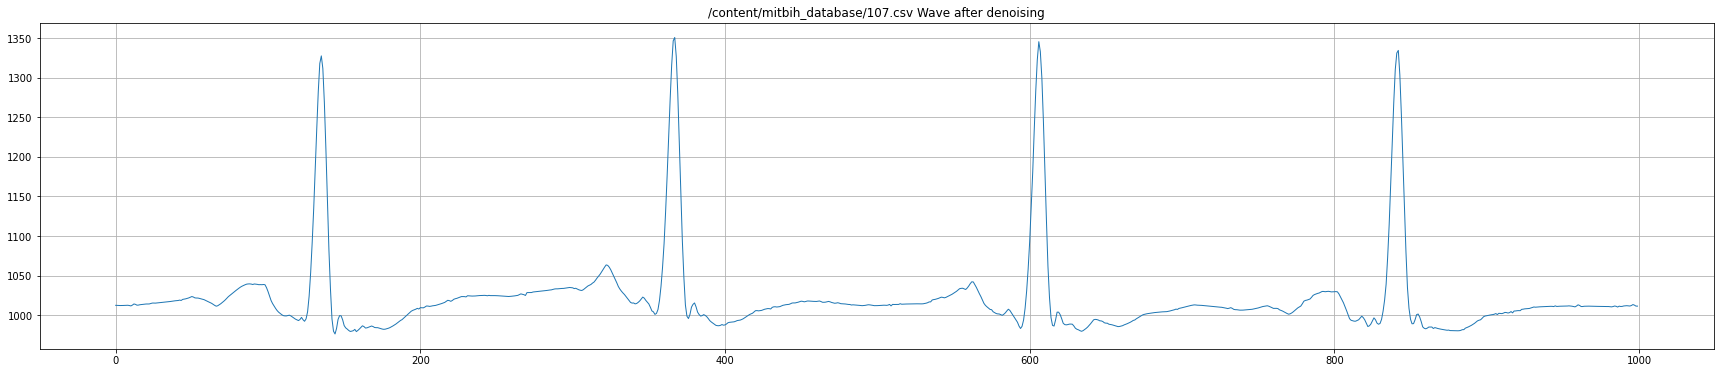

/content/mitbih_database/108.csv


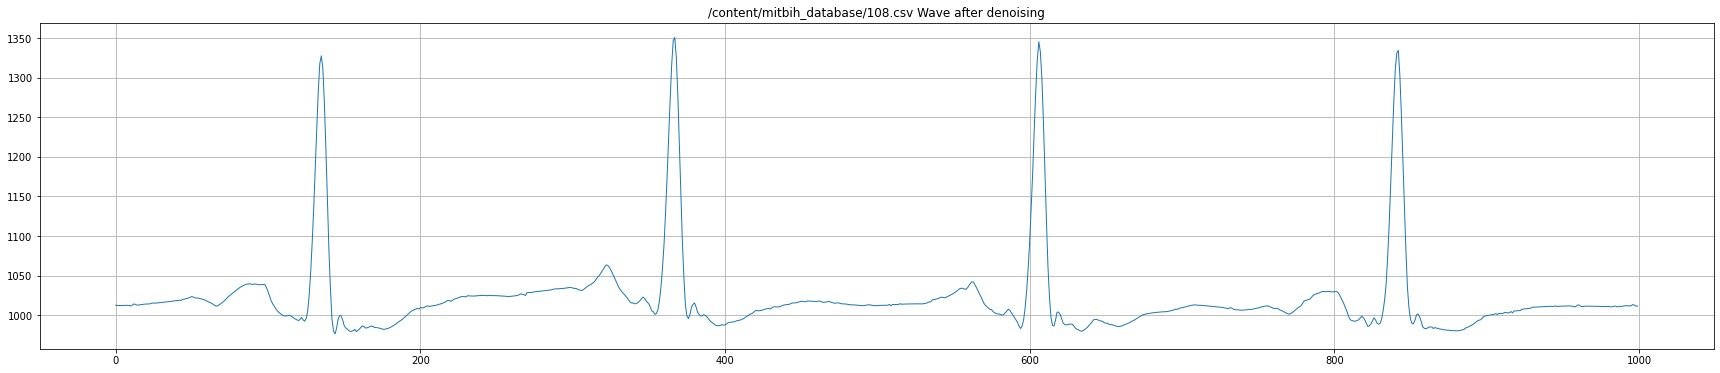

/content/mitbih_database/109.csv


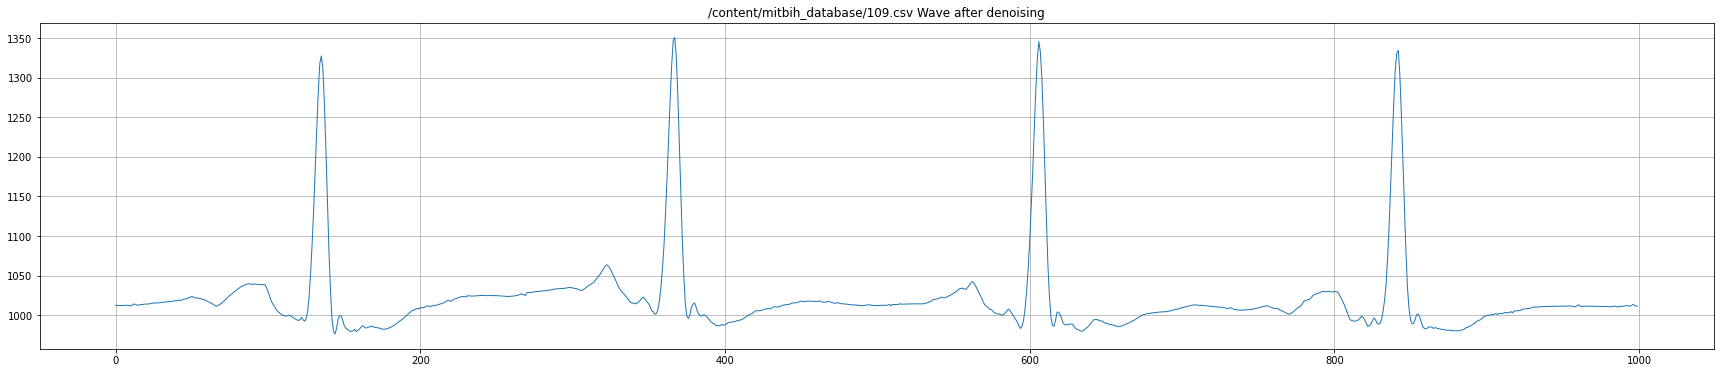

/content/mitbih_database/111.csv


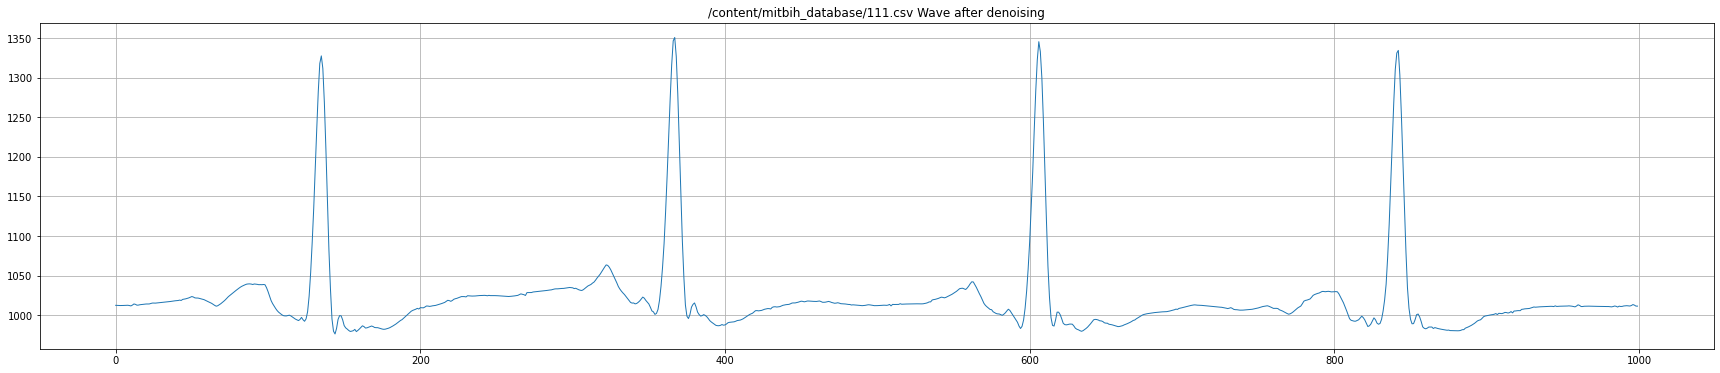

/content/mitbih_database/112.csv


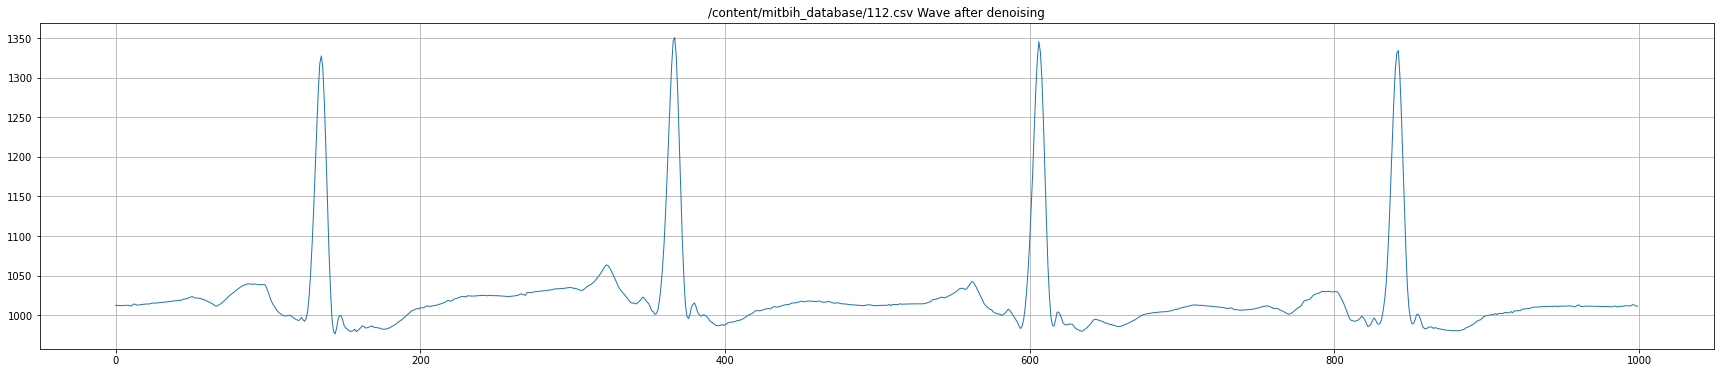

/content/mitbih_database/113.csv


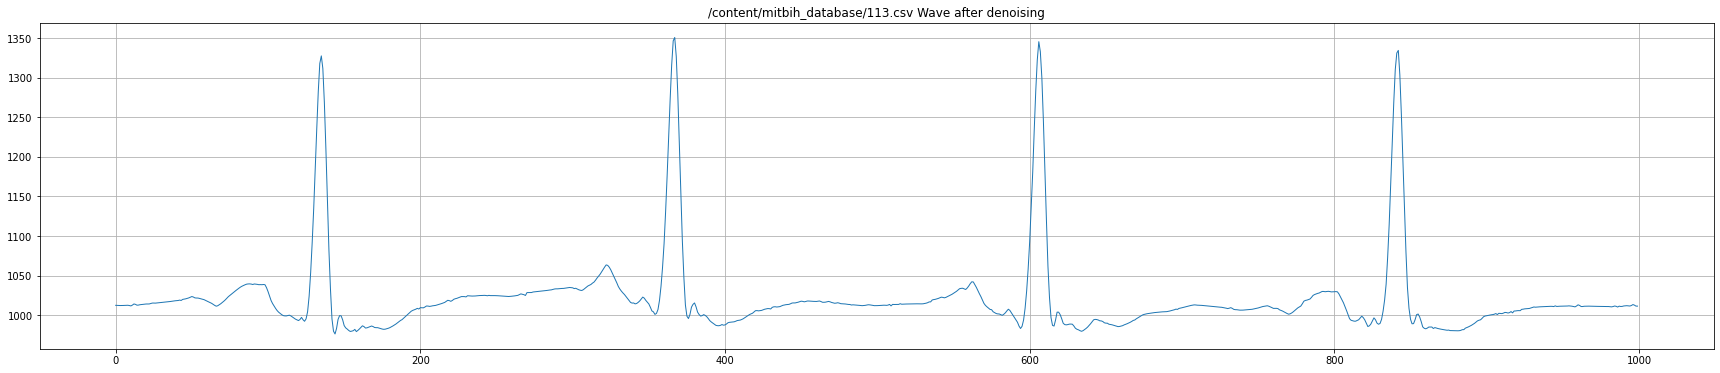

/content/mitbih_database/114.csv


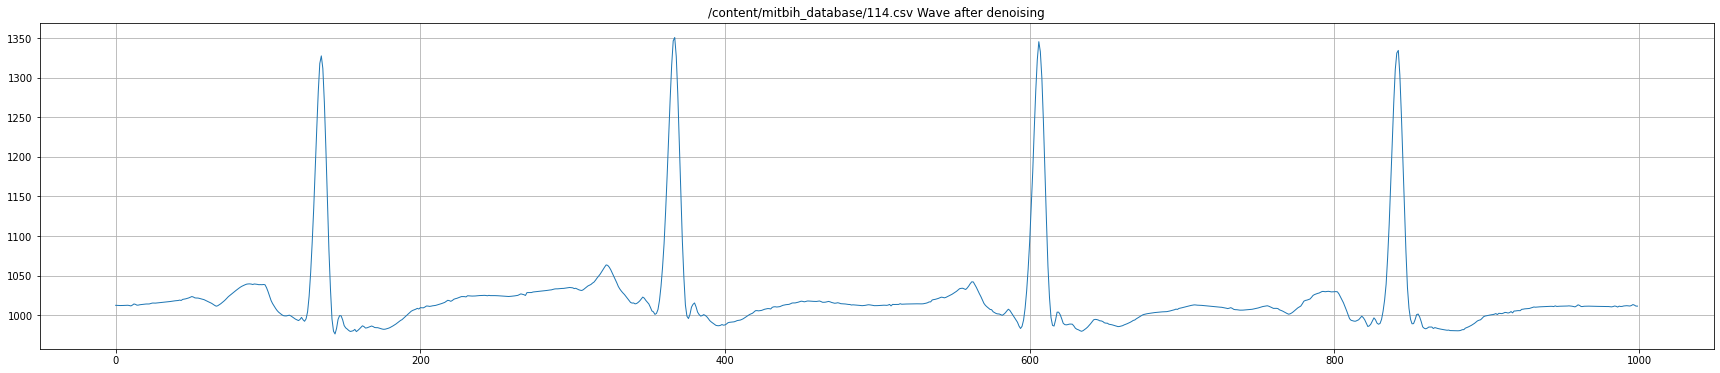

/content/mitbih_database/115.csv


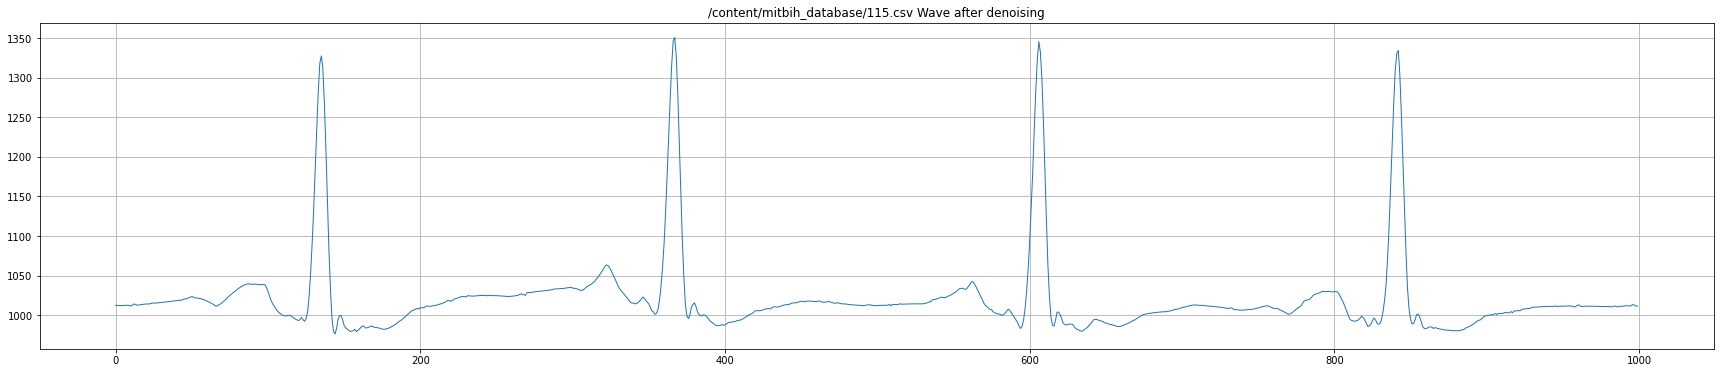

/content/mitbih_database/116.csv


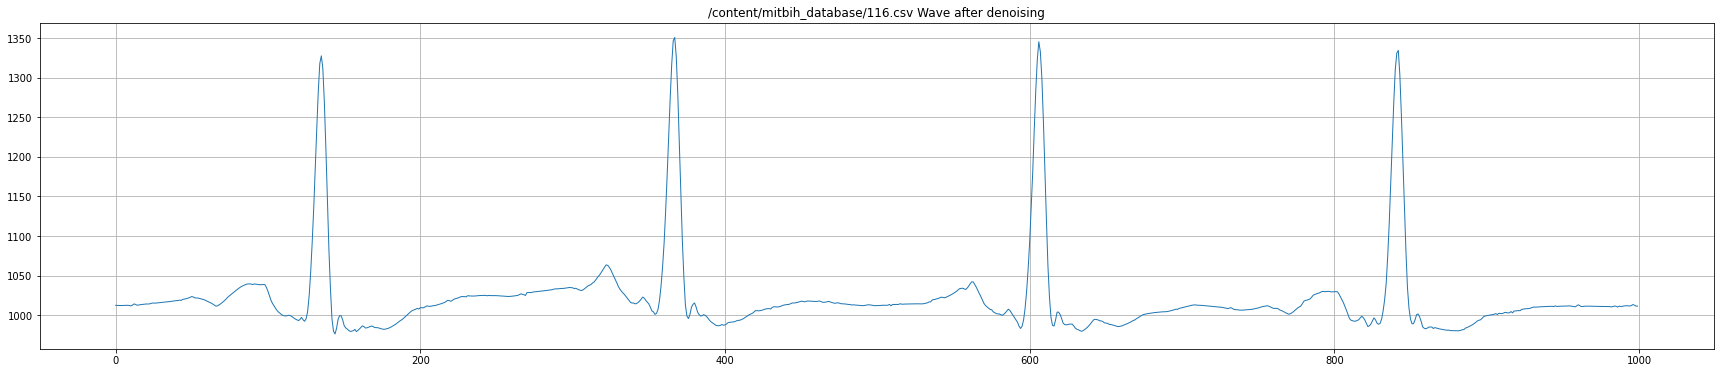

/content/mitbih_database/117.csv


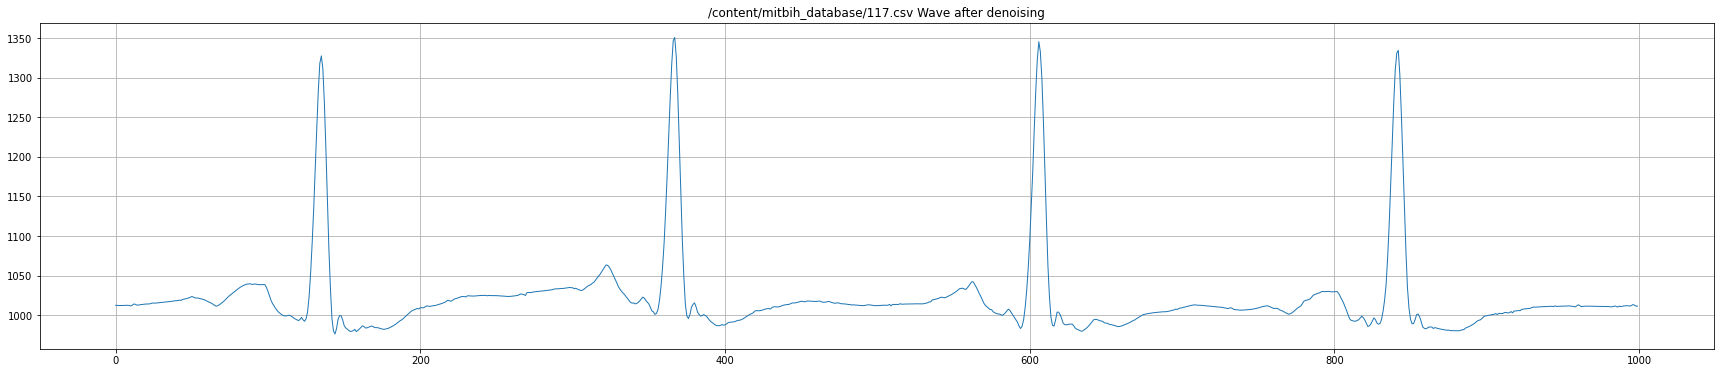

/content/mitbih_database/118.csv


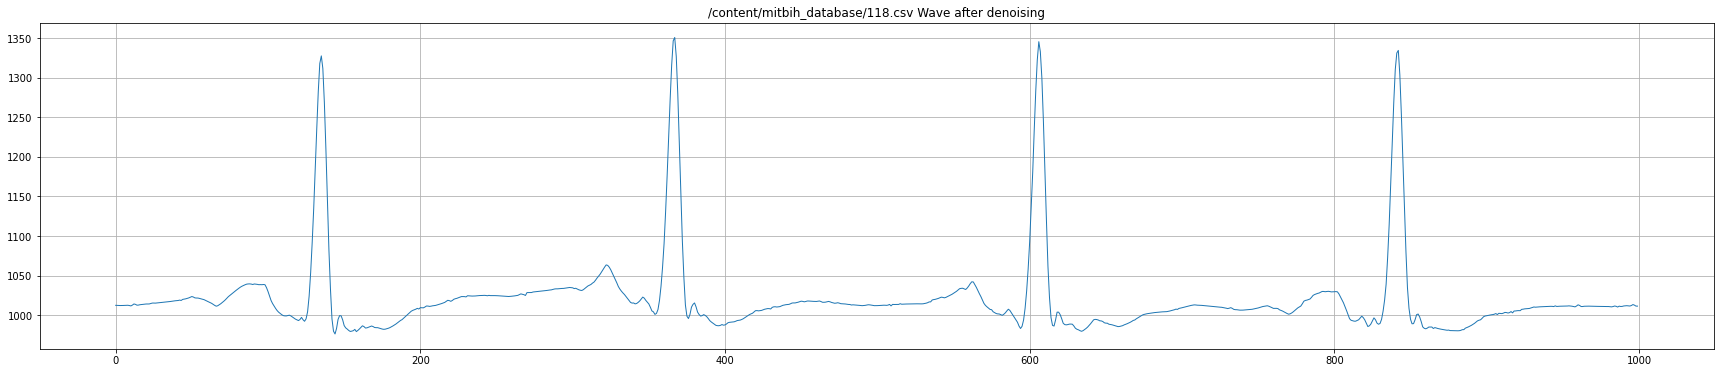

/content/mitbih_database/119.csv


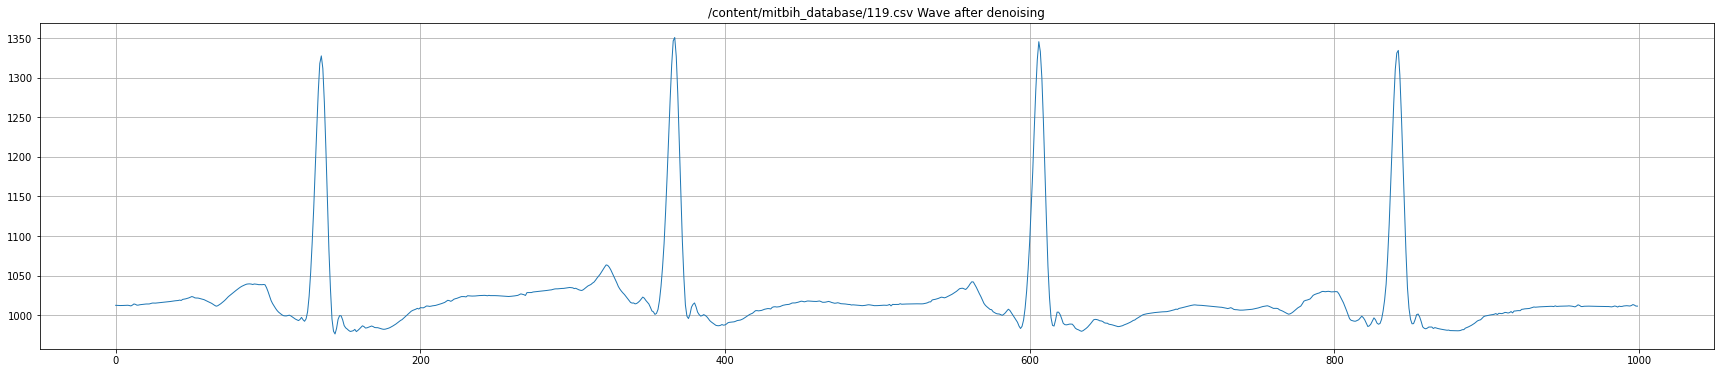

/content/mitbih_database/121.csv


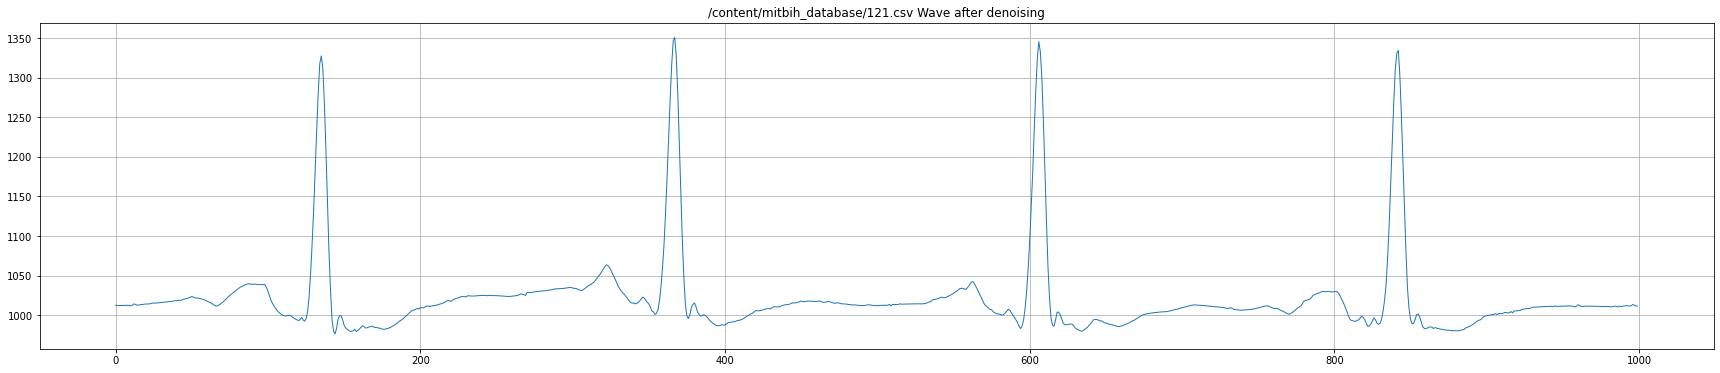

/content/mitbih_database/122.csv


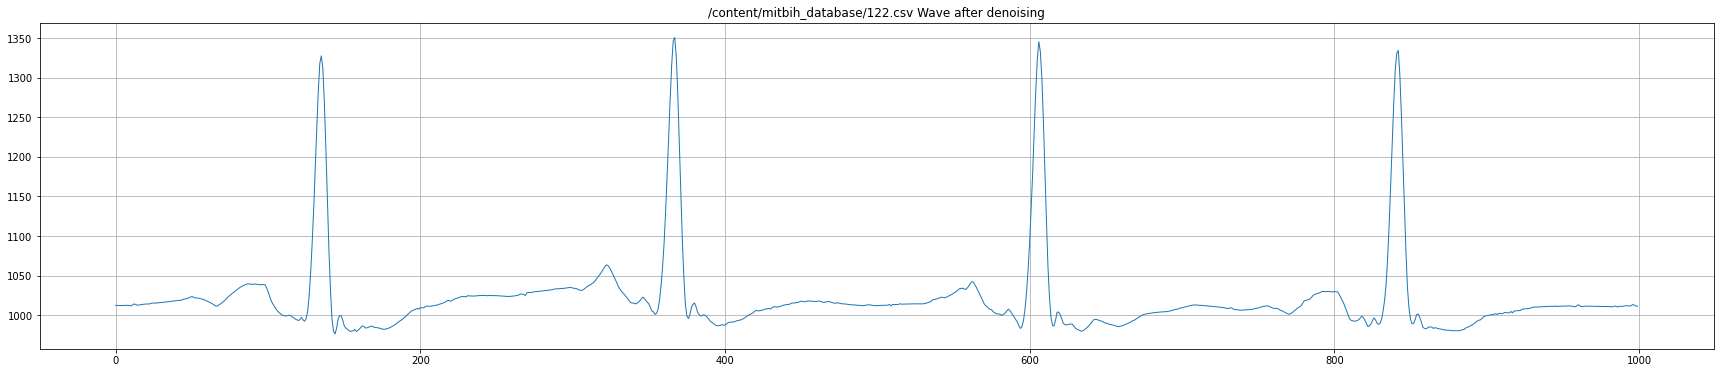

/content/mitbih_database/123.csv


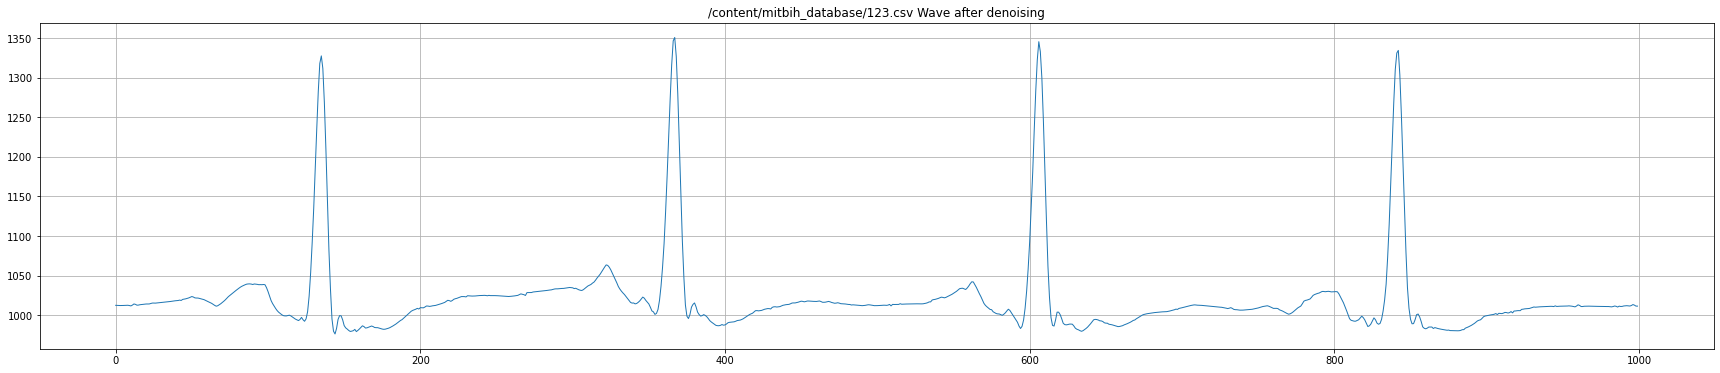

/content/mitbih_database/124.csv


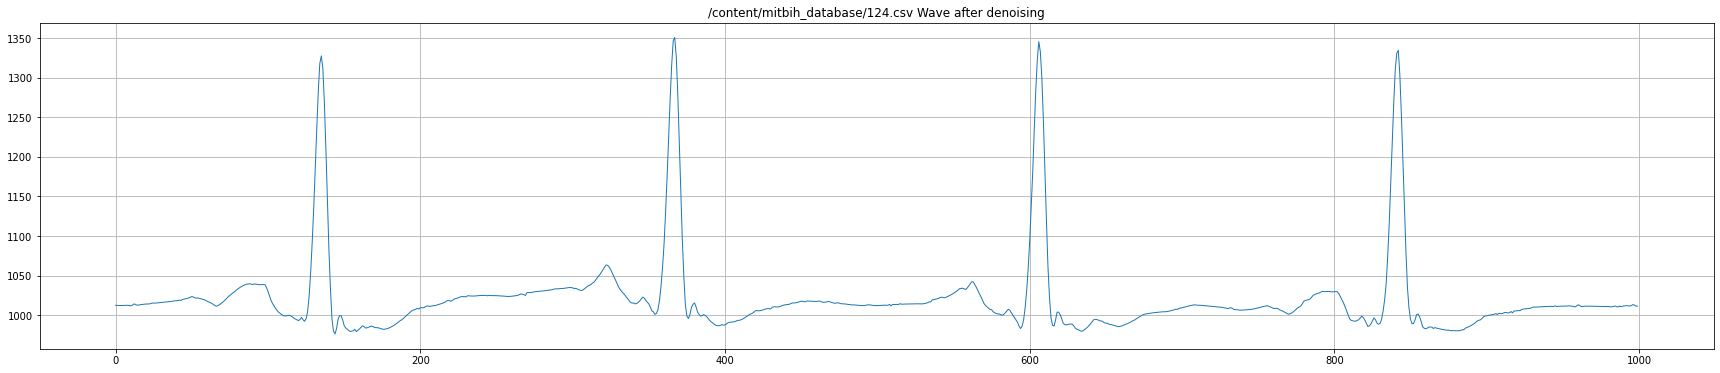

/content/mitbih_database/200.csv


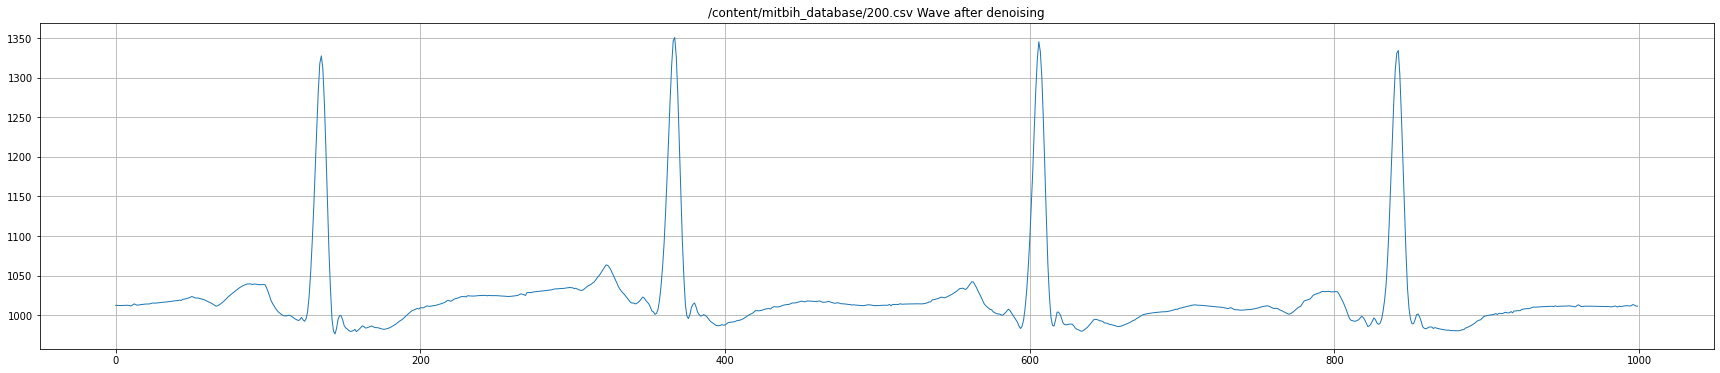

/content/mitbih_database/201.csv


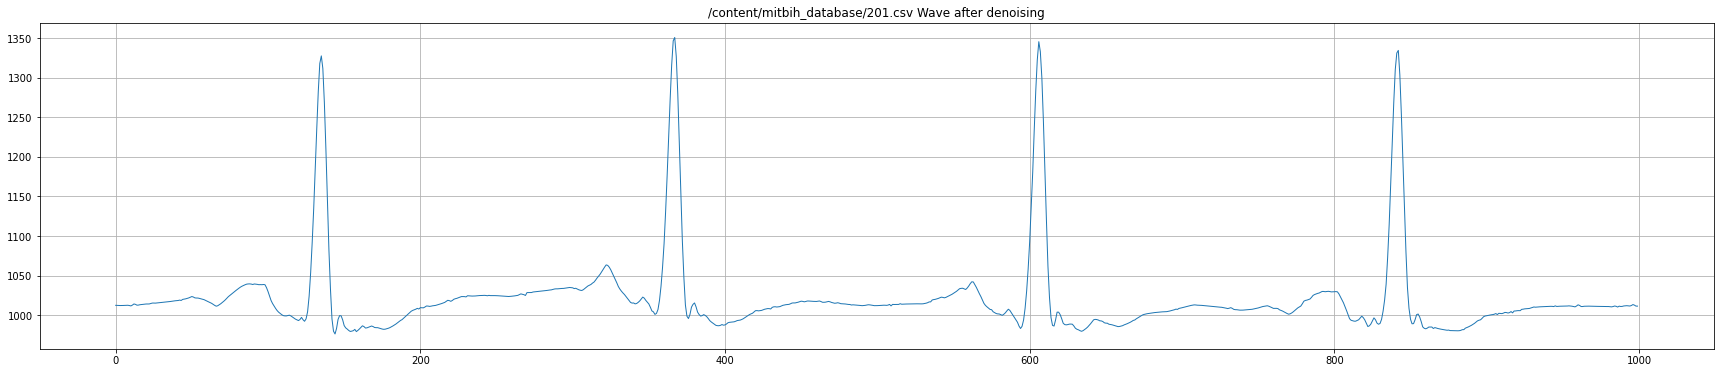

/content/mitbih_database/202.csv


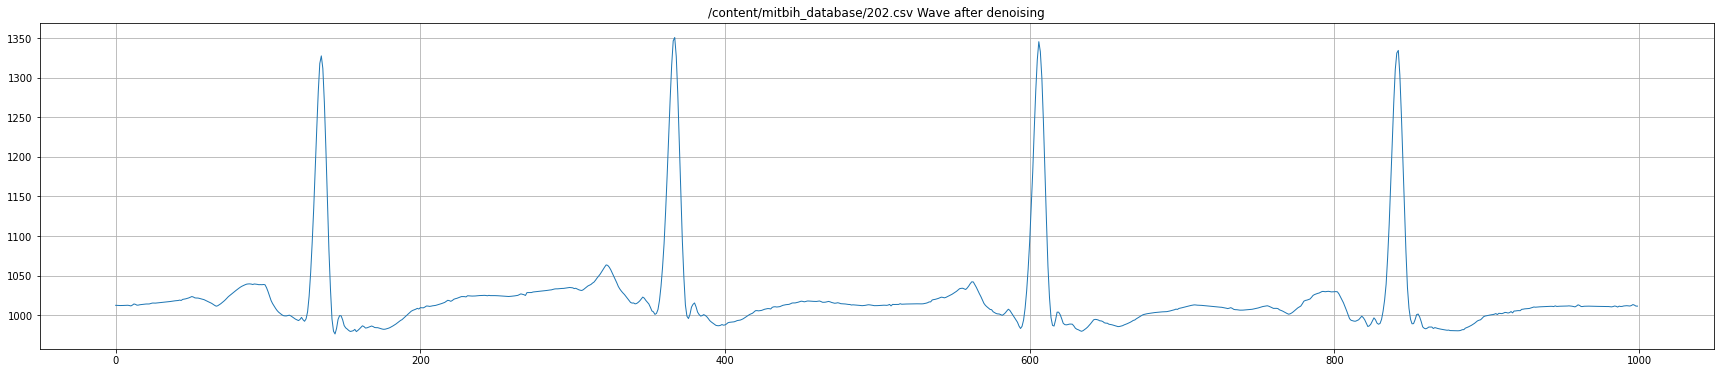

/content/mitbih_database/203.csv


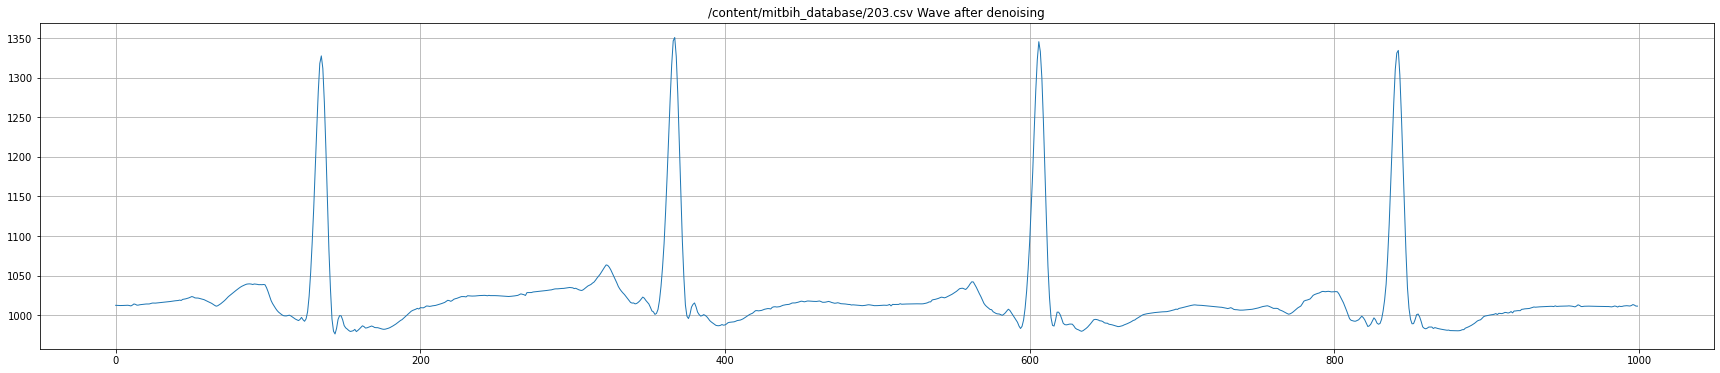

/content/mitbih_database/205.csv


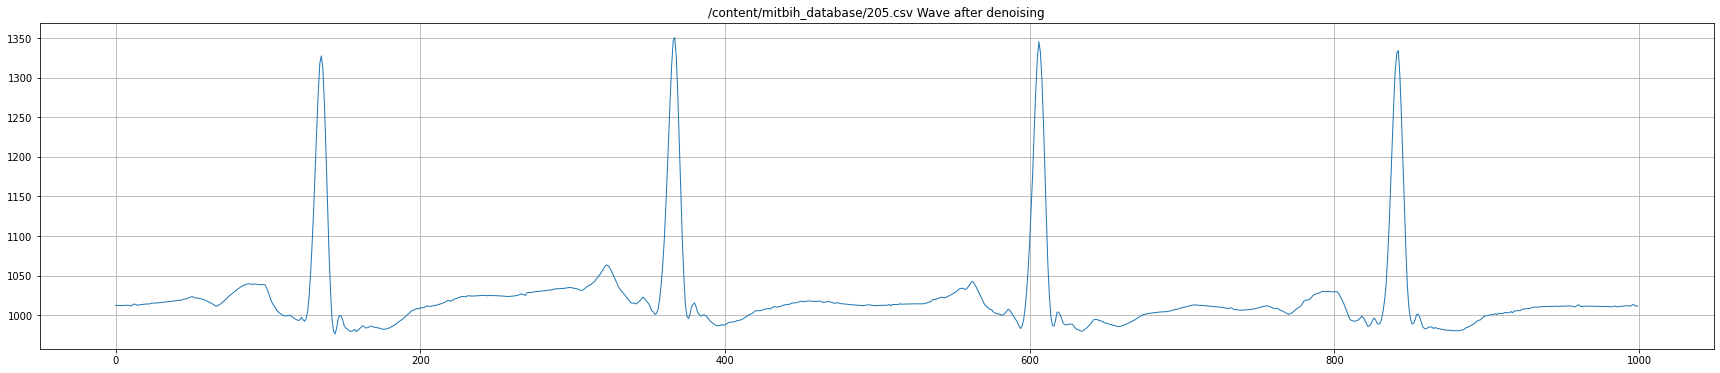

/content/mitbih_database/207.csv


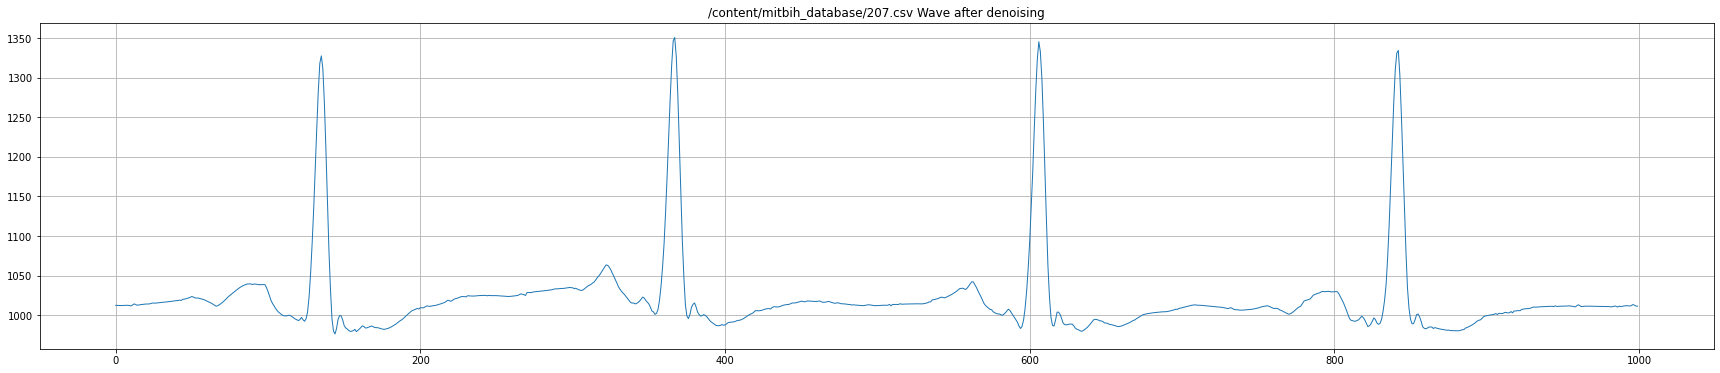

/content/mitbih_database/208.csv


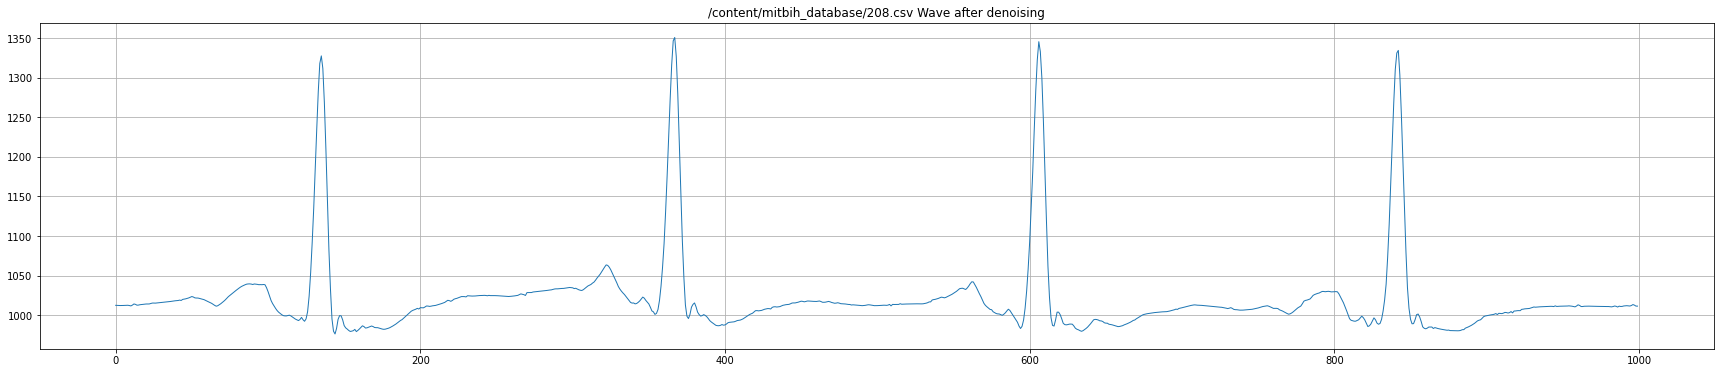

/content/mitbih_database/209.csv


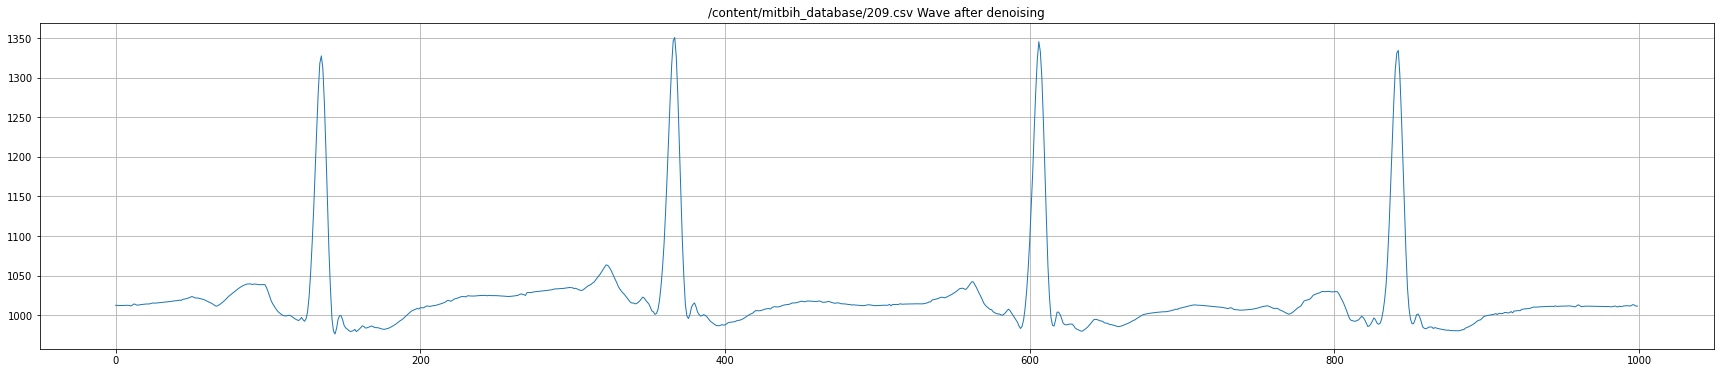

/content/mitbih_database/210.csv


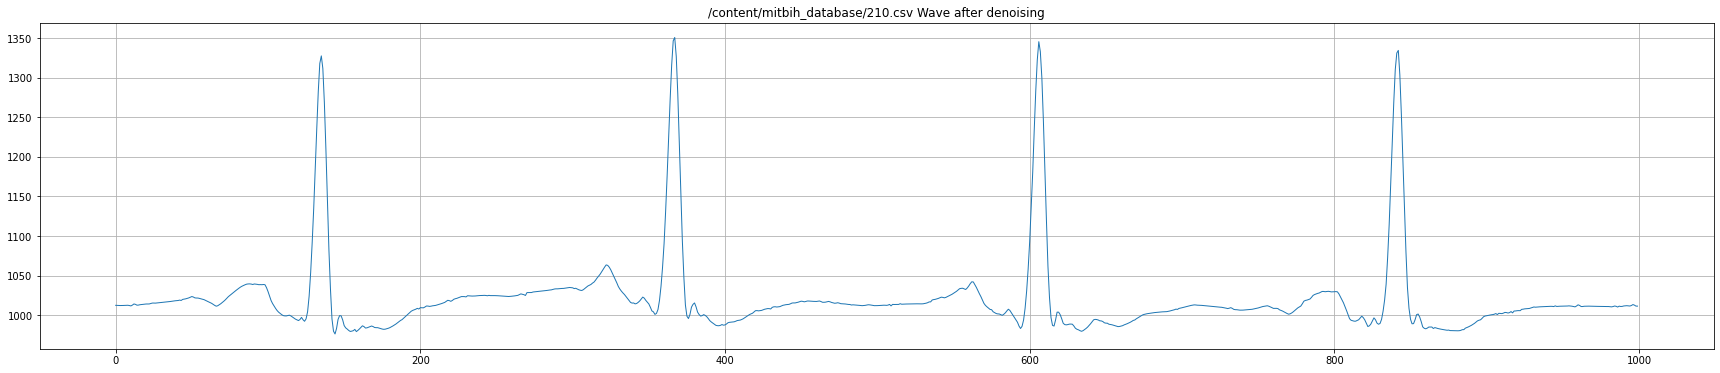

/content/mitbih_database/212.csv


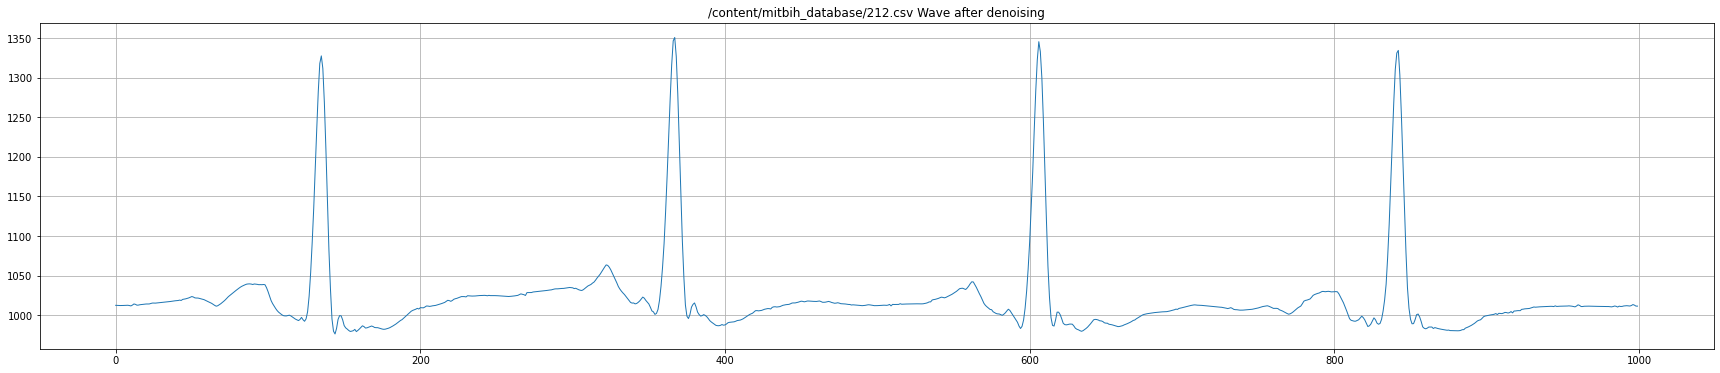

/content/mitbih_database/213.csv


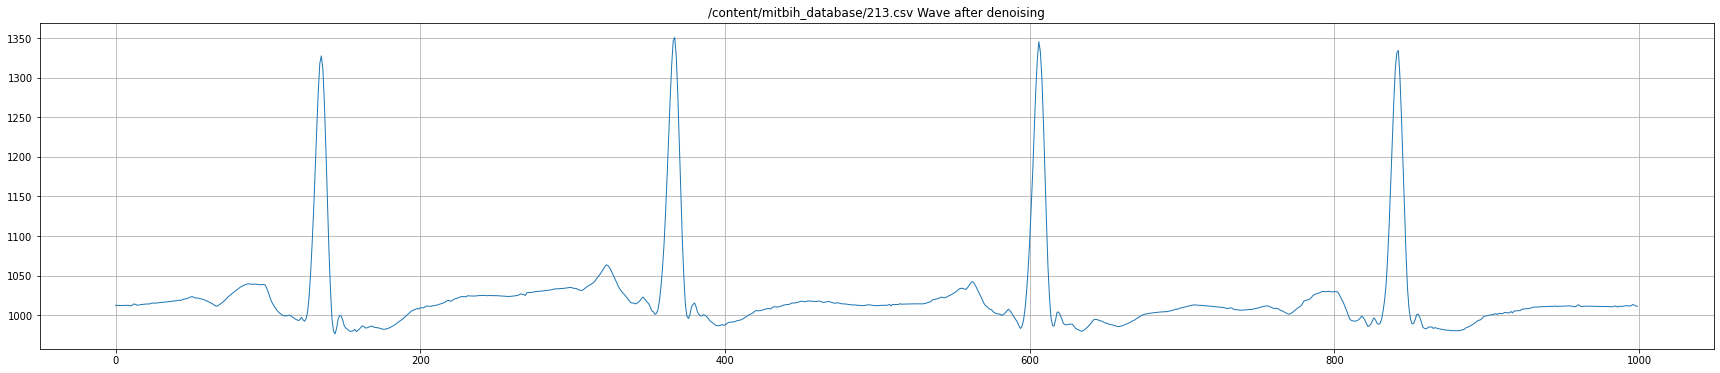

/content/mitbih_database/214.csv


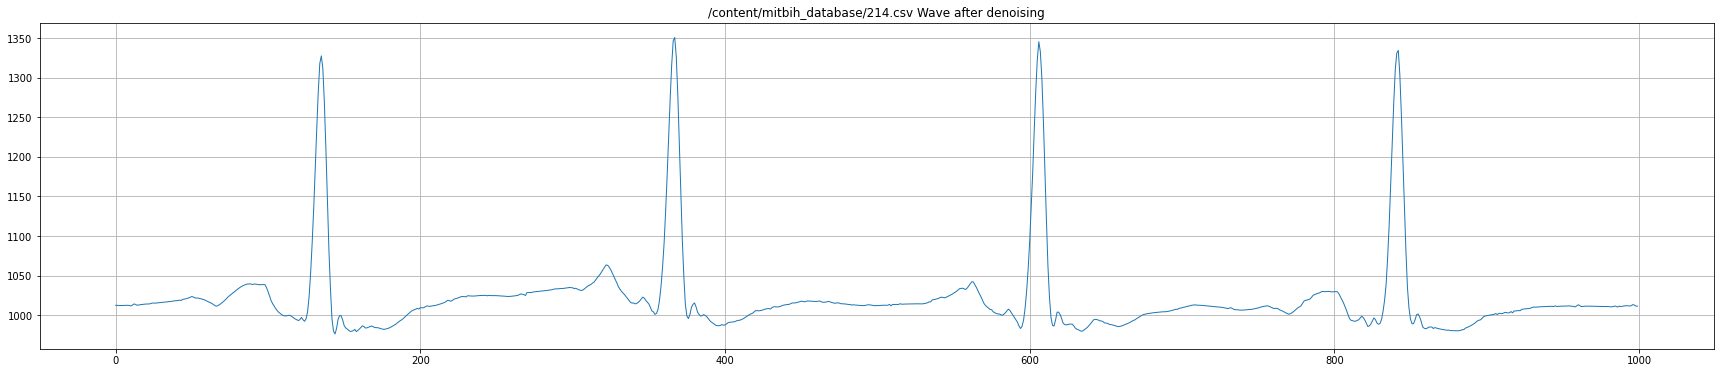

/content/mitbih_database/215.csv


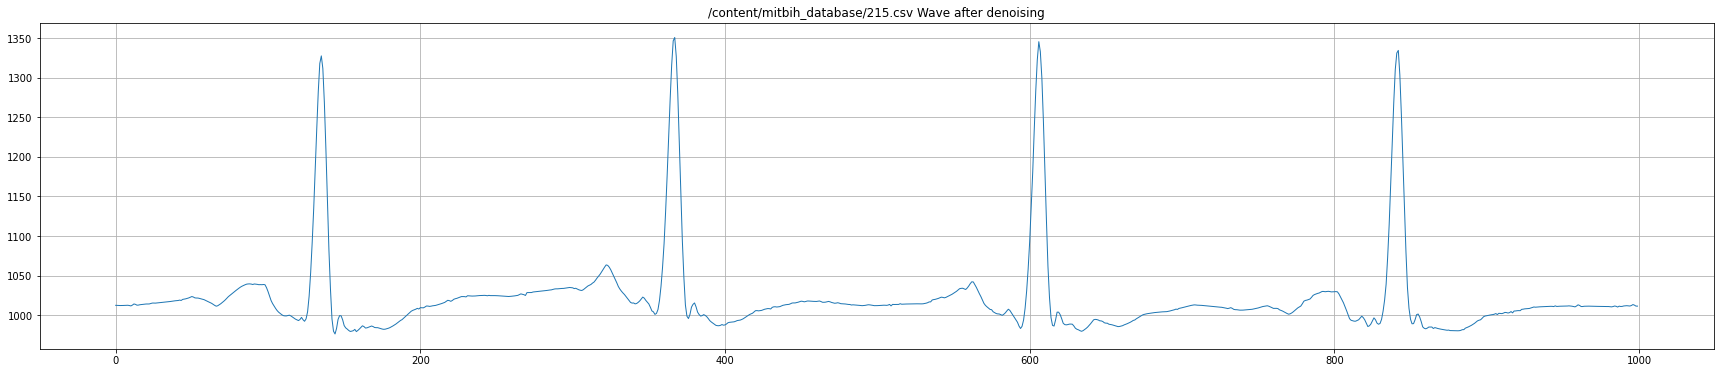

/content/mitbih_database/217.csv


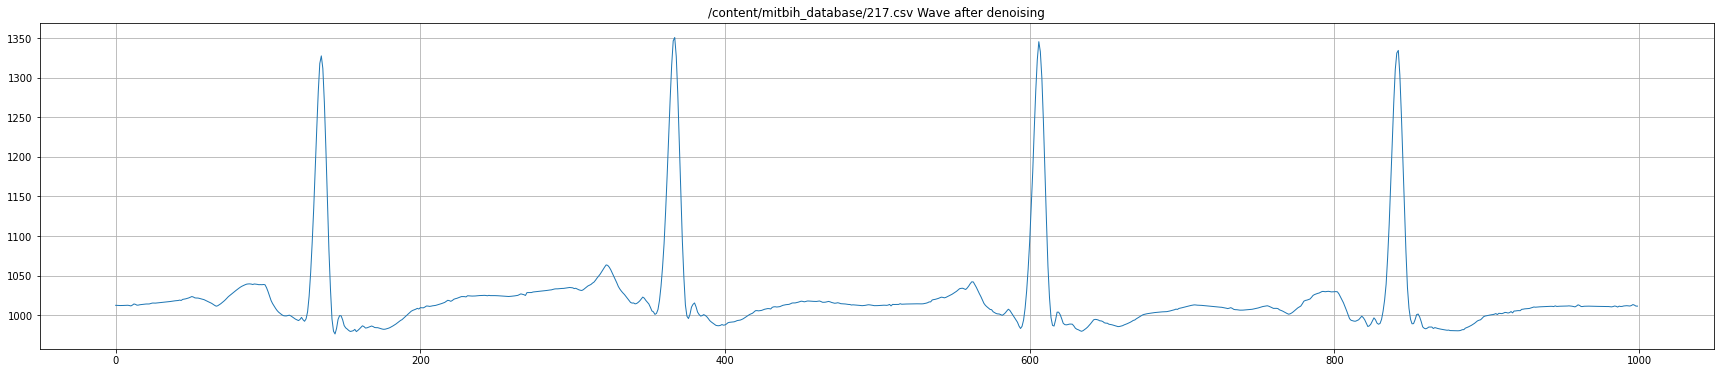

/content/mitbih_database/219.csv


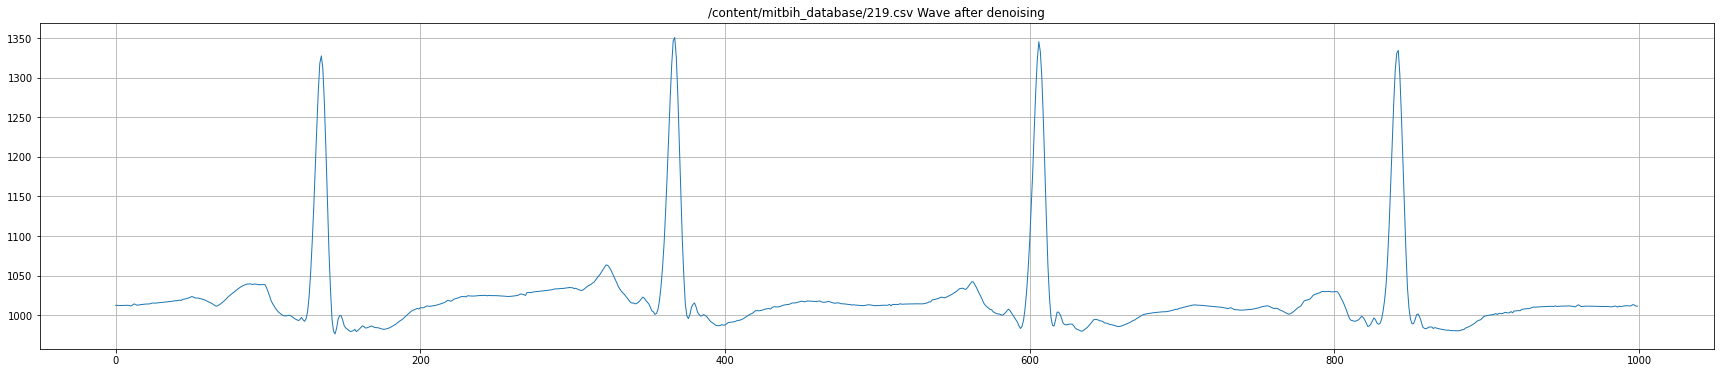

/content/mitbih_database/220.csv


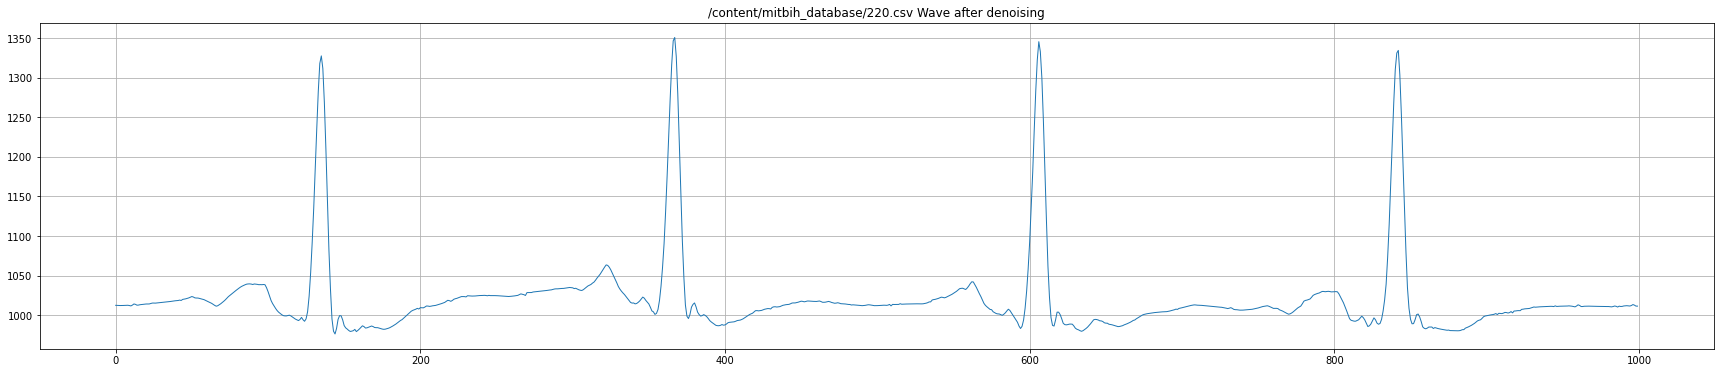

/content/mitbih_database/221.csv


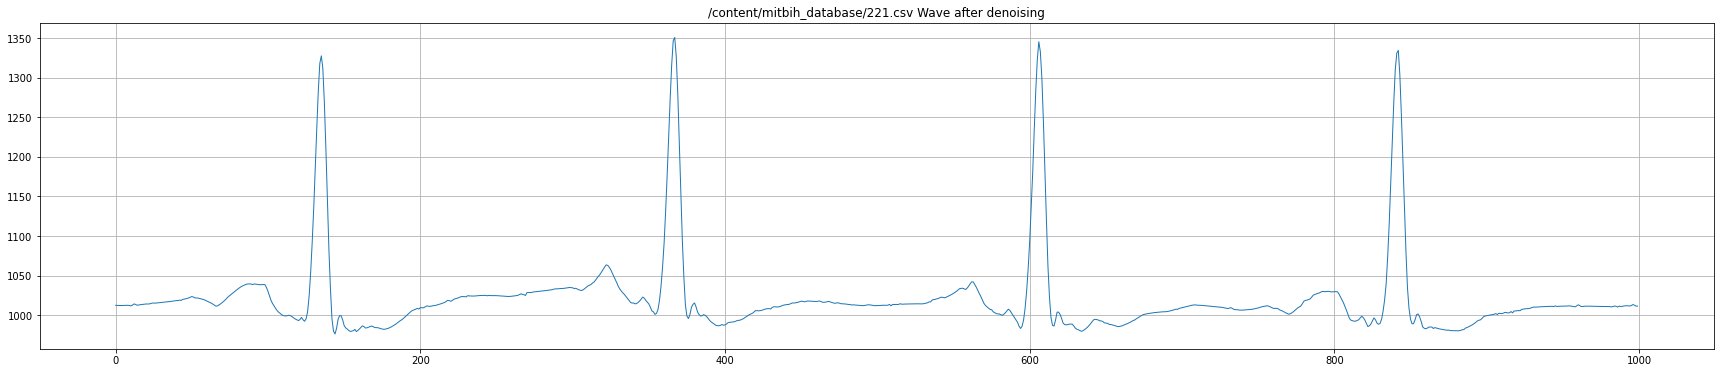

/content/mitbih_database/222.csv


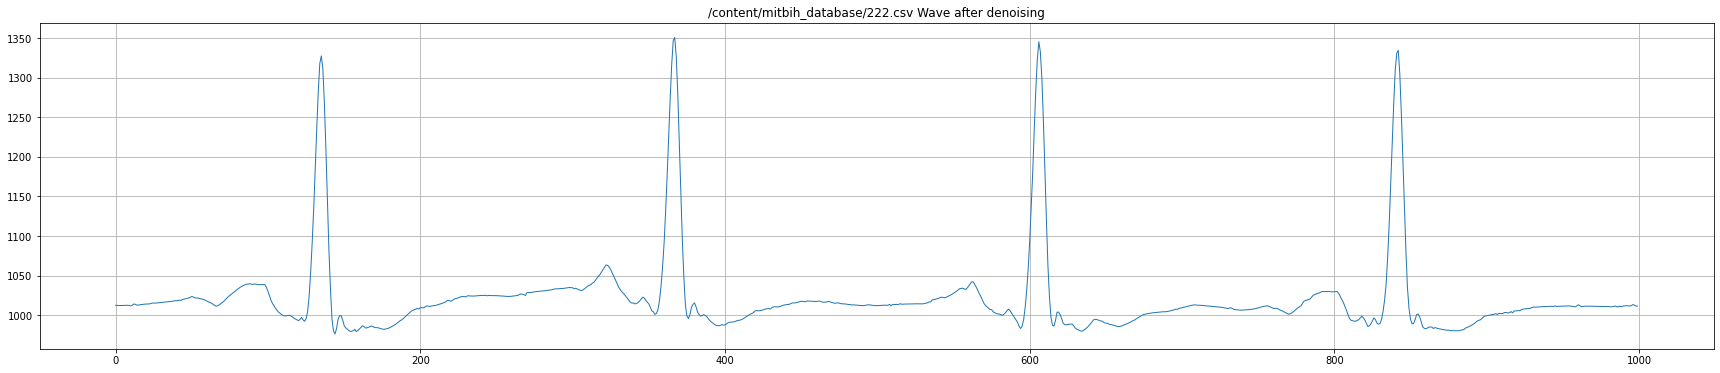

/content/mitbih_database/223.csv


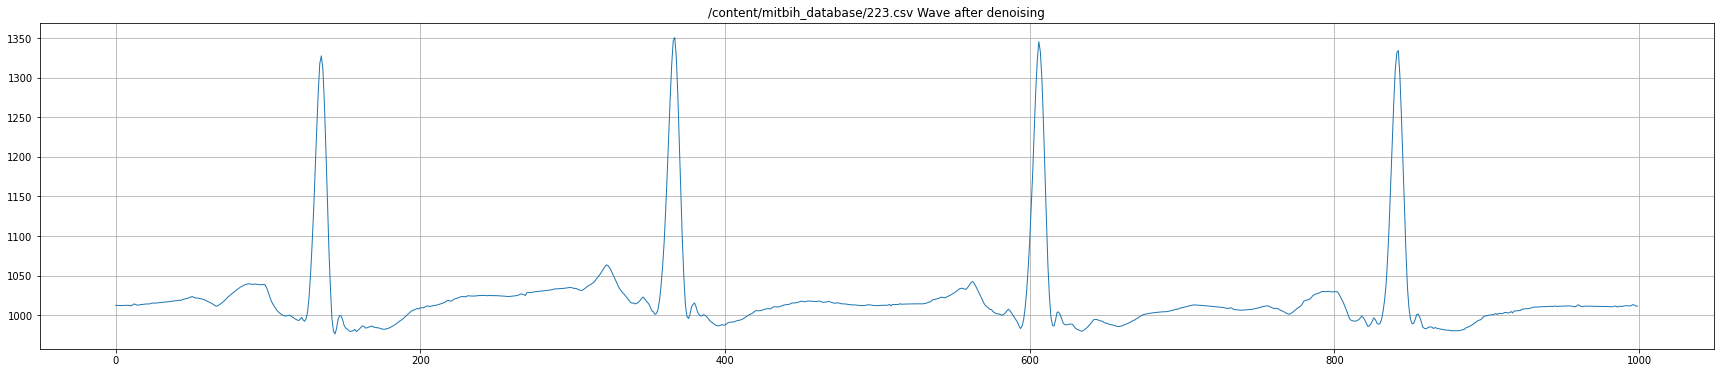

/content/mitbih_database/228.csv


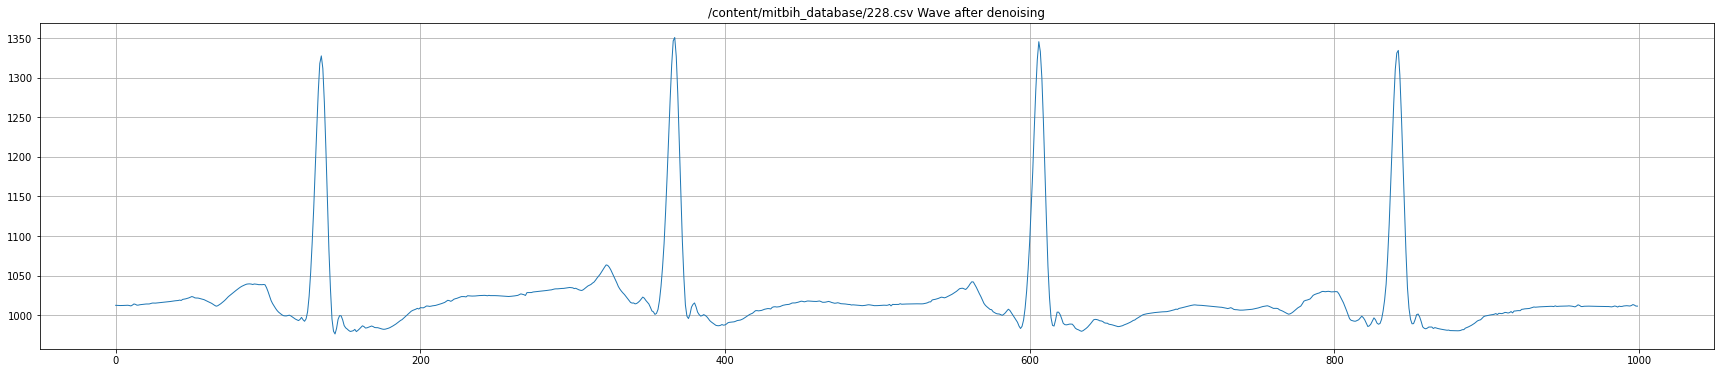

/content/mitbih_database/230.csv


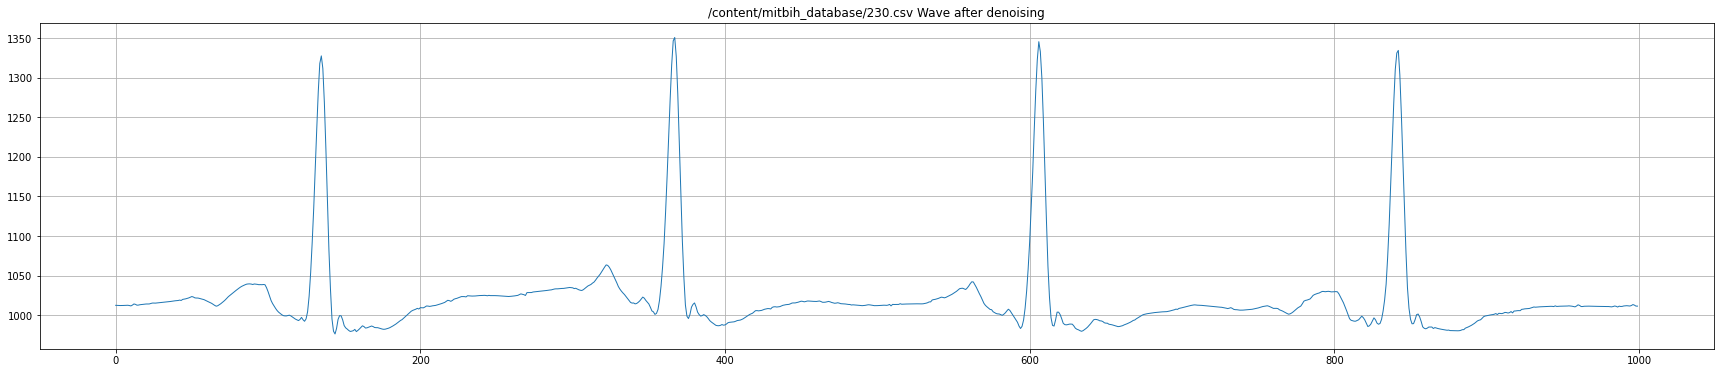

/content/mitbih_database/231.csv


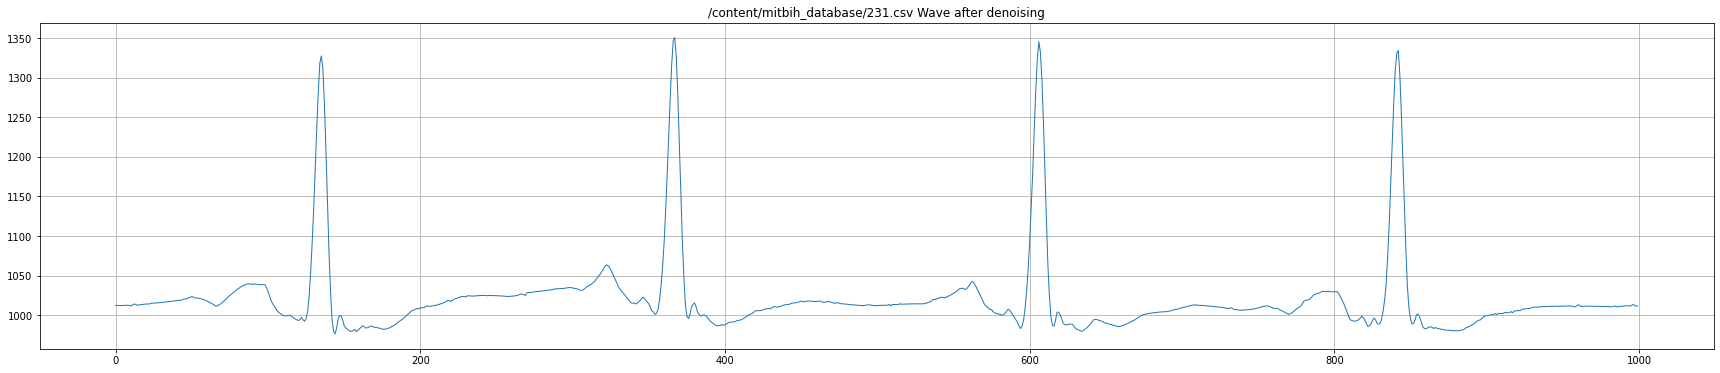

/content/mitbih_database/232.csv


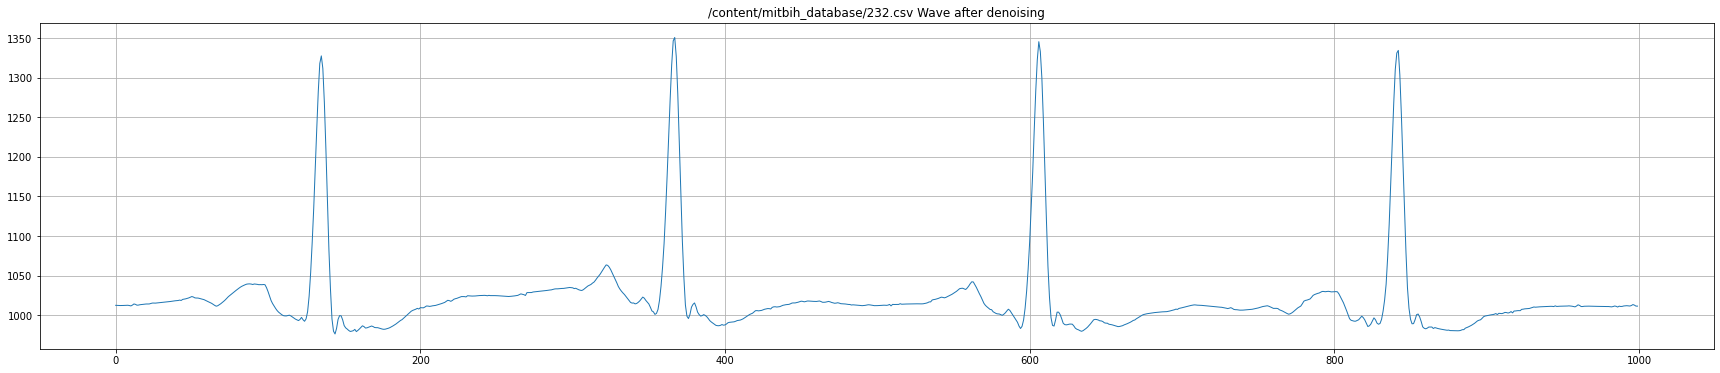

/content/mitbih_database/233.csv


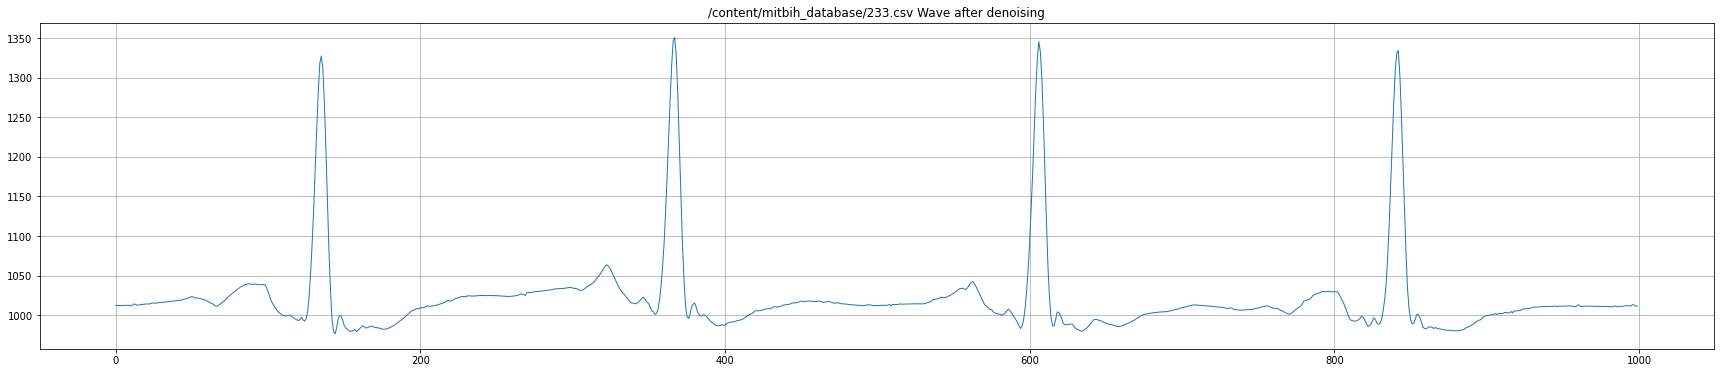

/content/mitbih_database/234.csv


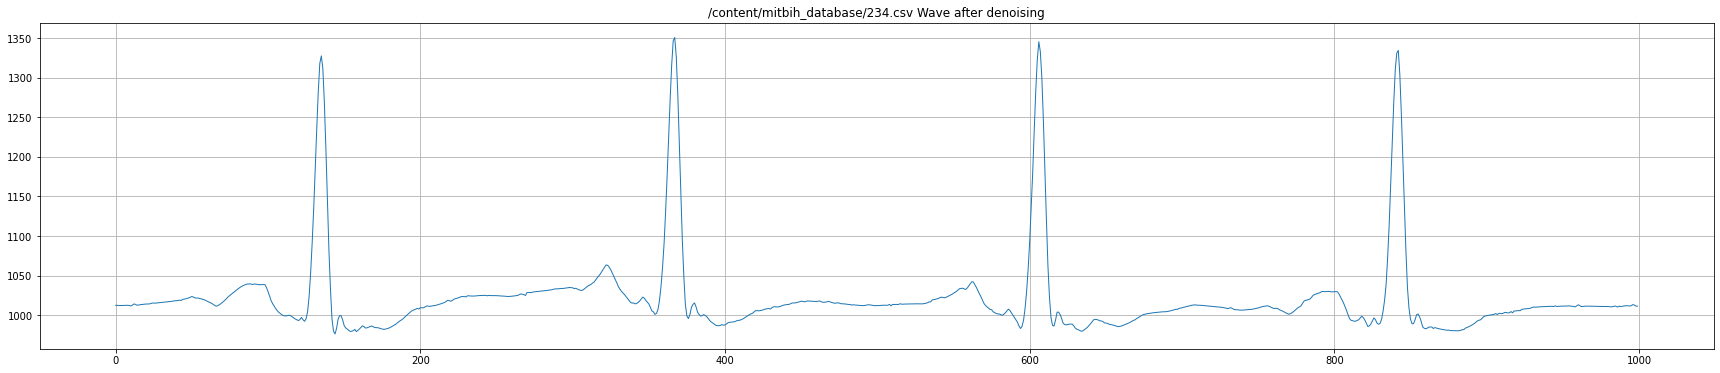

In [ ]:
signals = denoise(signals)
print(len(records))
for r in range(0,len(records)):
  print(records[r])
  plt.title(records[r] + " Wave after denoising")
  plt.plot(signals[0:1000])
  plt.show()

48
/content/mitbih_database/100.csv


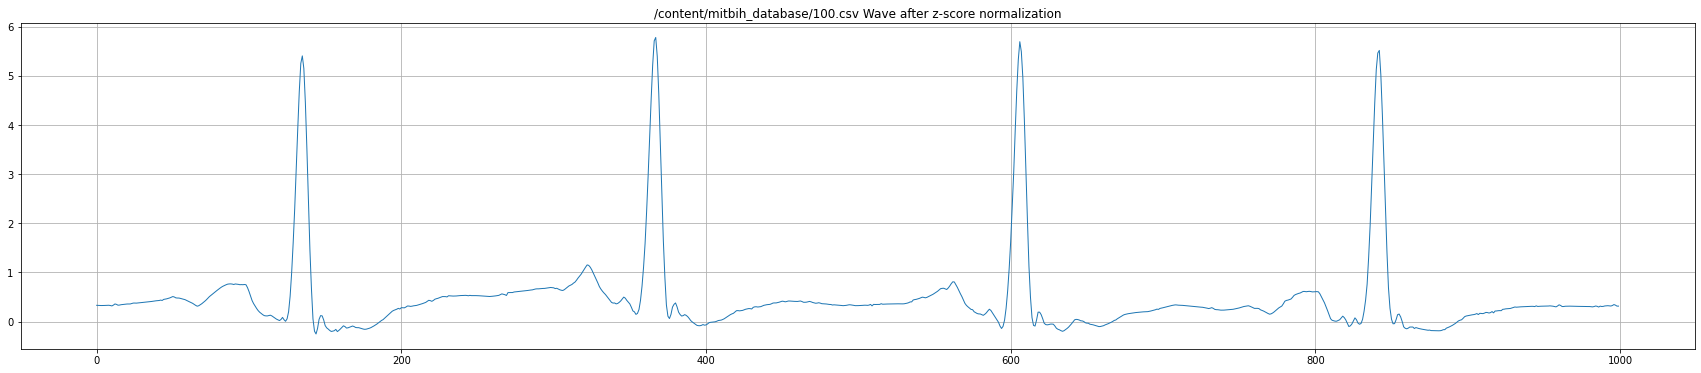

/content/mitbih_database/101.csv


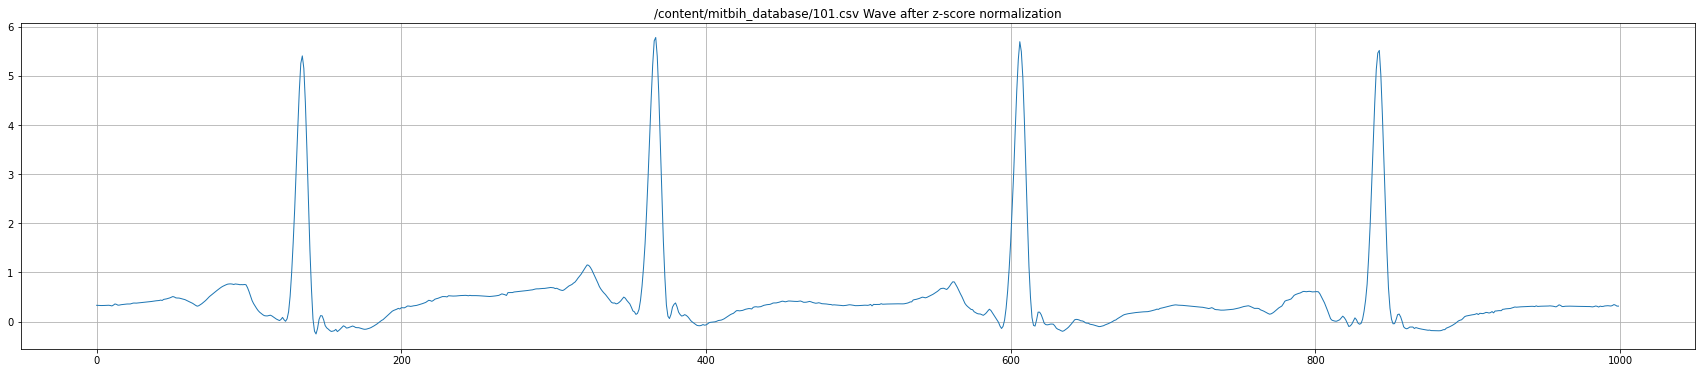

/content/mitbih_database/102.csv


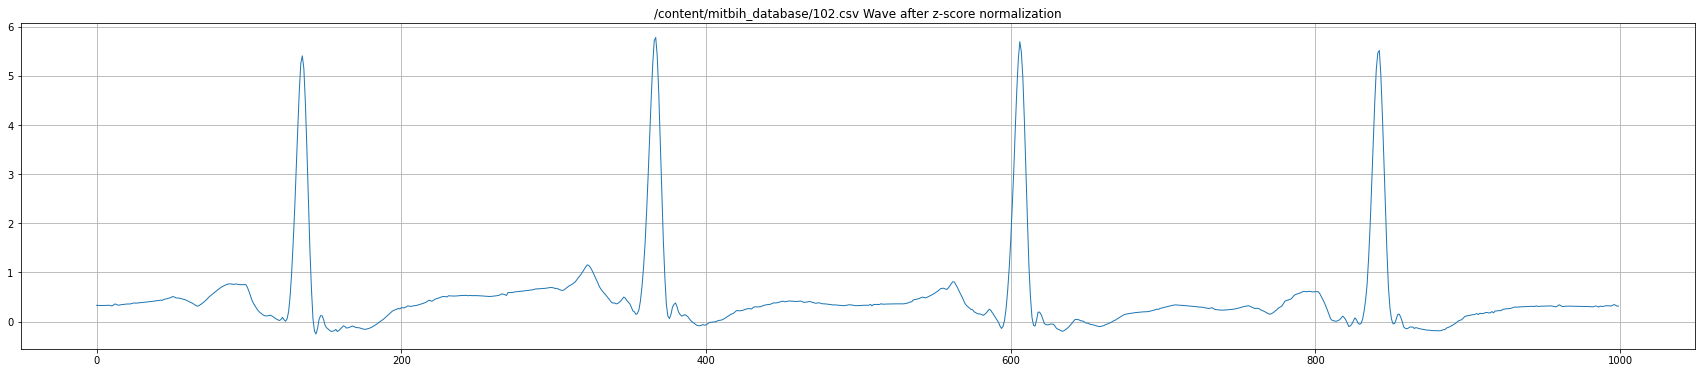

/content/mitbih_database/103.csv


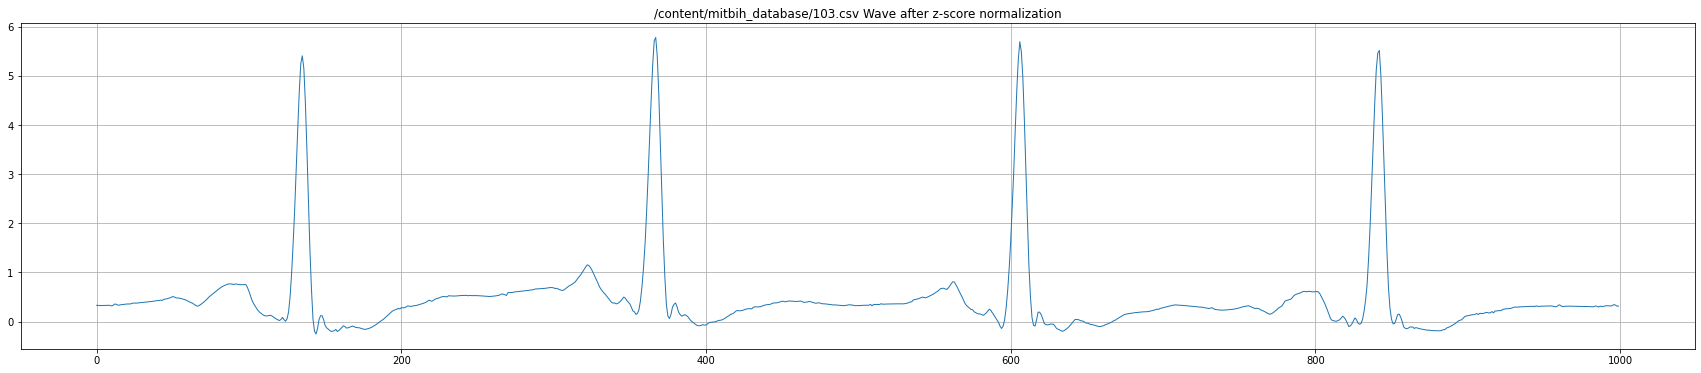

/content/mitbih_database/104.csv


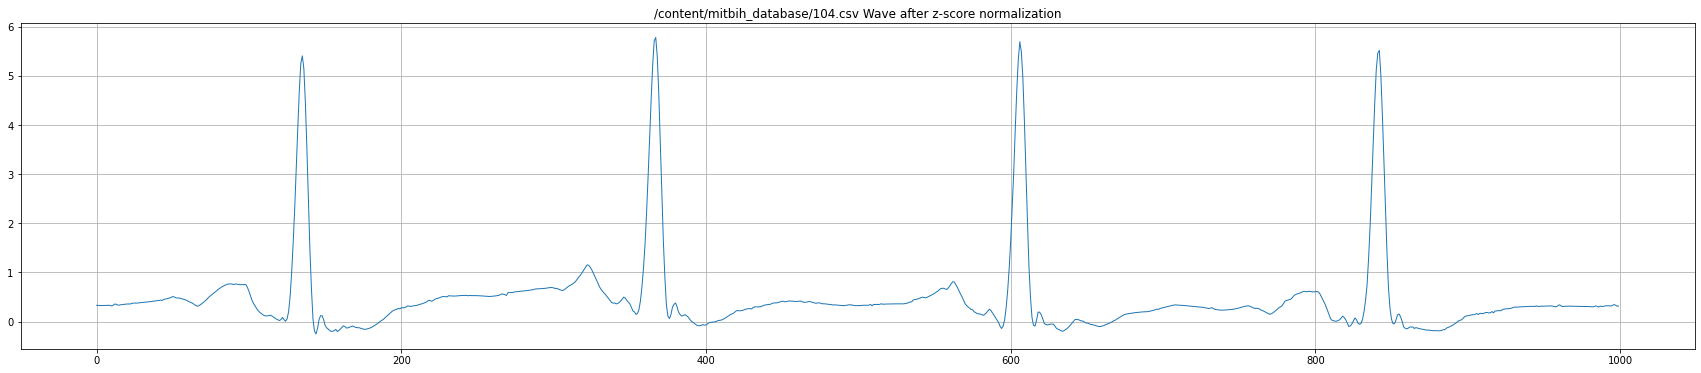

/content/mitbih_database/105.csv


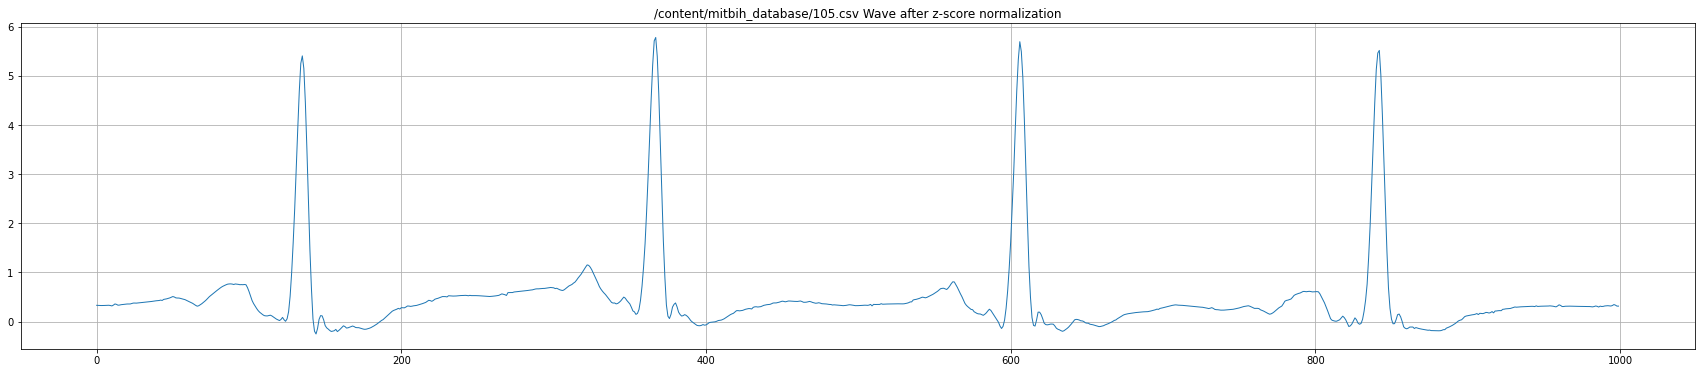

/content/mitbih_database/106.csv


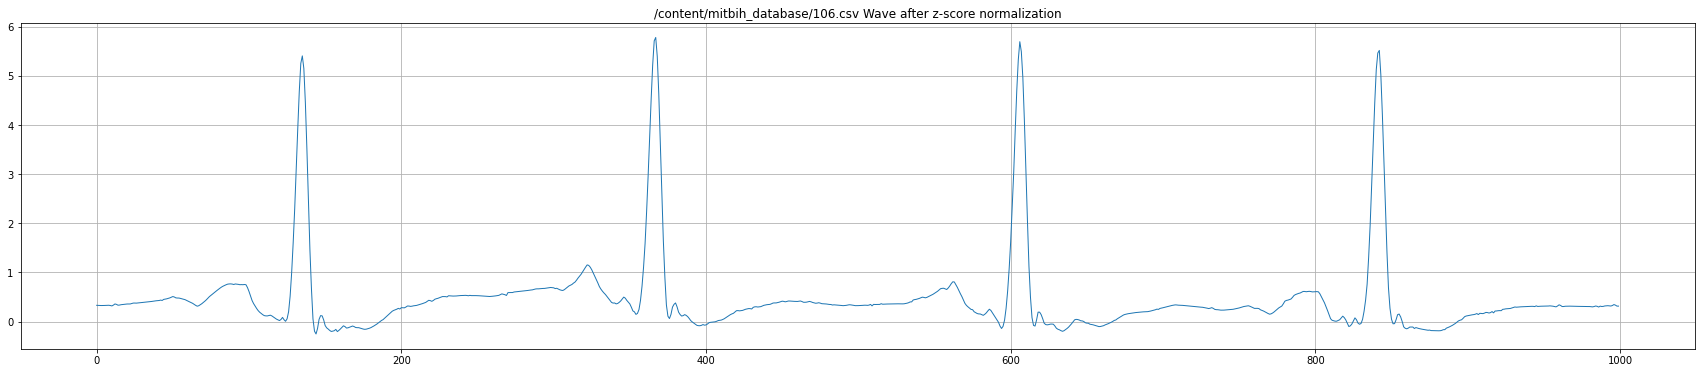

/content/mitbih_database/107.csv


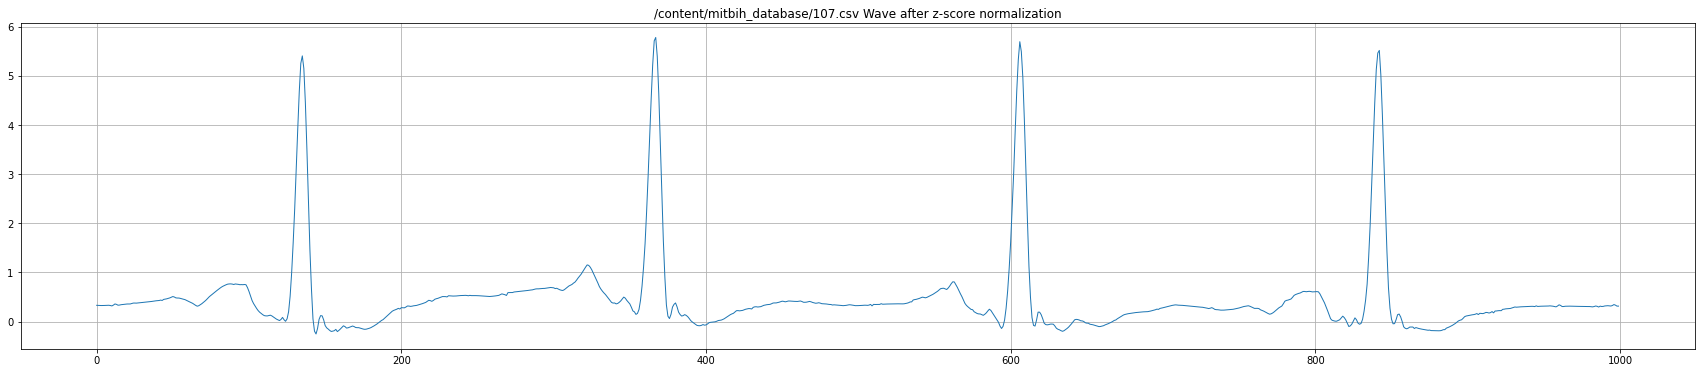

/content/mitbih_database/108.csv


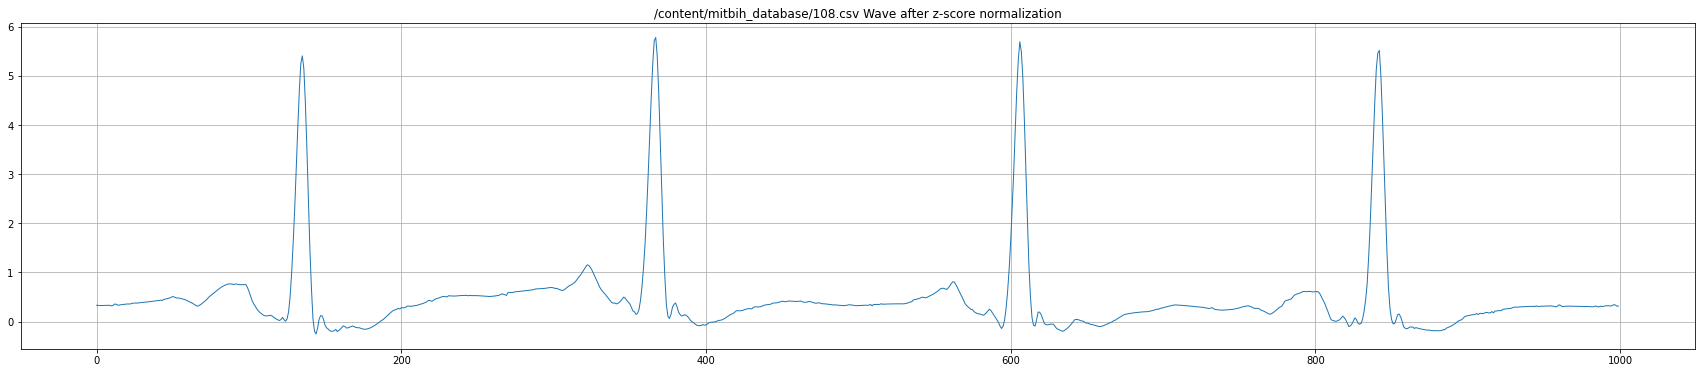

/content/mitbih_database/109.csv


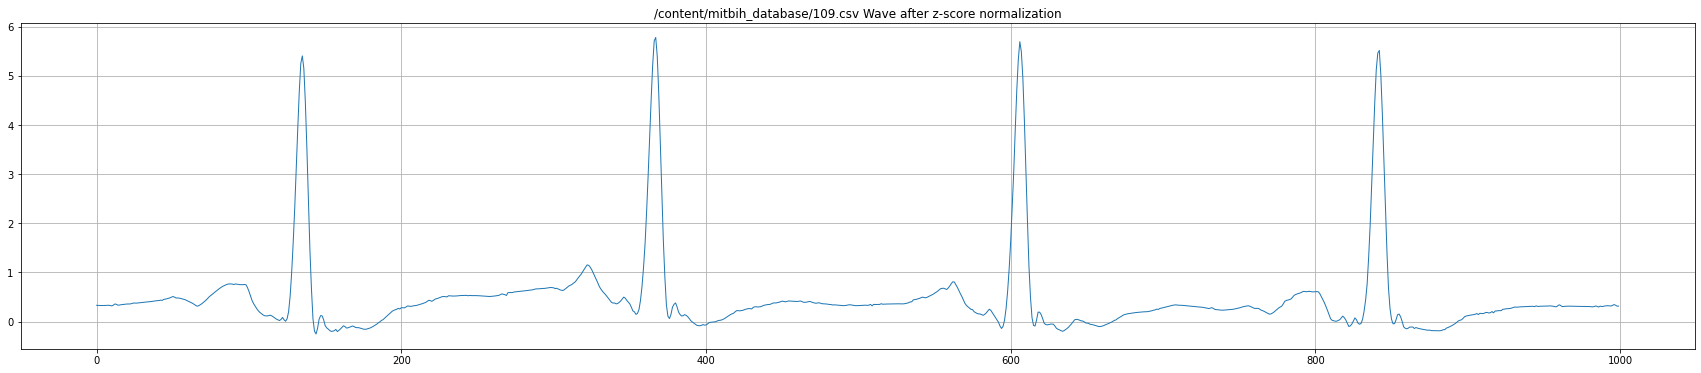

/content/mitbih_database/111.csv


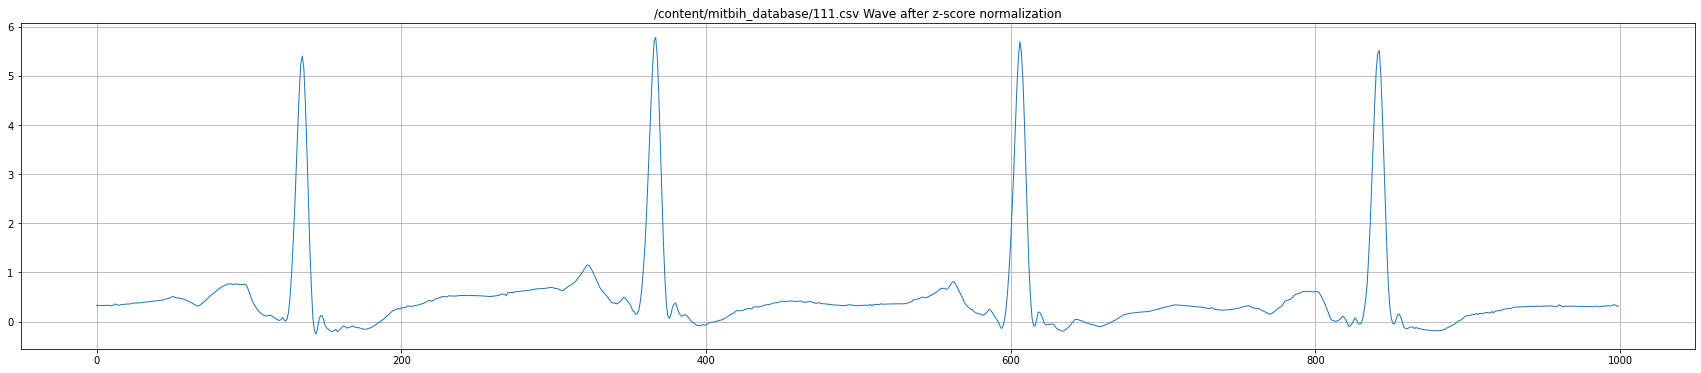

/content/mitbih_database/112.csv


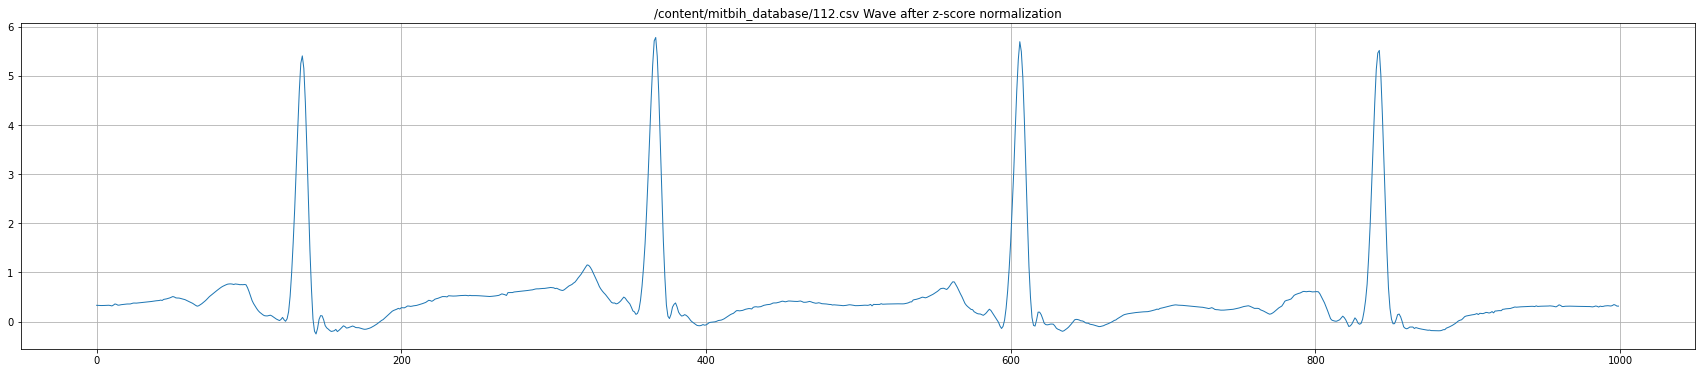

/content/mitbih_database/113.csv


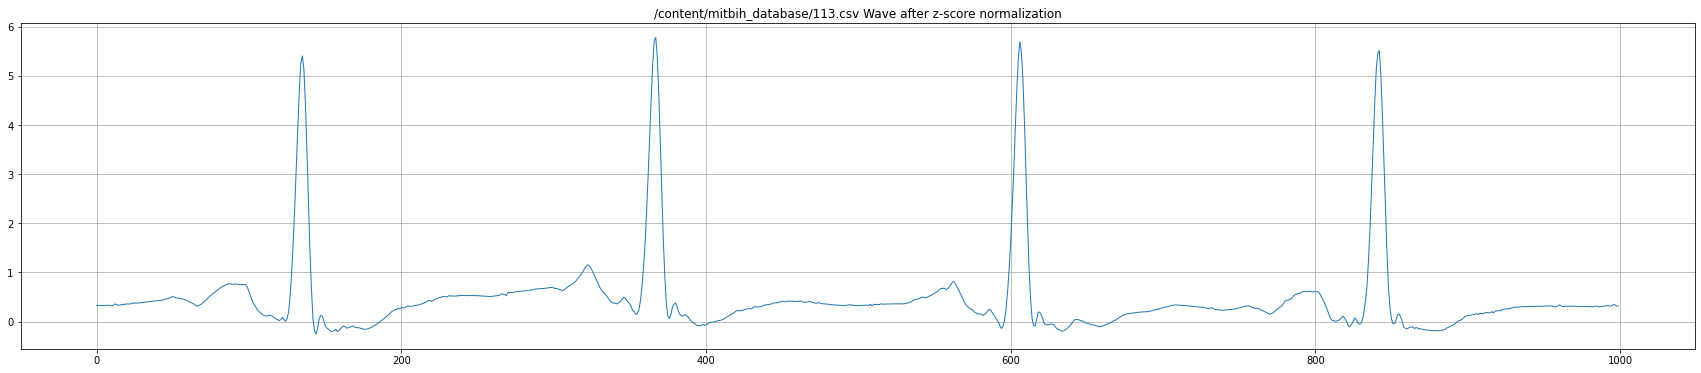

/content/mitbih_database/114.csv


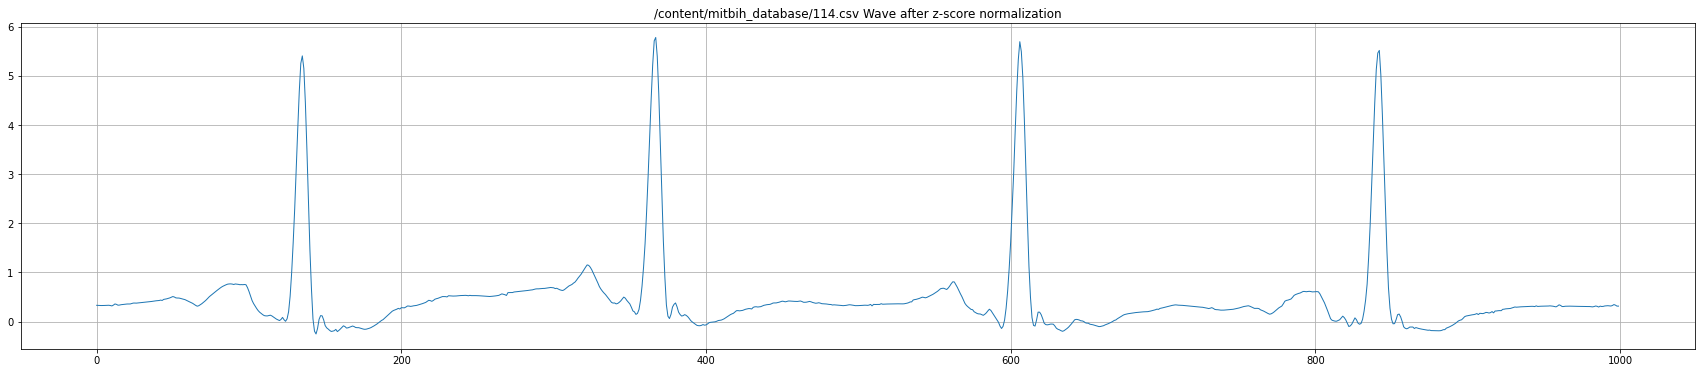

/content/mitbih_database/115.csv


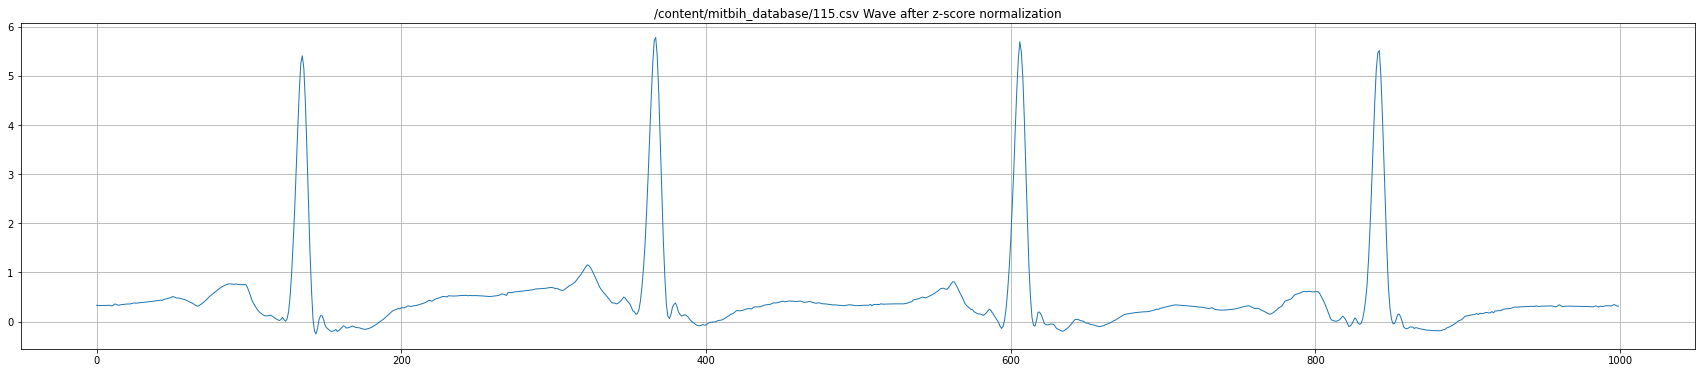

/content/mitbih_database/116.csv


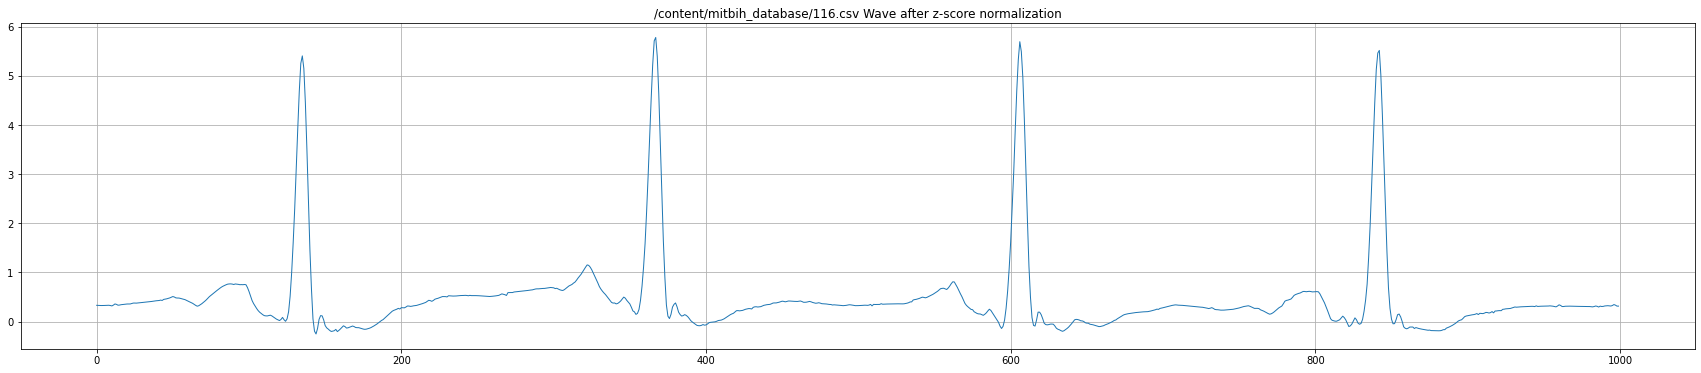

/content/mitbih_database/117.csv


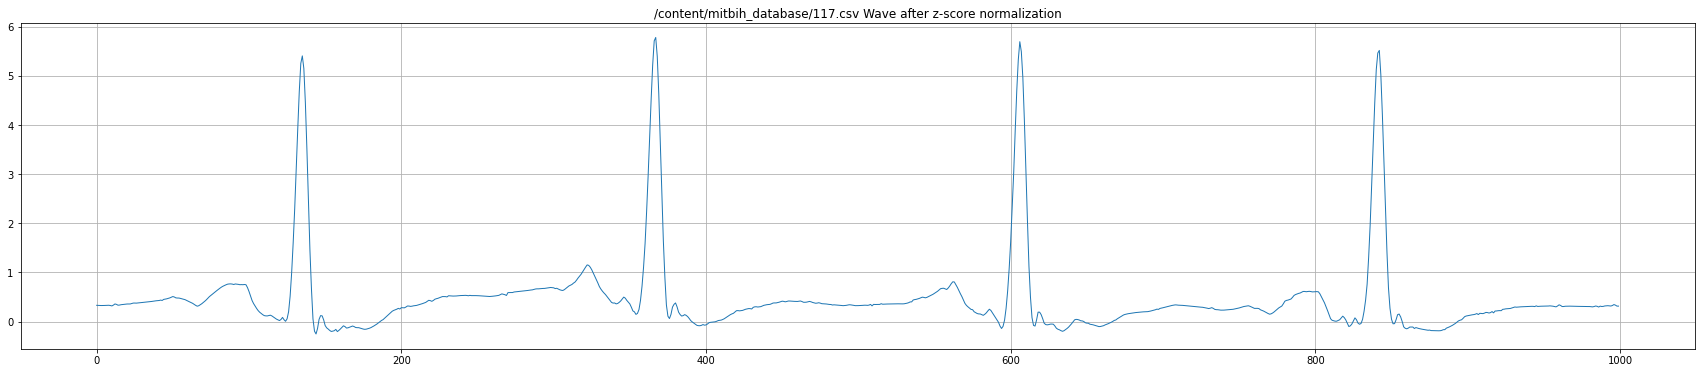

/content/mitbih_database/118.csv


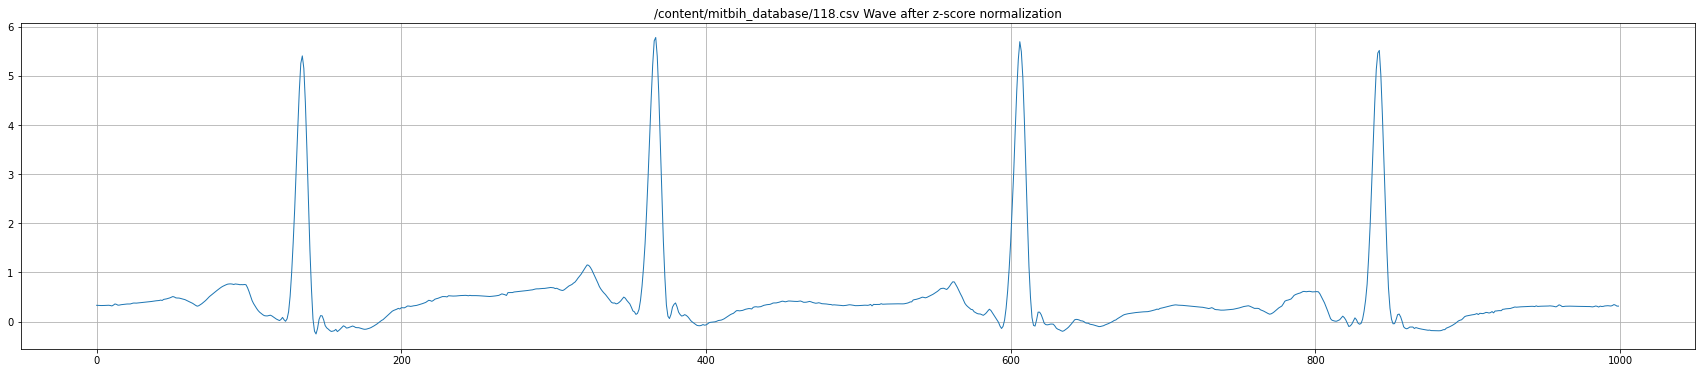

/content/mitbih_database/119.csv


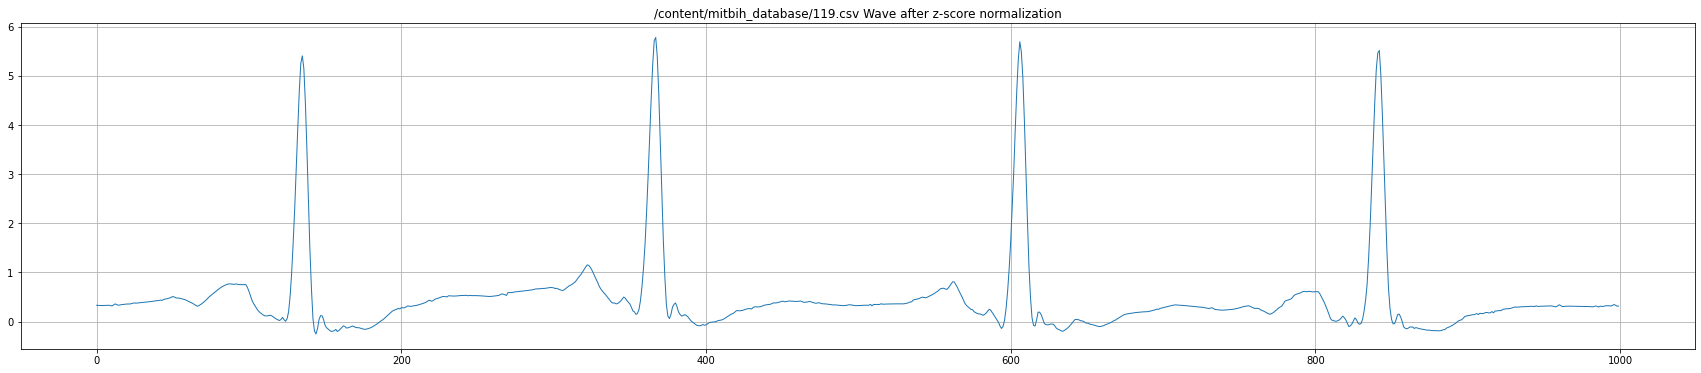

/content/mitbih_database/121.csv


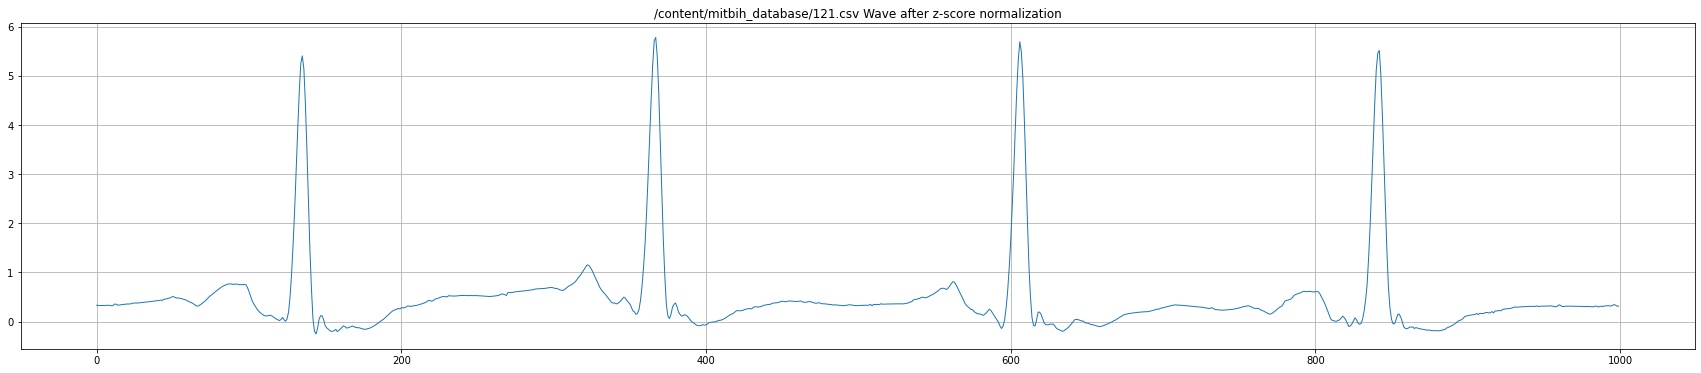

/content/mitbih_database/122.csv


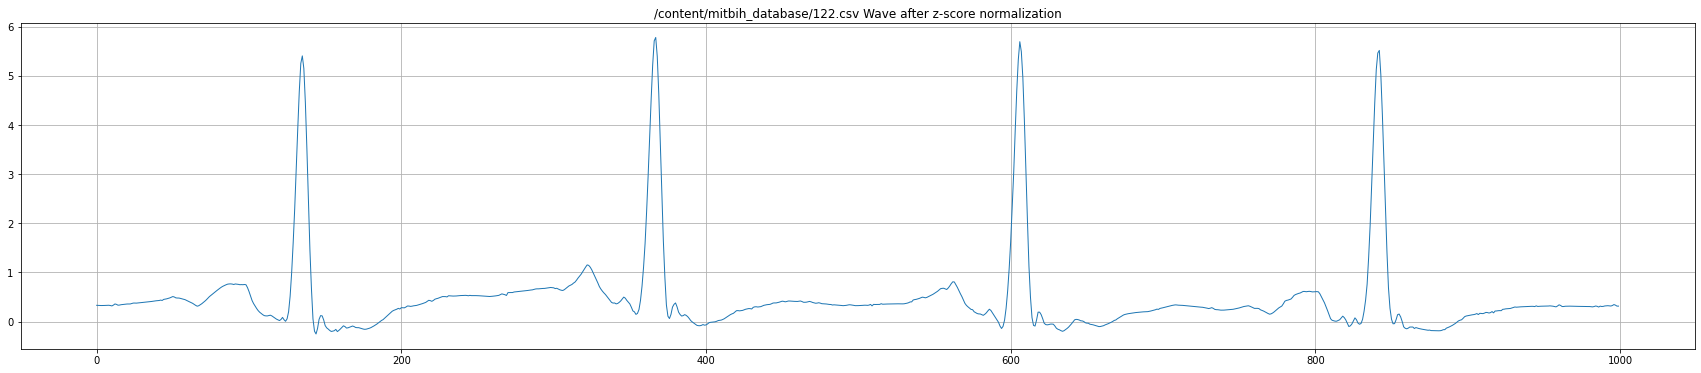

/content/mitbih_database/123.csv


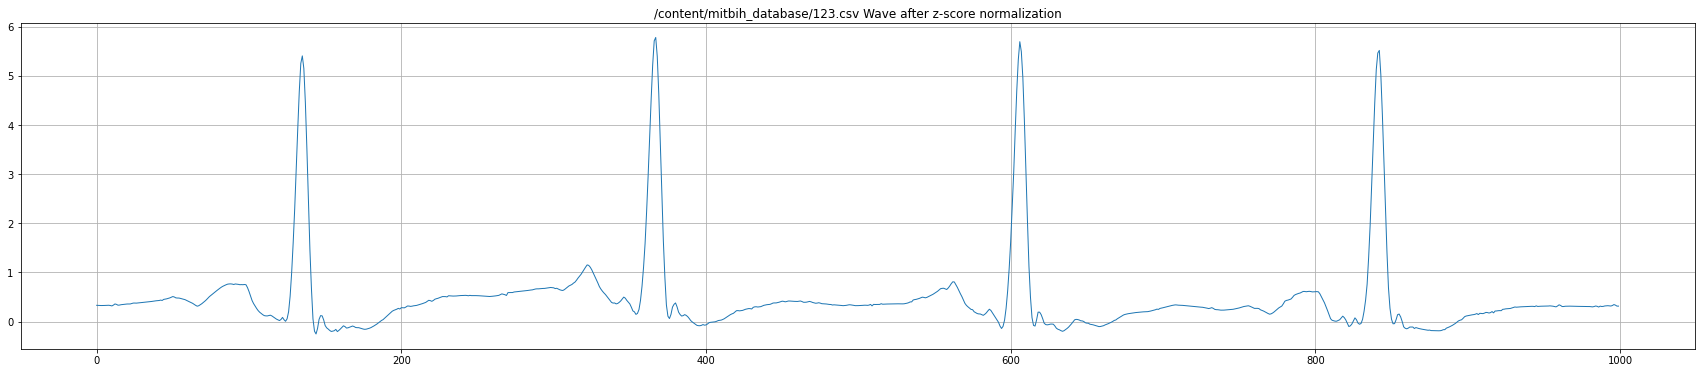

/content/mitbih_database/124.csv


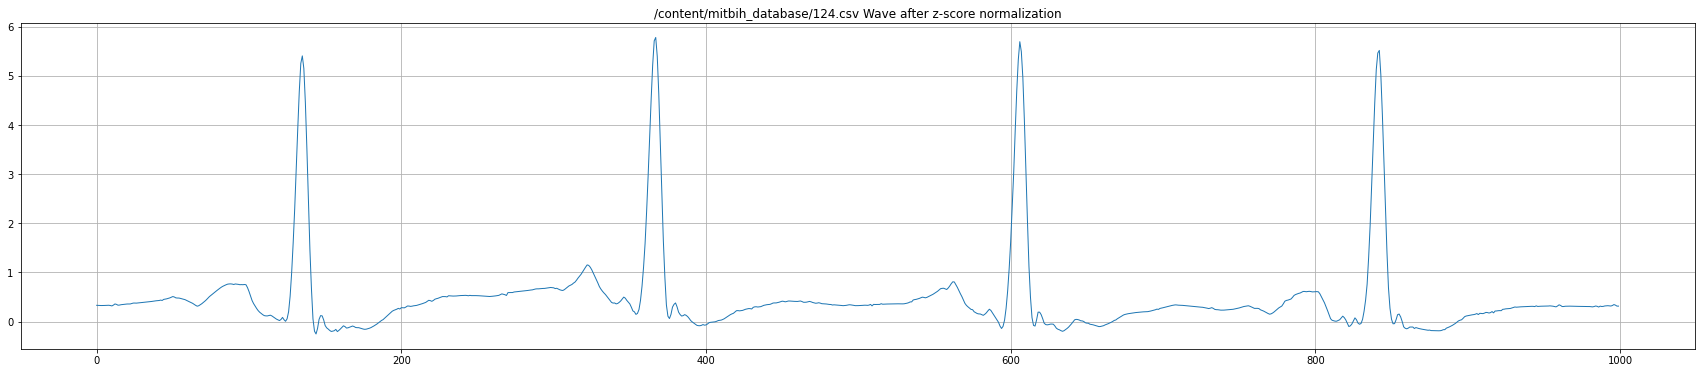

/content/mitbih_database/200.csv


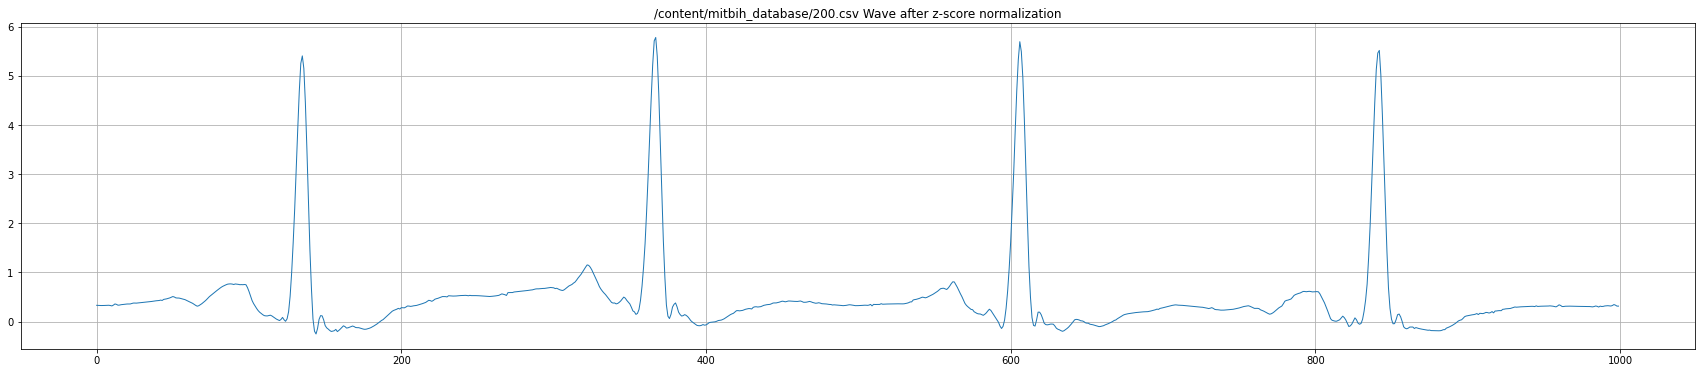

/content/mitbih_database/201.csv


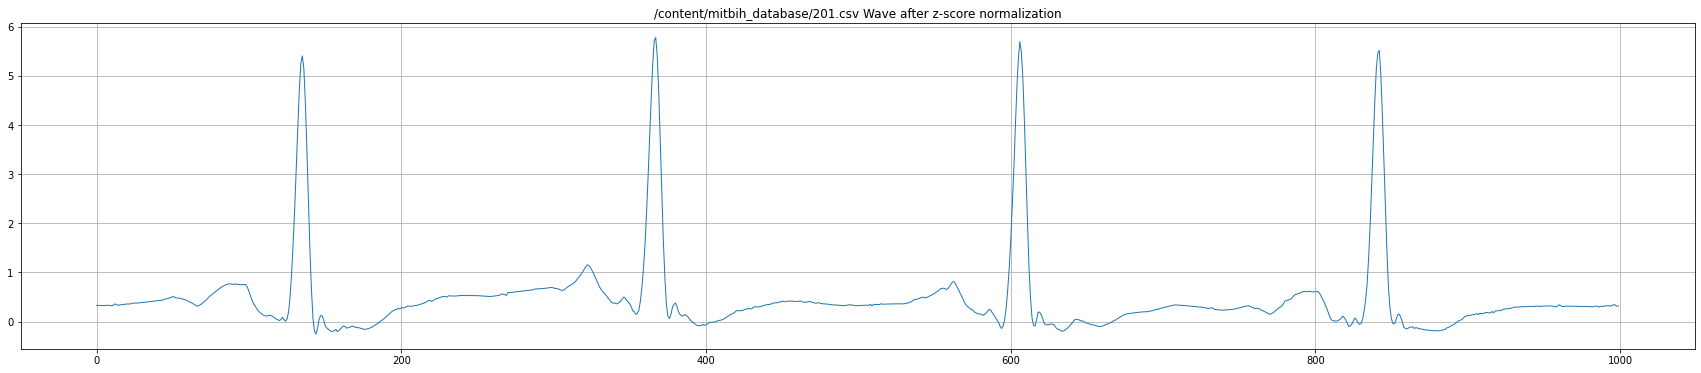

/content/mitbih_database/202.csv


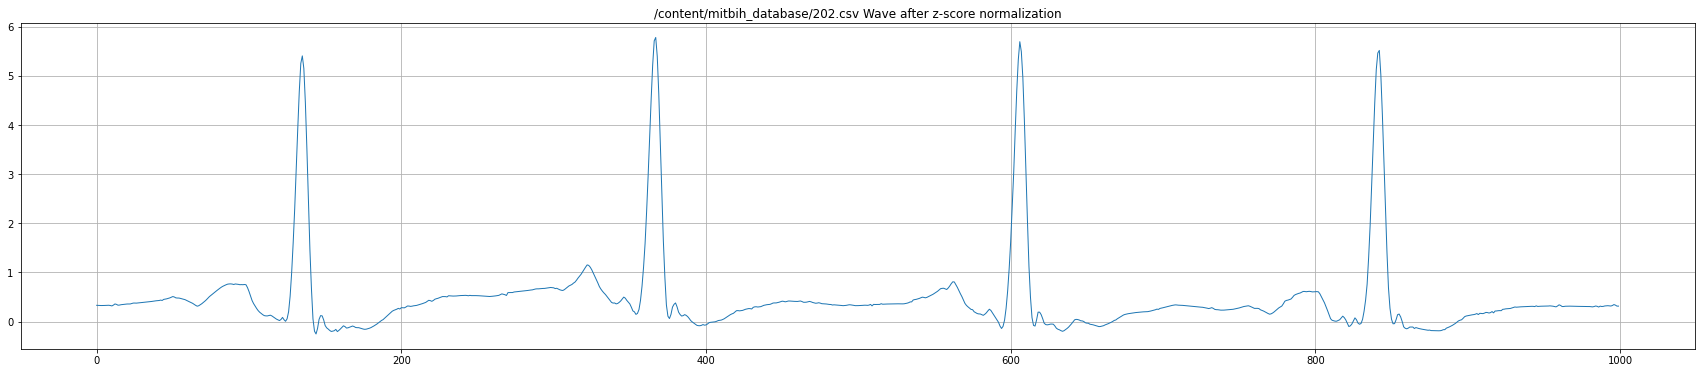

/content/mitbih_database/203.csv


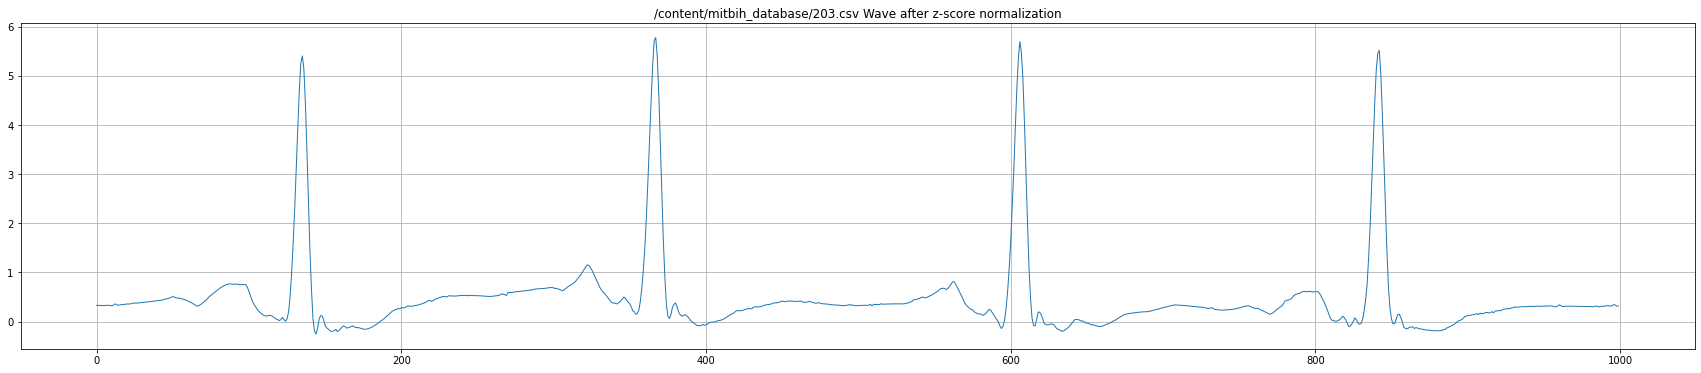

/content/mitbih_database/205.csv


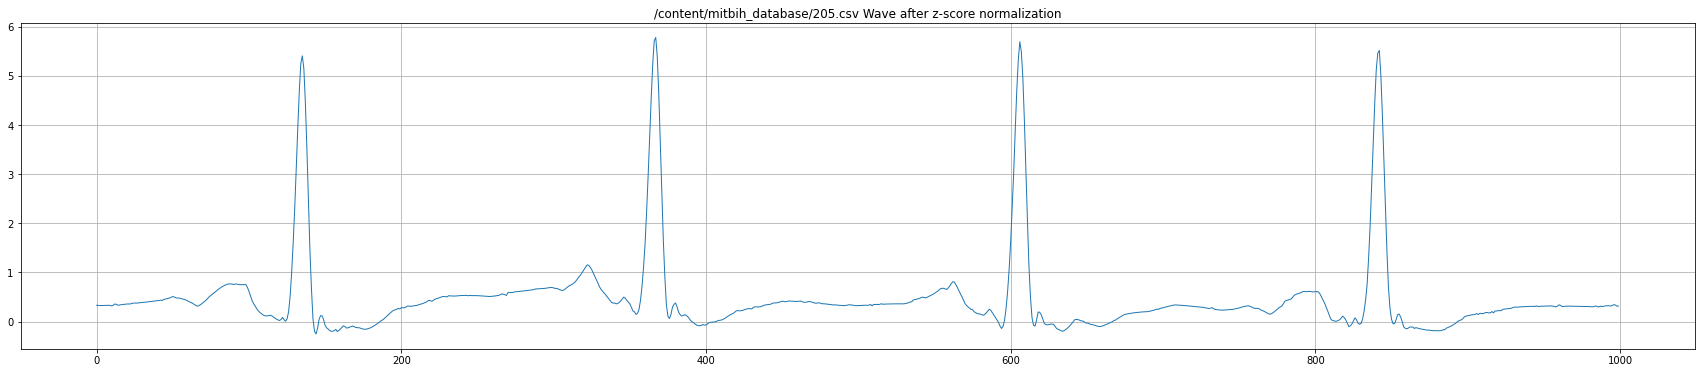

/content/mitbih_database/207.csv


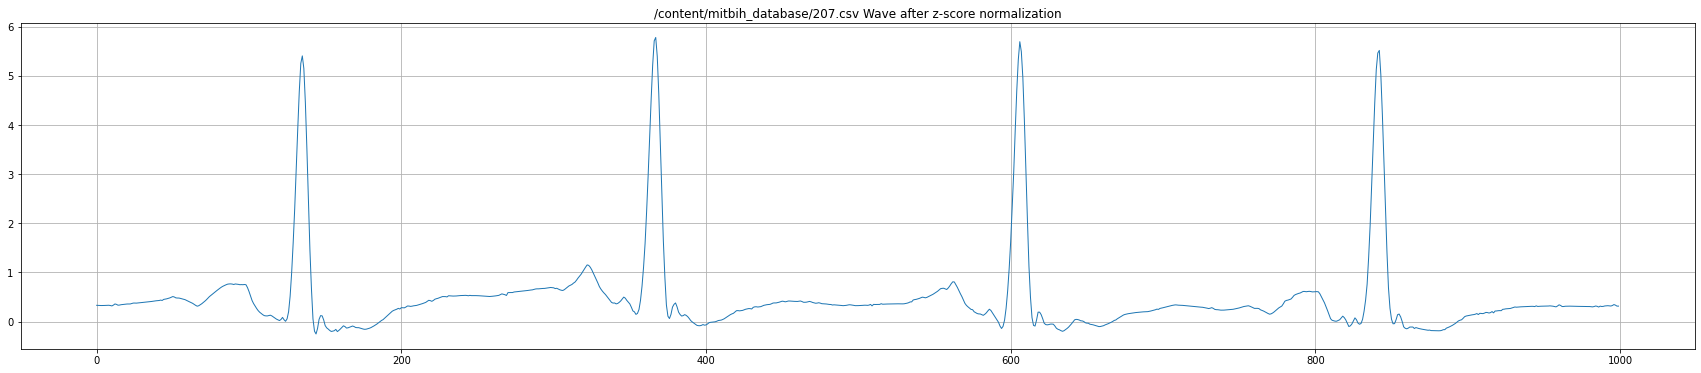

/content/mitbih_database/208.csv


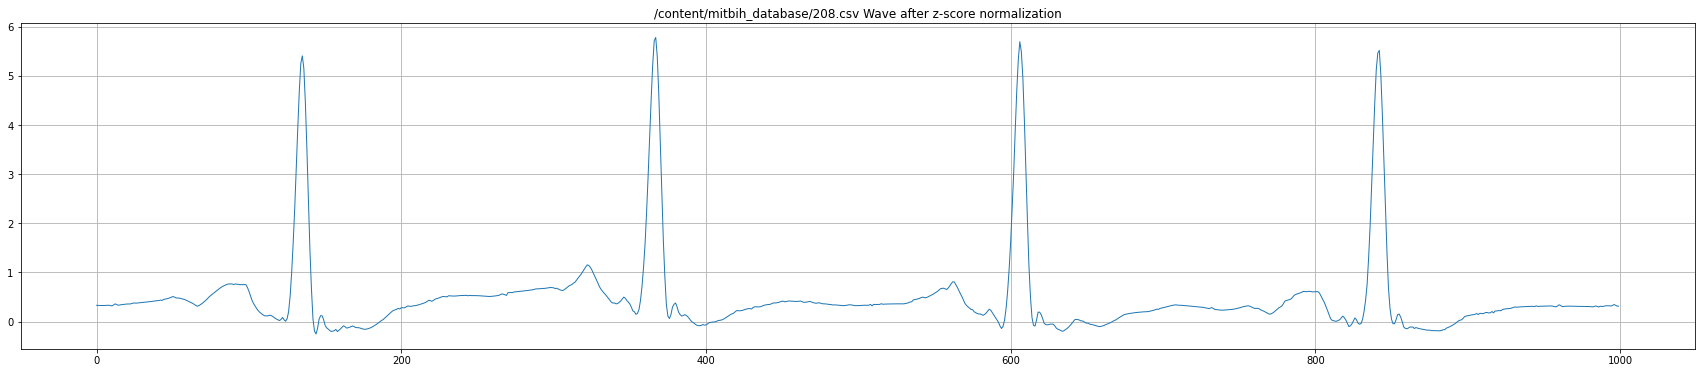

/content/mitbih_database/209.csv


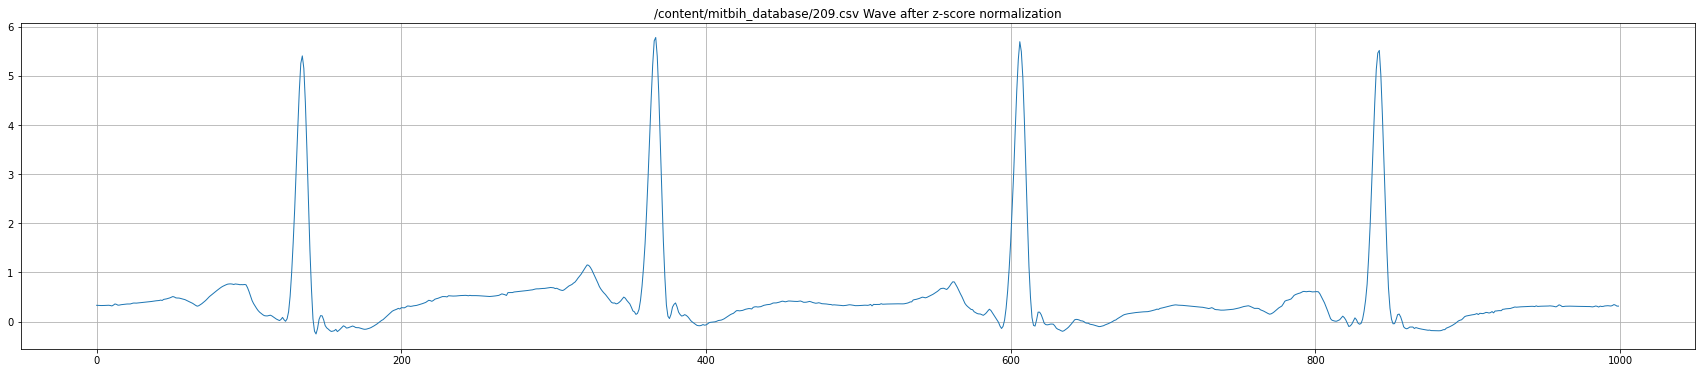

/content/mitbih_database/210.csv


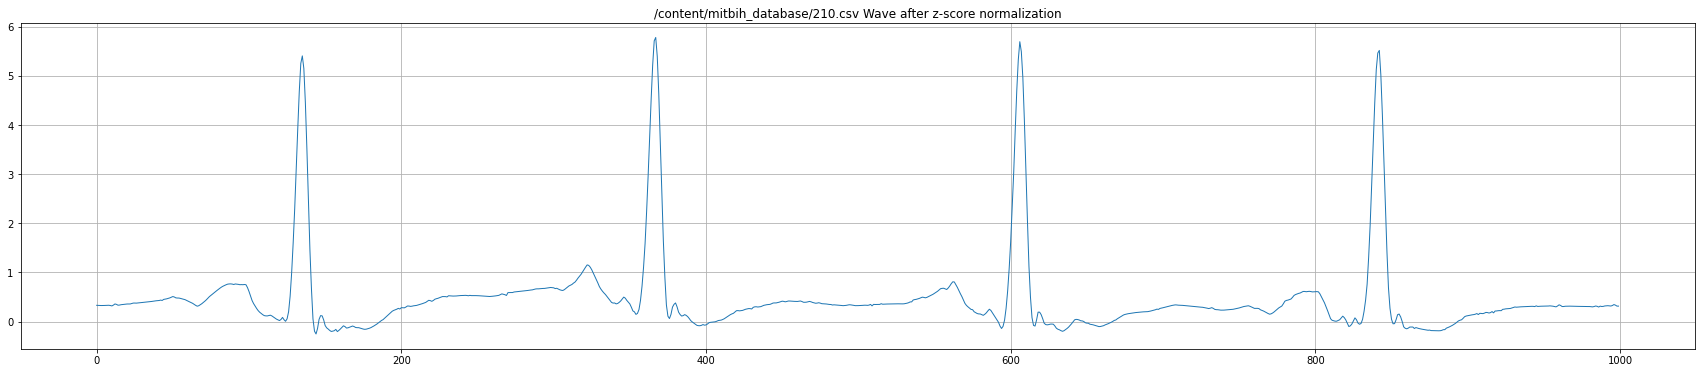

/content/mitbih_database/212.csv


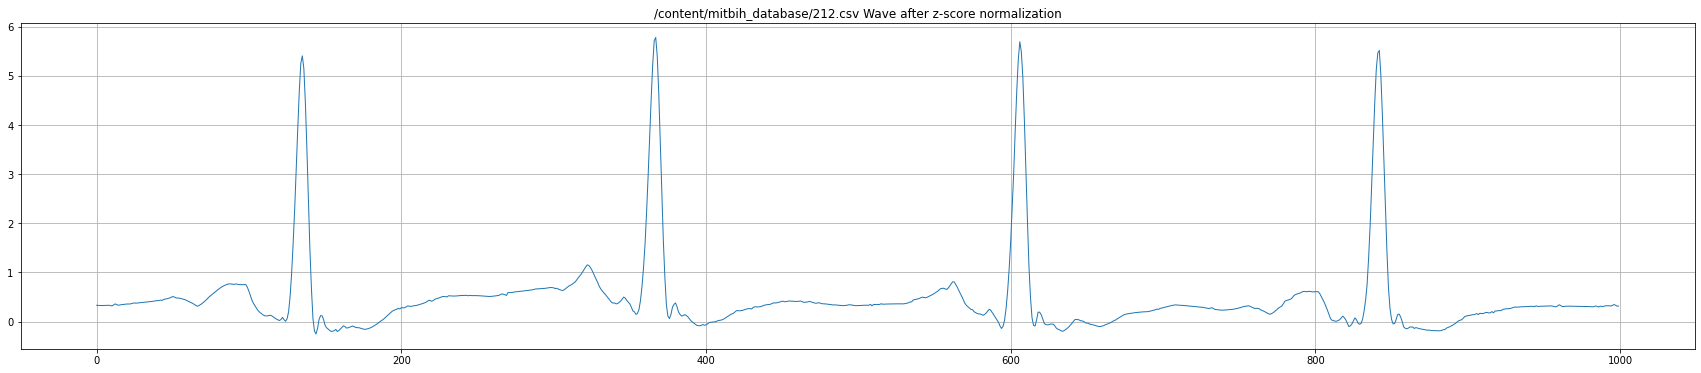

/content/mitbih_database/213.csv


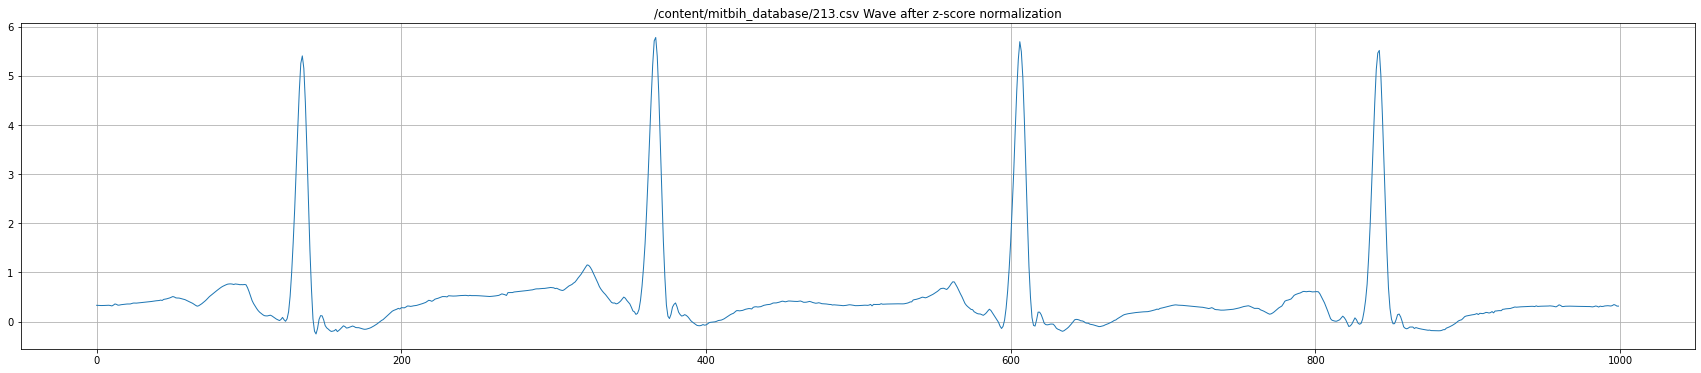

/content/mitbih_database/214.csv


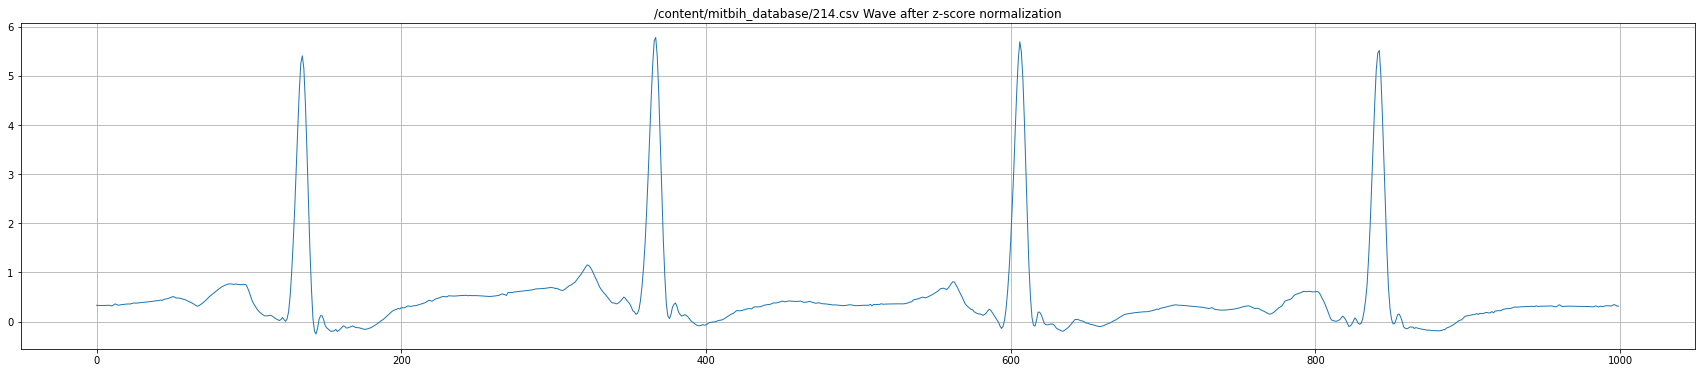

/content/mitbih_database/215.csv


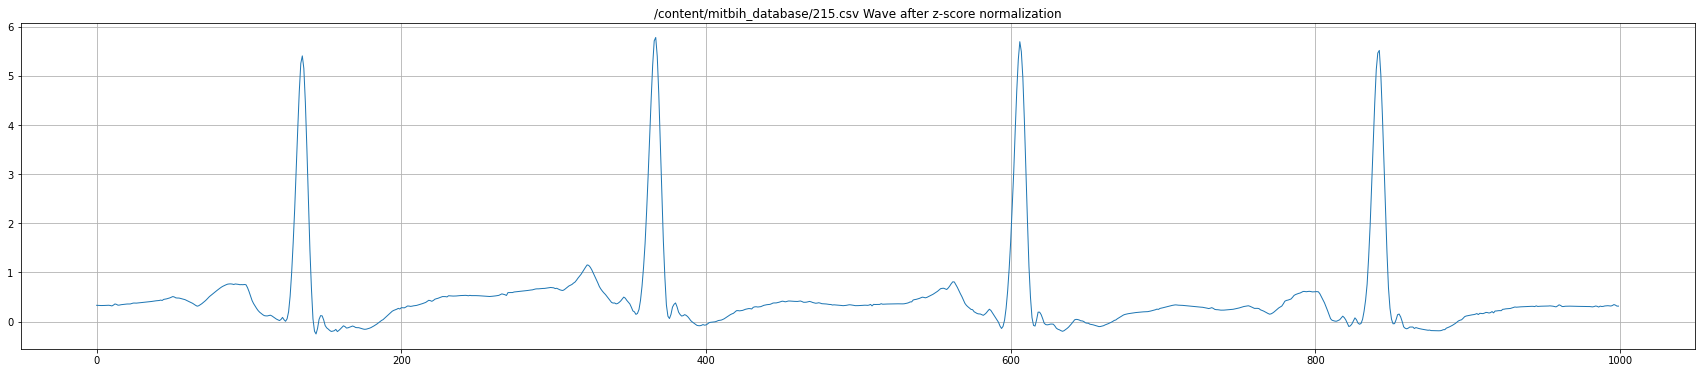

/content/mitbih_database/217.csv


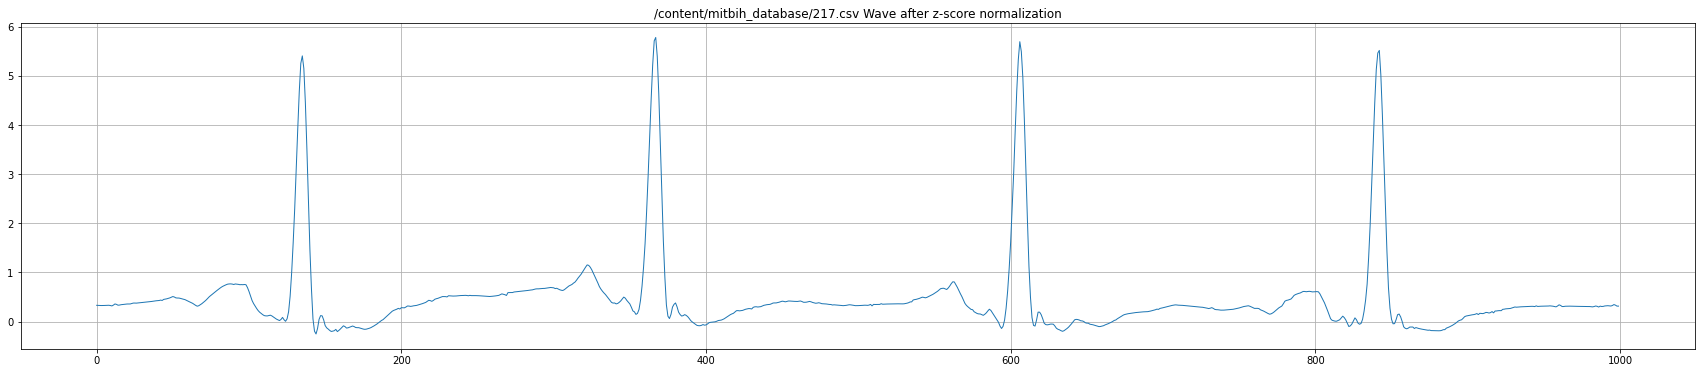

/content/mitbih_database/219.csv


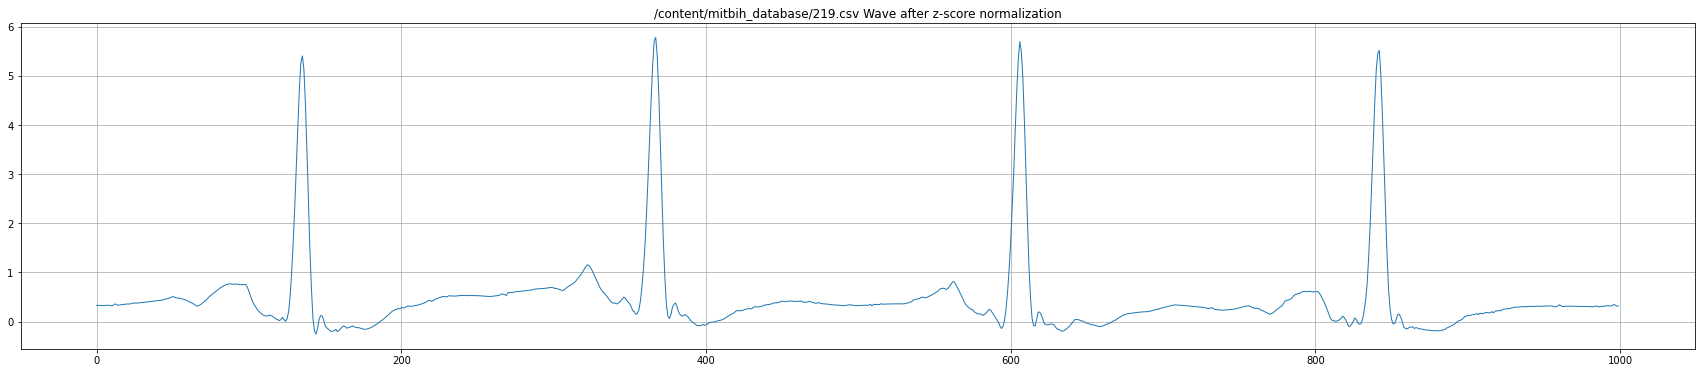

/content/mitbih_database/220.csv


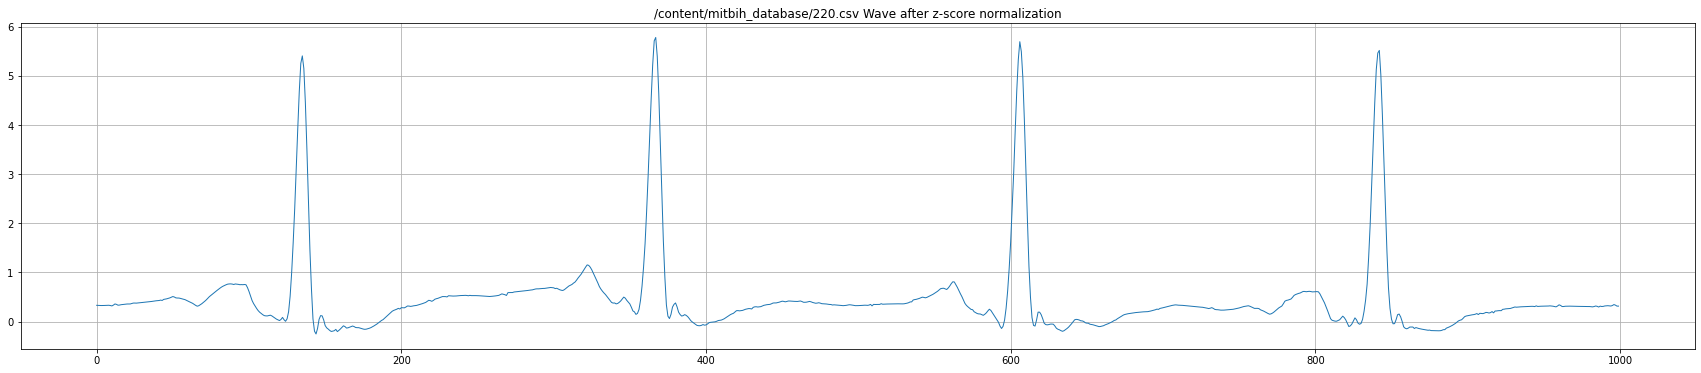

/content/mitbih_database/221.csv


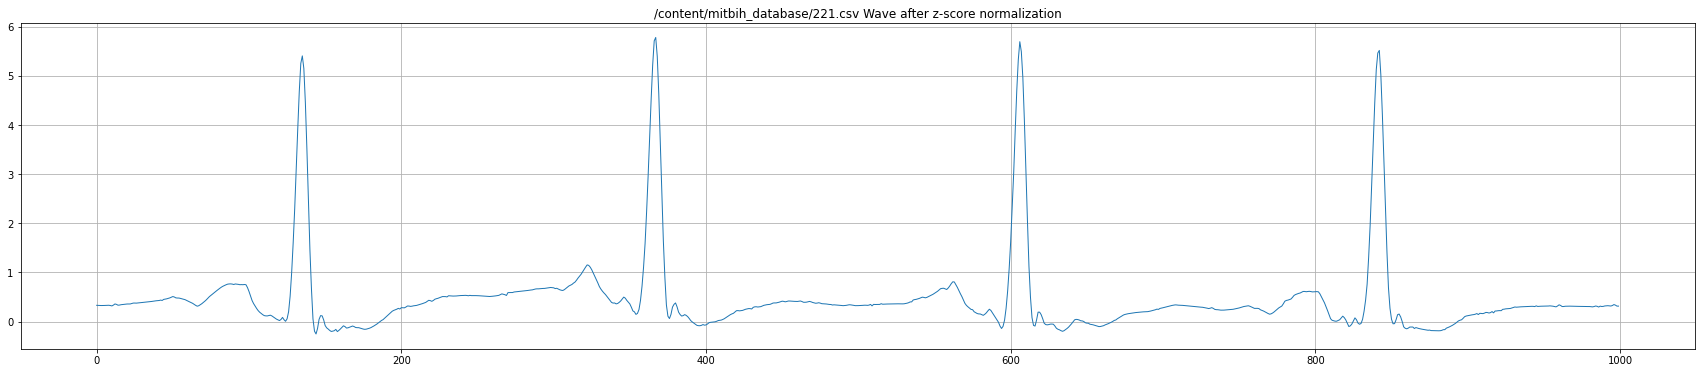

/content/mitbih_database/222.csv


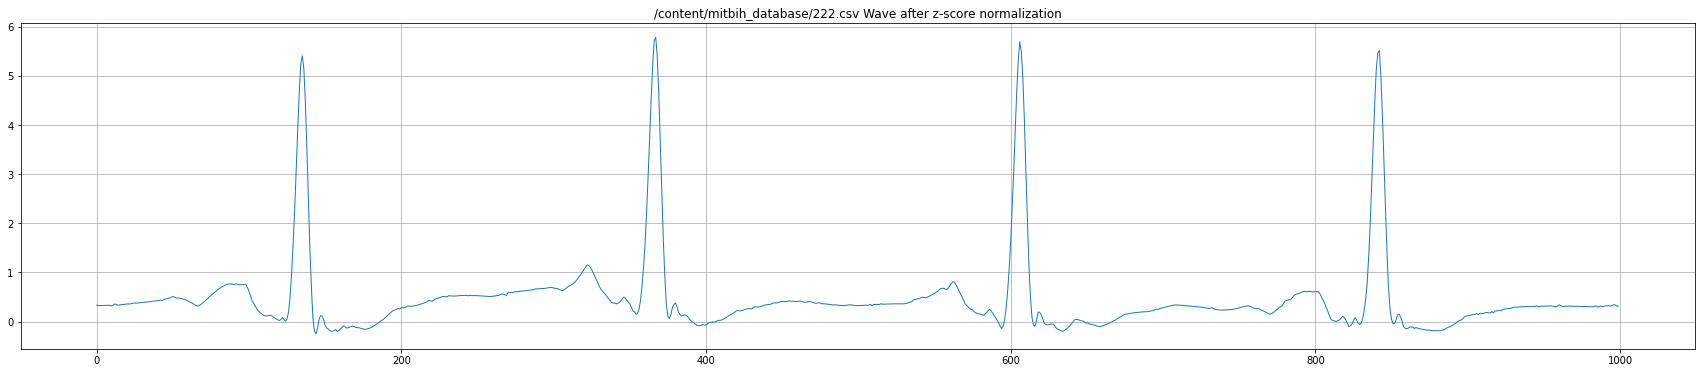

/content/mitbih_database/223.csv


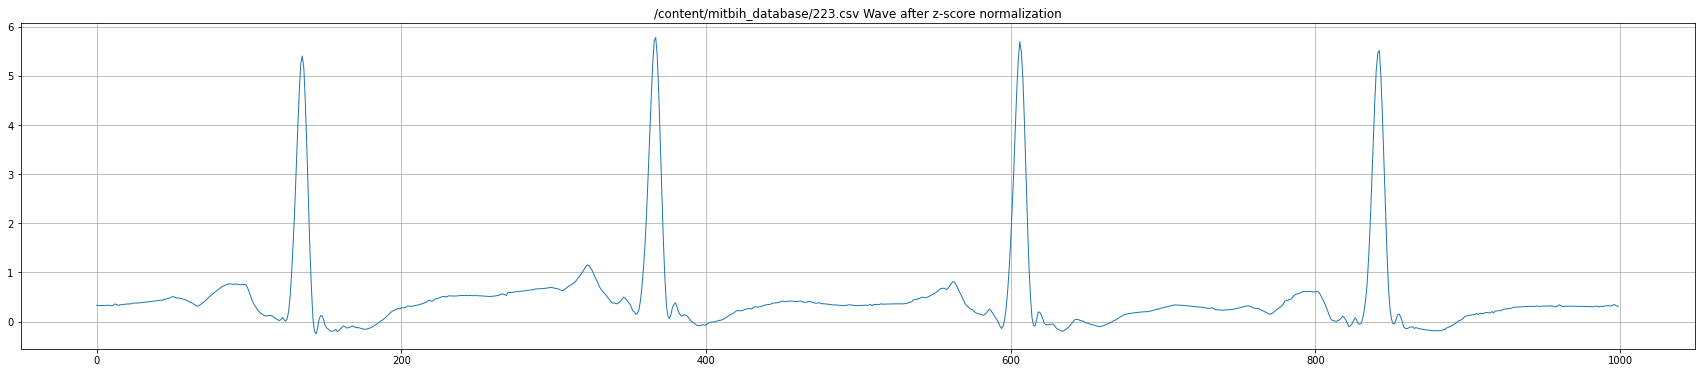

/content/mitbih_database/228.csv


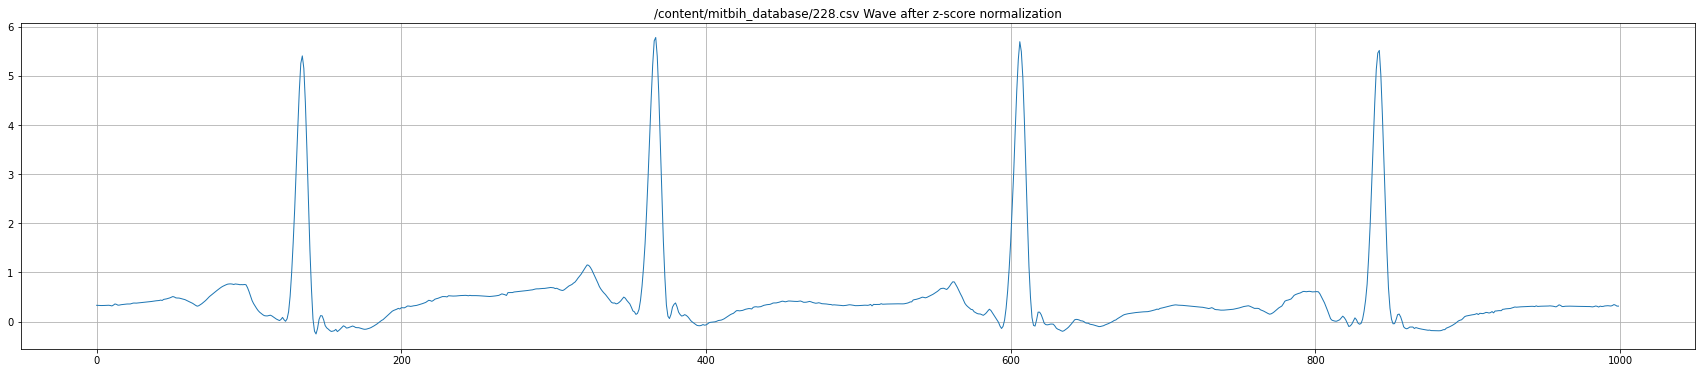

/content/mitbih_database/230.csv


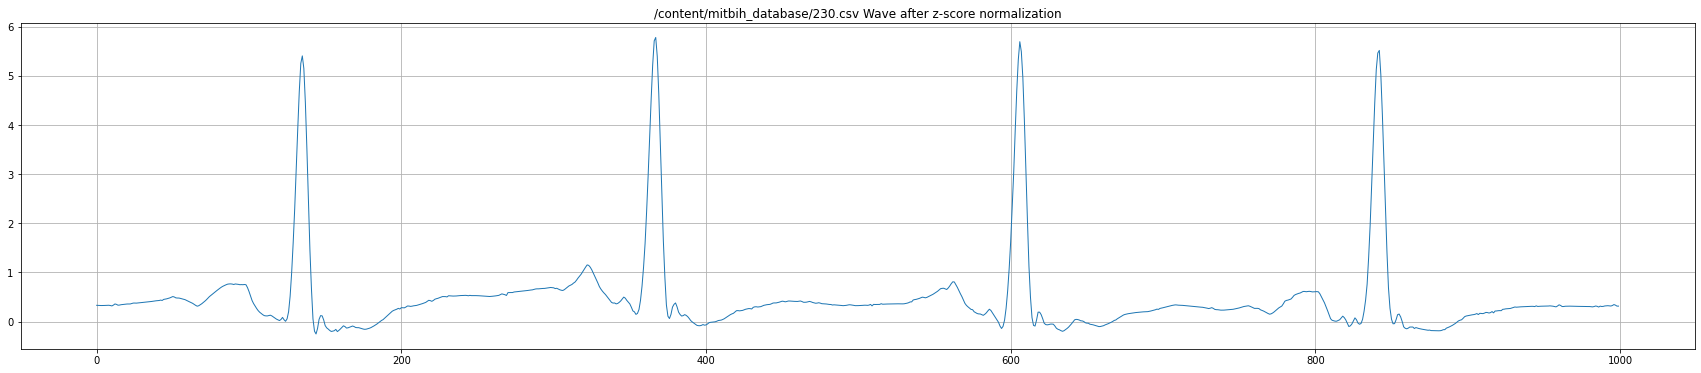

/content/mitbih_database/231.csv


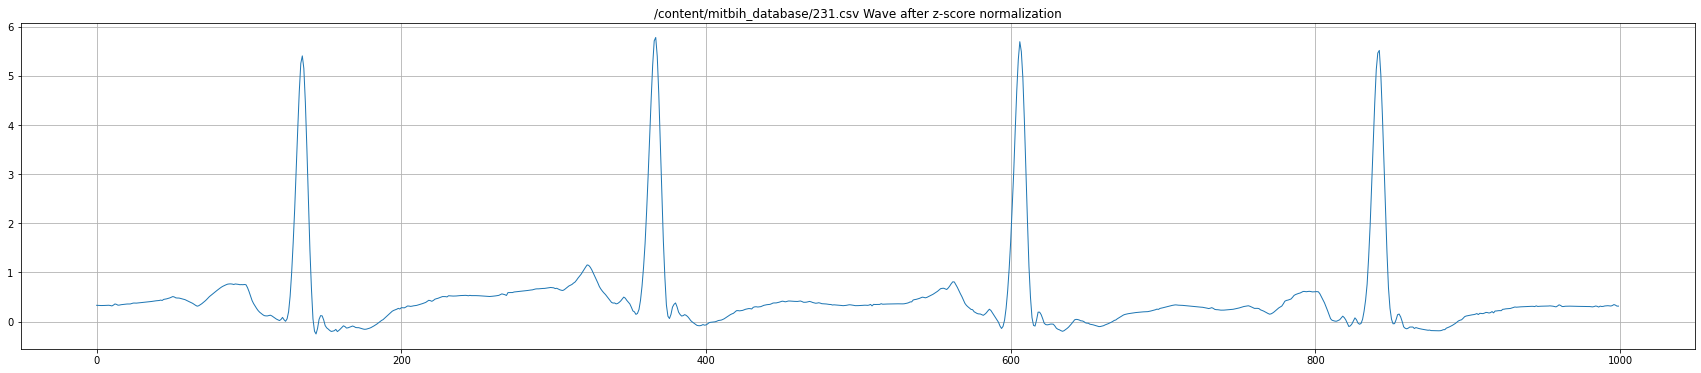

/content/mitbih_database/232.csv


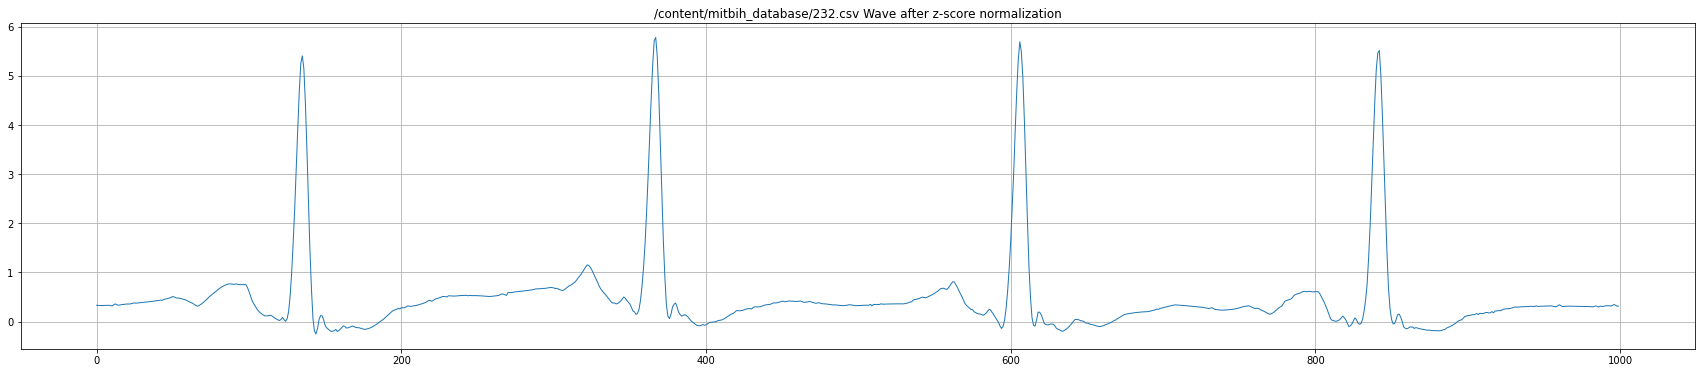

/content/mitbih_database/233.csv


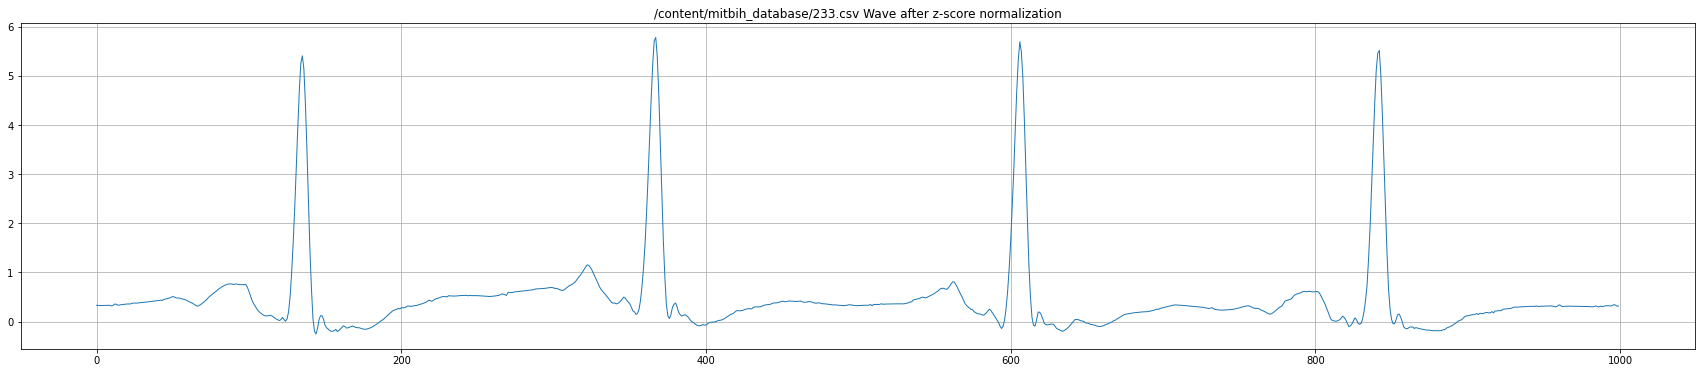

/content/mitbih_database/234.csv


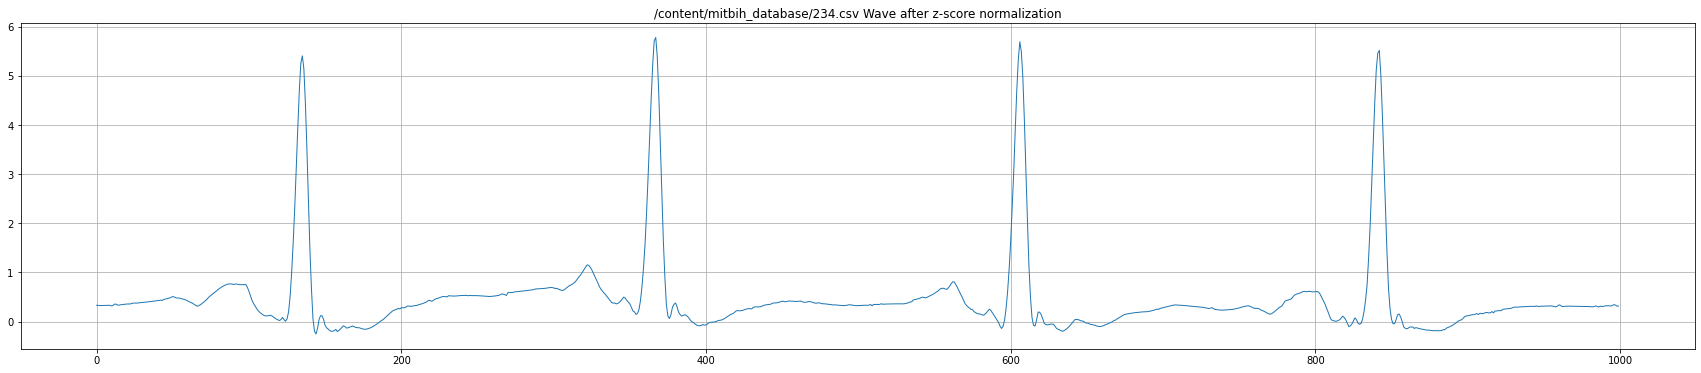

In [ ]:
signals = stats.zscore(signals)
print(len(records))
for r in range(0,len(records)):
  print(records[r])
  plt.title(records[r] + " Wave after z-score normalization")
  plt.plot(signals[0:1000])
  plt.show()

Reading Annotations: R position and Arrythmia class

In [ ]:
X = list()
y = list()

window_size = 160
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V', '/']
n_classes = len(classes)
count_classes = [0]*n_classes
print(count_classes)
print(n_classes)

[0, 0, 0, 0, 0, 0]
6


In [ ]:
for f in filenames:
  filename, file_extension = os.path.splitext(f)
  if(file_extension == '.csv'):
    records.append(path + filename + file_extension)
  else:
    annotations.append(path + filename + file_extension)

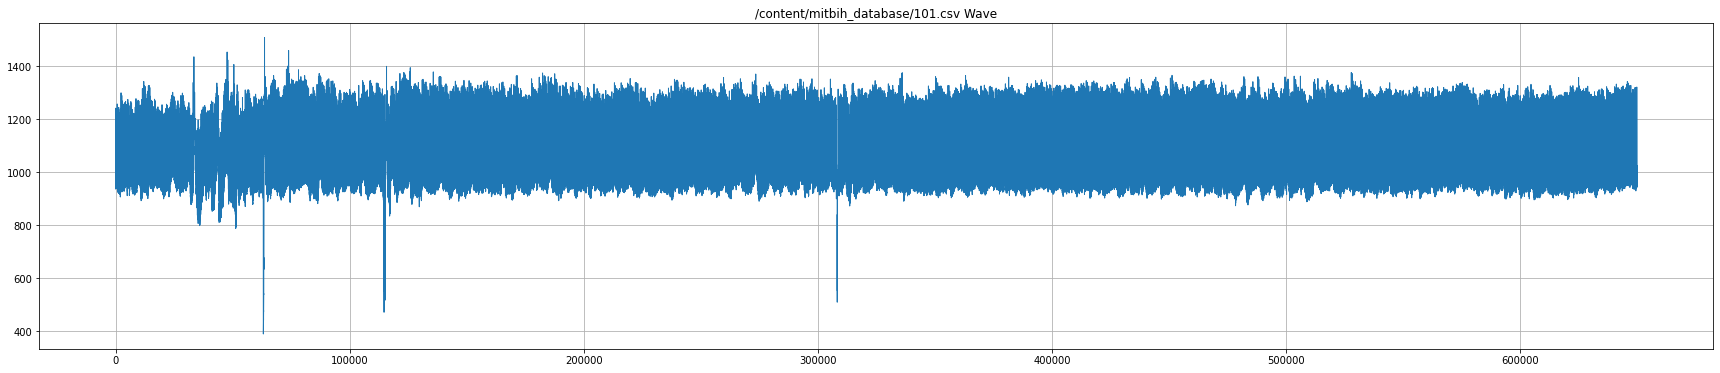

In [ ]:
for r in range(0,len(records)):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') 
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
        
            
    if r is 1:
        plt.title(records[1] + " Wave")
        plt.plot(signals)
        plt.show()

    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines() 
        beat = list()

        for d in range(1, len(data)): 
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) 
            pos = int(next(splitted)) 
            arrhythmia_type = next(splitted) 
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)
                if count_classes[arrhythmia_index] > maximum_counting: 
                    pass
                else:
                    count_classes[arrhythmia_index] += 1
                    if(window_size < pos and pos < (len(signals) - window_size)):
                        beat = signals[pos-window_size+1:pos+window_size]
                        X.append(beat)
                        y.append(arrhythmia_index)

0


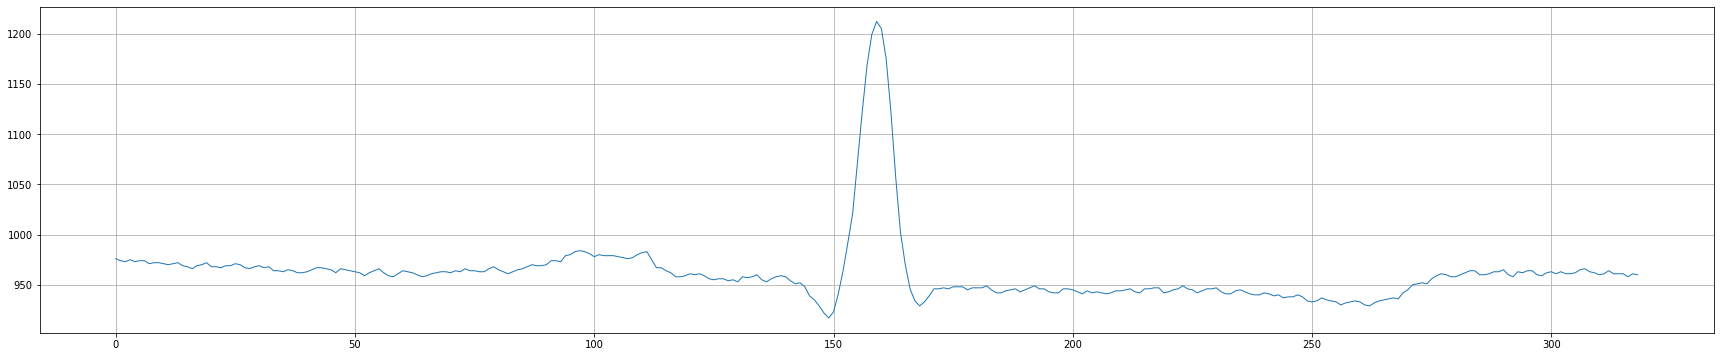

In [ ]:
plt.plot(X[0])
print(y[0])

In [ ]:
print(np.shape(X))

(55074, 319)


In [ ]:
for i in range(0,len(X)):
        X[i].append(y[i])

print(np.shape(X))

(55074, 320)


Classes Distribution

4    10000
0     9997
1     9996
2     9996
5     9993
3     5092
Name: 319, dtype: int64


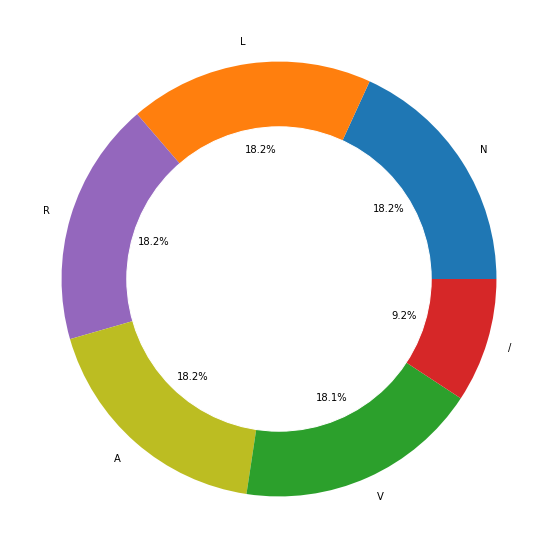

In [ ]:
X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green', 'tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


Rebalancing Classes

In [ ]:
df_1=X_train_df[X_train_df[319]==1]
df_2=X_train_df[X_train_df[319]==2]
df_3=X_train_df[X_train_df[319]==3]
df_4=X_train_df[X_train_df[319]==4]
df_5=X_train_df[X_train_df[319]==5]
df_0=(X_train_df[X_train_df[319]==0]).sample(n=5000,random_state=42)


df_1_upsample=resample(df_1,replace=True,n_samples=5000,random_state=122)
df_2_upsample=resample(df_2,replace=True,n_samples=5000,random_state=123)
df_3_upsample=resample(df_3,replace=True,n_samples=5000,random_state=124)
df_4_upsample=resample(df_4,replace=True,n_samples=5000,random_state=125)
df_5_upsample=resample(df_5,replace=True,n_samples=5000,random_state=126)

X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample,df_5_upsample])


0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
Name: 319, dtype: int64


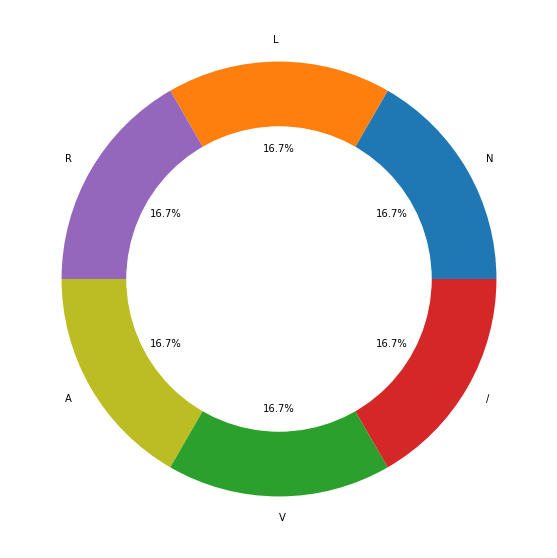

In [ ]:

per_class = X_train_df[319].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()




Train-Test Split

In [ ]:
train, test = train_test_split(X_train_df, test_size=0.20)

print("X_train length : ", len(train))
print("Y_test length : ", len(test))

print("X_train : ", np.shape(train))
print("X_test  : ", np.shape(test))



X_train length :  24000
Y_test length :  6000
X_train :  (24000, 320)
X_test  :  (6000, 320)


In [ ]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
print(np.shape(y_train), np.shape(y_test))

(24000, 6) (6000, 6)


In [ ]:
train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values
train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
test_x = test_x.reshape(len(test_x), test_x.shape[1],1)
print(np.shape(train_x), np.shape(test_x))

(24000, 319, 1) (6000, 319, 1)


Model Architecture

In [ ]:
def network(train_x, train_y, test_x, test_y):
    im_shape=(train_x.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    # convolutional layer 1
    conv1_1=Convolution1D(64, (6), activation='elu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    #pooling layer 1
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    # convolutional layer 2
    conv2_1=Convolution1D(128, (3), activation='elu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    # convolutional layer 3
    conv3_1=Convolution1D(128, (3), activation='elu', input_shape=im_shape)(conv2_1)
    conv3_1=BatchNormalization()(conv3_1)
    #pooling layer 2
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    # convolutional layer 4
    conv4_1=Convolution1D(256, (3), activation='elu', input_shape=im_shape)(pool2)
    conv4_1=BatchNormalization()(conv4_1)
    # convolutional layer 5
    conv5_1=Convolution1D(256, (3), activation='elu', input_shape=im_shape)(conv4_1)
    conv5_1=BatchNormalization()(conv5_1)
    #pooling layer 3
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv5_1)
    # flattened layer 1
    flatten=Flatten()(pool3)
    # dense layers
    dense_end1 = Dense(1024, activation='elu')(flatten)
    main_output = Dense(6, activation='softmax', name='main_output')(dense_end1)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(tf.keras.optimizers.Adam(learning_rate= 0.00001), loss='categorical_crossentropy',metrics = ['accuracy'])
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(train_x, train_y, epochs=5, callbacks=callbacks, batch_size=32, validation_data=(test_x, test_y))
    model.load_weights('best_model.h5')
    return(model,history)



In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(train_x, y_train, test_x, y_test)

Epoch 1/5
750/750 [==============================] - 234s 309ms/step - loss: 0.1708 - accuracy: 0.9489 - val_loss: 0.0695 - val_accuracy: 0.9822
Epoch 2/5
750/750 [==============================] - 230s 306ms/step - loss: 0.0489 - accuracy: 0.9867 - val_loss: 0.0735 - val_accuracy: 0.9770
Epoch 3/5
750/750 [==============================] - 229s 306ms/step - loss: 0.0275 - accuracy: 0.9930 - val_loss: 0.0382 - val_accuracy: 0.9902
Epoch 4/5
750/750 [==============================] - 229s 305ms/step - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.0372 - val_accuracy: 0.9910
Epoch 5/5
750/750 [==============================] - 228s 304ms/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.0380 - val_accuracy: 0.9923


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
%matplotlib

Using matplotlib backend: agg


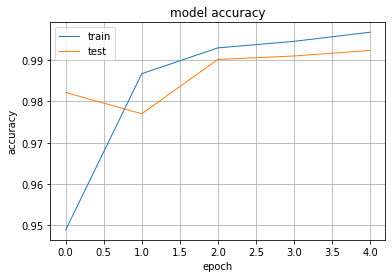

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

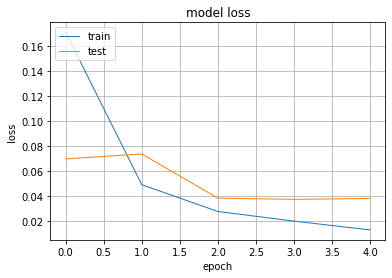

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(test_x)

Normalized confusion matrix


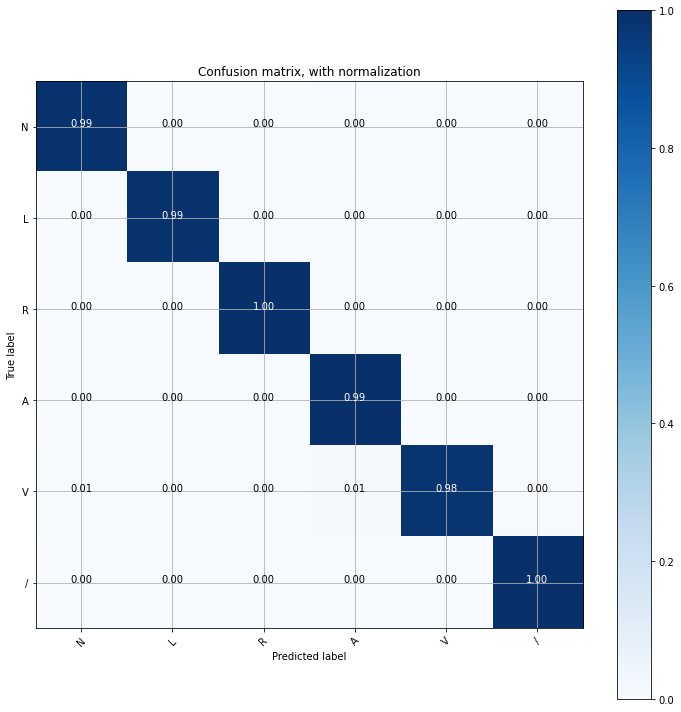

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'L', 'R', 'A', 'V', '/'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()